# ATAC GREAT Plots Cleaning

In [1]:
setwd("/data/park_lab/adam/ATAC/featCounts")
load("DESeq2_env.RData")

In [2]:
ls()

[1] "ATAC_peak_counts"               "ATAC_peak_counts_reduced"      
 [3] "cancer_E545K_enr_E545KvH1047R"  "cancer_E545K_enr_WTvE545K"     
 [5] "cancer_E545KvH1047R_res"        "cancer_H1047R_enr_E545KvH1047R"
 [7] "cancer_H1047R_enr_WTvH1047R"    "cancer_WT_enr_WTvE545K"        
 [9] "cancer_WT_enr_WTvH1047R"        "cancer_WTvE545K_res"           
[11] "cancer_WTvH1047R_res"           "col_data_cell"                 
[13] "col_data_geno"                  "dds_cell"                      
[15] "dds_cell_collapsed"             "dds_geno"                      
[17] "dds_geno_collapsed"             "E545K_enr_E545KvH1047R"        
[19] "E545K_enr_WTvE545K"             "E545KvH1047R_res"              
[21] "enr_list"                       "enr_list_names"                
[23] "H1047R_enr_E545KvH1047R"        "H1047R_enr_WTvH1047R"          
[25] "HTert_E545K_enr_E545KvH1047R"   "HTert_E545K_enr_WTvE545K"      
[27] "HTert_E545KvH1047R_res"         "HTert_H1047R_enr_E545KvH1047R" 
[29] "HTert_H1047R_enr_WTvH1047R"     "HTert_WT_enr_WTvE545K"         
[31] "HTert_WT_enr_WTvH1047R"         "HTert_WTvE545K_res"            
[33] "HTert_WTvH1047R_res"            "i"                             
[35] "MCF10A_E545K_enr_E545KvH1047R"  "MCF10A_E545K_enr_WTvE545K"     
[37] "MCF10A_E545KvH1047R_res"        "MCF10A_H1047R_enr_E545KvH1047R"
[39] "MCF10A_H1047R_enr_WTvH1047R"    "MCF10A_WT_enr_WTvE545K"        
[41] "MCF10A_WT_enr_WTvH1047R"        "MCF10A_WTvE545K_res"           
[43] "MCF10A_WTvH1047R_res"           "res_bed"                       
[45] "res_list"                       "res_list_df"                   
[47] "res_list_df_filt"               "res_list_names"                
[49] "total_samples"                  "total_treatment"               
[51] "total_treatment_v2"             "WT_enr_WTvE545K"               
[53] "WT_enr_WTvH1047R"               "WTvE545K_res"                  
[55] "WTvH1047R_res"

In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [4]:
res_list

$cancer_E545KvH1047R
log2 fold change (MLE): total_treatment_v2 cancer_E545K vs cancer_H1047R 
Wald test p-value: total_treatment_v2 cancer_E545K vs cancer_H1047R 
DataFrame with 549861 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
chr1.9958.10487          131.6743      -1.457110  0.369532  -3.94312
chr1.180758.180998        49.1217      -0.903294  0.322130  -2.80413
chr1.181414.181571        23.9912      -0.529648  0.341767  -1.54974
chr1.267951.268112        22.8282      -1.389743  0.379388  -3.66312
chr1.586080.586281        24.5927      -0.818432  0.411980  -1.98658
...                           ...            ...       ...       ...
chr22.50697420.50697584   28.1845       0.122957  0.350853  0.350453
chr22.50732216.50732420   37.0341       0.428492  0.348765  1.228599
chr22.50775161.50775532   25.3152       0.928511  0.448269  2.071323
chr22.50783388.50783905  133.2173   

In [5]:
res_list$MCF10A_E545KvH1047R

log2 fold change (MLE): total_treatment_v2 MCF10A_E545K vs MCF10A_H1047R 
Wald test p-value: total_treatment_v2 MCF10A_E545K vs MCF10A_H1047R 
DataFrame with 549861 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat     pvalue
                        <numeric>      <numeric> <numeric> <numeric>  <numeric>
chr1.9958.10487          131.6743       0.171263  0.348297  0.491716  0.6229202
chr1.180758.180998        49.1217       0.285156  0.296102  0.963033  0.3355312
chr1.181414.181571        23.9912       0.503839  0.261691  1.925320  0.0541893
chr1.267951.268112        22.8282      -0.796012  0.322617 -2.467362  0.0136113
chr1.586080.586281        24.5927      -0.194619  0.378724 -0.513882  0.6073347
...                           ...            ...       ...       ...        ...
chr22.50697420.50697584   28.1845       0.333043  0.259130  1.285234 0.19871049
chr22.50732216.50732420   37.0341      -0.315070  0.298833 -1.054336 0.29172893
chr22.50775161.5

In [6]:
MCF10A_res <- as.data.frame(res_list$MCF10A_E545KvH1047R)
MCF10A_res

baseMean   log2FoldChange lfcSE     stat       
chr1.9958.10487          131.67434  0.171262984   0.3482966  0.49171587
chr1.180758.180998        49.12167  0.285156266   0.2961024  0.96303255
chr1.181414.181571        23.99117  0.503839335   0.2616912  1.92532028
chr1.267951.268112        22.82818 -0.796012147   0.3226167 -2.46736191
chr1.586080.586281        24.59269 -0.194619418   0.3787241 -0.51388176
chr1.629211.629355        13.80928  0.234242277   0.7081586  0.33077659
chr1.629536.630072      1251.03690 -0.374469412   0.6737607 -0.55578989
chr1.631111.632416        62.02259 -0.112035246   0.7725330 -0.14502325
chr1.633834.634907      7236.60137 -0.040117677   0.7030083 -0.05706572
chr1.778336.779304       482.37124  0.043898488   0.1394711  0.31474967
chr1.826964.827838       140.26707 -0.410602811   0.1635674 -2.51029738
chr1.869783.869973        27.33441 -0.020387236   0.2578221 -0.07907482
chr1.904380.904858       123.42274  0.285827970   0.1912308  1.49467546
chr1.921119.921339        55.48855  0.362037554   0.2469513  1.46602796
chr1.923683.923957        58.03924  0.203421742   0.1854188  1.09709364
chr1.938159.938693        98.29783 -0.034129847   0.1659820 -0.20562384
chr1.959168.959484       127.36480  0.021161278   0.1380048  0.15333728
chr1.960442.960643        41.97210  0.335460566   0.1937985  1.73097603
chr1.966331.967298       297.73269  0.589828643   0.1380748  4.27180480
chr1.975947.976835       222.91428  0.226679770   0.1607693  1.40996966
chr1.984258.984425        16.42456 -0.421885416   0.3341668 -1.26249964
chr1.999983.1000990      332.60960 -0.041611691   0.2302766 -0.18070306
chr1.1001887.1002101      73.53190 -0.009020387   0.1717003 -0.05253564
chr1.1013167.1013723      84.68652  0.677509912   0.1462898  4.63128557
chr1.1019341.1020202     482.83725 -0.110186238   0.2743454 -0.40163320
chr1.1020751.1020963      37.93451 -0.304303212   0.2968810 -1.02500071
chr1.1021109.1021771     141.23581  0.059904709   0.1932800  0.30993740
chr1.1021918.1022145      49.36802 -0.430318184   0.2206842 -1.94992783
chr1.1024706.1025409     104.54400  0.717361663   0.1829156  3.92181681
chr1.1059527.1059780      74.02145 -0.149919158   0.2695583 -0.55616604
⋮                       ⋮          ⋮              ⋮         ⋮          
chr22.50342160.50342598  45.115670 -0.141564622   0.2894023 -0.48916197
chr22.50342799.50342968  48.574577 -0.421603357   0.2790333 -1.51094278
chr22.50343149.50343565  80.349710 -0.362226988   0.2993240 -1.21015035
chr22.50399771.50399940  11.270934  0.015233724   0.4585745  0.03321974
chr22.50444650.50444916  20.854710  0.178848084   0.3167136  0.56469976
chr22.50470622.50470872  11.744715  0.166311185   0.4527565  0.36733029
chr22.50474308.50475446 222.584299 -0.152837836   0.1228241 -1.24436346
chr22.50481411.50481614  13.750615 -0.750445794   0.3720680 -2.01695855
chr22.50481743.50481978  17.524685 -0.898131773   0.2926096 -3.06938541
chr22.50498262.50498467  23.994086  0.008300552   0.3507178  0.02366732
chr22.50507410.50508694 704.505357 -0.613895314   0.3463750 -1.77234305
chr22.50516137.50516415  16.799840  0.350533365   0.6541897  0.53582832
chr22.50524499.50524713  18.340716 -0.771614874   0.3329235 -2.31769406
chr22.50524826.50527346 739.198691 -0.043360320   0.1396962 -0.31039001
chr22.50528986.50529271  18.853628 -0.115001268   0.3876048 -0.29669720
chr22.50529621.50532569 502.767462 -0.103685126   0.1299609 -0.79781792
chr22.50539708.50539896  69.082033  0.136355159   0.1765011  0.77254556
chr22.50544231.50544497  14.196277 -1.321271712   0.3034575 -4.35405824
chr22.50544724.50545101  43.320266 -1.958897862   0.2175416 -9.00470360
chr22.50562606.50563608 194.439323  0.186549469   0.1341120  1.39099748
chr22.50600217.50600383  14.388274 -0.337314763   0.4154502 -0.81192584
chr22.50613742.50613948   5.664019  0.726186274   0.6739770  1.07746451
chr22.50622612.50623323 101.442192  1.592651538   0.1798904  8.85345362
chr22.50628005.50628705 190.304336 -0.258772225   0.2527919 -1.0

In [7]:
MCF10A_resFilt <- MCF10A_res %>% 
                  dplyr::filter(log2FoldChange < -1.5 | log2FoldChange > 1.5) %>%
                  dplyr::filter(padj < 0.05)
MCF10A_resFilt

baseMean   log2FoldChange lfcSE     stat      
chr1.7704542.7704772    70.038457   1.679461      0.5189684   3.236153
chr1.11653126.11653553  32.428765  -1.951036      0.3310878  -5.892806
chr1.12447864.12448213  14.080267   1.681270      0.5616836   2.993269
chr1.12454558.12454887  27.383425   1.716989      0.2158456   7.954708
chr1.15158909.15159147  32.431773  -1.629034      0.2579038  -6.316442
chr1.15603159.15603830  89.099567  -3.286538      0.3734486  -8.800509
chr1.15703653.15703983  47.495873  -1.915897      0.5044533  -3.797966
chr1.16075271.16075569  37.675424  -1.810043      0.2935930  -6.165142
chr1.17875968.17876207   9.346248   2.000240      0.5316560   3.762283
chr1.18941408.18941558   7.008332   2.139921      0.6331722   3.379683
chr1.18949642.18950353  40.415554   1.635454      0.4062677   4.025557
chr1.18950468.18950915  23.879345   2.134259      0.4167937   5.120661
chr1.21294464.21294611   9.854989   1.514087      0.4164327   3.635851
chr1.21567546.21568060  13.605084   2.363034      0.6631877   3.563145
chr1.22500544.22500796   9.426911  -1.507268      0.3974482  -3.792363
chr1.23475157.23475324  24.954492   1.815033      0.3319133   5.468395
chr1.24046339.24046617  24.838380  -2.432732      0.3786841  -6.424173
chr1.26894234.26894691  62.507511  -2.173701      0.2689456  -8.082306
chr1.27027110.27027294  22.972506   2.018845      0.4577288   4.410570
chr1.27418404.27418692  37.118942  -1.802090      0.3465159  -5.200597
chr1.28594600.28595300  67.516141  -1.582516      0.2151932  -7.353933
chr1.33334105.33334410  23.383481   1.766651      0.6015933   2.936621
chr1.33433640.33434081  95.851281  -1.551277      0.1473879 -10.525129
chr1.33435185.33435381  13.720961  -1.757644      0.4908991  -3.580459
chr1.34162986.34163457  78.628875   2.599549      0.4229763   6.145851
chr1.35448480.35448763  69.657130  -1.729401      0.1683828 -10.270653
chr1.35449416.35449656  33.751747  -2.257109      0.2494342  -9.048918
chr1.38220977.38221566  38.491518   2.597070      0.2477422  10.482954
chr1.41495260.41495838  32.534565   1.812899      0.2579666   7.027650
chr1.44484127.44484705  39.231426  -2.201422      0.2414162  -9.118784
⋮                       ⋮          ⋮              ⋮         ⋮         
chr21.44846451.44846890  13.952525  1.662772      0.4388160  3.789224 
chr21.45515603.45515925  14.397822  2.440138      0.6884895  3.544191 
chr22.19202125.19202751  20.877073  1.654937      0.4440638  3.726800 
chr22.19543988.19544715  20.832263  1.561678      0.5335146  2.927153 
chr22.20867178.20867697  16.135249  1.543790      0.5706207  2.705458 
chr22.20955955.20956849  67.254854 -1.707671      0.2171400 -7.864377 
chr22.20957042.20958321  64.373236 -2.344080      0.2610425 -8.979687 
chr22.24588344.24589012  20.811639  1.982898      0.5493411  3.609593 
chr22.24806022.24806290  19.382722  3.891000      0.5007695  7.770042 
chr22.29217132.29217628  50.355089 -1.544024      0.2316864 -6.664284 
chr22.30202545.30202783   6.765560  3.476381      0.8363013  4.156852 
chr22.30310457.30310696   8.720562 -2.700642      0.3991148 -6.766579 
chr22.32205018.32205246  46.889947  4.318676      0.4262147 10.132629 
chr22.33920713.33921387  72.613640  1.560624      0.4895816  3.187670 
chr22.35552570.35552740  10.859355  1.758227      0.6769365  2.597329 
chr22.36352796.36353026  27.635887  1.908759      0.3676297  5.192070 
chr22.37502370.37502721  19.487679  1.508335      0.3014436  5.003705 
chr22.39040768.39041242  48.757778  2.542303      0.5190203  4.898272 
chr22.39240756.39241824  71.888416  1.849654      0.2558148  7.230439 
chr22.39349669.39350665  28.555114  2.479223      0.4408761  5.623400 
chr22.42074150.42074355  15.320608 -3.626067      0.4970664 -7.294934 
chr22.42074536.42074717  20.266908 -3.013997      0.4294362 -7.018497 
chr22.42357335.42357540  22.447590 -1.623037      0.2977242 -5.451478 
chr22.42800874.42801211  37.482168  1.729657      0.5680366  3.044974 
chr22.46530711.46530958  12.901326 -1.998487    

In [8]:
MCF10A_resFilt_E545K <- MCF10A_resFilt %>%
                        dplyr::filter(log2FoldChange > 0)
MCF10A_resFilt_H1047R <- MCF10A_resFilt %>%
                        dplyr::filter(log2FoldChange < 0)
str(MCF10A_resFilt_E545K)
str(MCF10A_resFilt_H1047R)

'data.frame':	6728 obs. of  6 variables:
 $ baseMean      : num  70.04 14.08 27.38 9.35 7.01 ...
 $ log2FoldChange: num  1.68 1.68 1.72 2 2.14 ...
 $ lfcSE         : num  0.519 0.562 0.216 0.532 0.633 ...
 $ stat          : num  3.24 2.99 7.95 3.76 3.38 ...
 $ pvalue        : num  1.21e-03 2.76e-03 1.80e-15 1.68e-04 7.26e-04 ...
 $ padj          : num  9.97e-03 1.91e-02 3.20e-13 1.98e-03 6.59e-03 ...
'data.frame':	8350 obs. of  6 variables:
 $ baseMean      : num  32.4 32.4 89.1 47.5 37.7 ...
 $ log2FoldChange: num  -1.95 -1.63 -3.29 -1.92 -1.81 ...
 $ lfcSE         : num  0.331 0.258 0.373 0.504 0.294 ...
 $ stat          : num  -5.89 -6.32 -8.8 -3.8 -6.17 ...
 $ pvalue        : num  3.80e-09 2.68e-10 1.36e-18 1.46e-04 7.04e-10 ...
 $ padj          : num  1.78e-07 1.62e-08 4.30e-16 1.76e-03 3.89e-08 ...


In [9]:
MCF10A_resFilt_E545K <- rownames_to_column(MCF10A_resFilt_E545K, "coords")
MCF10A_resFilt_E545K

coords                   baseMean   log2FoldChange lfcSE     stat     
1    chr1.7704542.7704772      70.038457 1.679461       0.5189684  3.236153
2    chr1.12447864.12448213    14.080267 1.681270       0.5616836  2.993269
3    chr1.12454558.12454887    27.383425 1.716989       0.2158456  7.954708
4    chr1.17875968.17876207     9.346248 2.000240       0.5316560  3.762283
5    chr1.18941408.18941558     7.008332 2.139921       0.6331722  3.379683
6    chr1.18949642.18950353    40.415554 1.635454       0.4062677  4.025557
7    chr1.18950468.18950915    23.879345 2.134259       0.4167937  5.120661
8    chr1.21294464.21294611     9.854989 1.514087       0.4164327  3.635851
9    chr1.21567546.21568060    13.605084 2.363034       0.6631877  3.563145
10   chr1.23475157.23475324    24.954492 1.815033       0.3319133  5.468395
11   chr1.27027110.27027294    22.972506 2.018845       0.4577288  4.410570
12   chr1.33334105.33334410    23.383481 1.766651       0.6015933  2.936621
13   chr1.34162986.34163457    78.628875 2.599549       0.4229763  6.145851
14   chr1.38220977.38221566    38.491518 2.597070       0.2477422 10.482954
15   chr1.41495260.41495838    32.534565 1.812899       0.2579666  7.027650
16   chr1.48498608.48498755    16.697606 1.540663       0.4822191  3.194944
17   chr1.54279243.54279477    10.407412 2.811692       0.5475951  5.134619
18   chr1.58779053.58779409    32.114981 2.416398       0.3339374  7.236081
19   chr1.61287552.61288148    49.611553 1.563574       0.1768060  8.843444
20   chr1.72282332.72283106   174.231976 1.522047       0.2030420  7.496216
21   chr1.72283429.72284164    81.601777 3.046455       0.2536314 12.011348
22   chr1.72284605.72285371    93.847092 1.777037       0.2409714  7.374474
23   chr1.79811260.79811521    12.797507 1.540331       0.4678424  3.292413
24   chr1.85330208.85330646    39.874148 1.790689       0.2439923  7.339121
25   chr1.91673649.91673904    13.436856 2.480857       0.5726860  4.331967
26   chr1.98903832.98904091     7.553196 2.381198       0.7308114  3.258294
27   chr1.102879447.102879901  19.620123 1.612186       0.4995645  3.227183
28   chr1.102892226.102892418   9.979716 1.632318       0.5115774  3.190754
29   chr1.109959894.109960224  38.125447 1.850518       0.2740048  6.753596
30   chr1.111191088.111191430  12.383225 2.149252       0.7071640  3.039256
⋮    ⋮                        ⋮          ⋮              ⋮         ⋮        
6699 chr21.20998130.20998711   44.287911 1.650272       0.6112258  2.699938
6700 chr21.28641821.28642023    4.632794 2.606413       0.8347438  3.122410
6701 chr21.35357500.35357815   11.738336 1.796587       0.6508151  2.760519
6702 chr21.39082737.39082926   15.429911 1.637341       0.2819154  5.807918
6703 chr21.39667461.39667640    4.866619 2.058047       0.7817464  2.632627
6704 chr21.41605440.41605934   58.569067 1.500501       0.4616611  3.250221
6705 chr21.42310335.42310957   24.160168 1.939642       0.5233771  3.706012
6706 chr21.42366288.42366901   64.758478 1.543687       0.5653117  2.730683
6707 chr21.43740703.43741158   34.291891 1.603037       0.3516967  4.558010
6708 chr21.44846451.44846890   13.952525 1.662772       0.4388160  3.789224
6709 chr21.45515603.45515925   14.397822 2.440138       0.6884895  3.544191
6710 chr22.19202125.19202751   20.877073 1.654937       0.4440638  3.726800
6711 chr22.19543988.19544715   20.832263 1.561678       0.5335146  2.927153
6712 chr22.20867178.20867697   16.135249 1.543790       0.5706207  2.705458
6713 chr22.24588344.24589012   20.811639 1.982898       0.5493411  3.609593
6714 chr22.24806022.24806290   19.382722 3.891000       0.5007695  7.770042
6715 chr22.30202545.30202783    6.765560 3.476381       0.8363013  4.156852
6716 chr22.32205018.32205246   46.889947 4.318676       0.4262147 10.132629
6717 chr22.33920713.33921387   72.613640 1.560624       0.4895816  3.187670
6718 chr22.35552570.35552740   10.859355 1.758227       0.6769365  2.597329
6719 chr22.36352796.36353026   27.635887 1.908759    

In [10]:
MCF10A_resFilt_H1047R <- rownames_to_column(MCF10A_resFilt_H1047R, "coords")
MCF10A_resFilt_H1047R

coords                   baseMean   log2FoldChange lfcSE     stat      
1    chr1.11653126.11653553    32.428765 -1.951036      0.3310878  -5.892806
2    chr1.15158909.15159147    32.431773 -1.629034      0.2579038  -6.316442
3    chr1.15603159.15603830    89.099567 -3.286538      0.3734486  -8.800509
4    chr1.15703653.15703983    47.495873 -1.915897      0.5044533  -3.797966
5    chr1.16075271.16075569    37.675424 -1.810043      0.2935930  -6.165142
6    chr1.22500544.22500796     9.426911 -1.507268      0.3974482  -3.792363
7    chr1.24046339.24046617    24.838380 -2.432732      0.3786841  -6.424173
8    chr1.26894234.26894691    62.507511 -2.173701      0.2689456  -8.082306
9    chr1.27418404.27418692    37.118942 -1.802090      0.3465159  -5.200597
10   chr1.28594600.28595300    67.516141 -1.582516      0.2151932  -7.353933
11   chr1.33433640.33434081    95.851281 -1.551277      0.1473879 -10.525129
12   chr1.33435185.33435381    13.720961 -1.757644      0.4908991  -3.580459
13   chr1.35448480.35448763    69.657130 -1.729401      0.1683828 -10.270653
14   chr1.35449416.35449656    33.751747 -2.257109      0.2494342  -9.048918
15   chr1.44484127.44484705    39.231426 -2.201422      0.2414162  -9.118784
16   chr1.44587743.44588389    39.067132 -1.607603      0.3503753  -4.588230
17   chr1.46134838.46135195    42.062213 -1.721456      0.2081753  -8.269262
18   chr1.48048139.48048318    13.476686 -1.772849      0.3760962  -4.713818
19   chr1.50023929.50024079    22.668472 -2.501840      0.4832999  -5.176579
20   chr1.53413682.53413868    27.374765 -1.587168      0.3335968  -4.757744
21   chr1.55310612.55310985    52.158407 -1.890209      0.1839505 -10.275642
22   chr1.66705100.66705366    21.909180 -2.120640      0.3739062  -5.671582
23   chr1.78250276.78250496     6.941299 -2.298716      0.7098952  -3.238106
24   chr1.78840869.78841143    17.359285 -1.622403      0.4320303  -3.755298
25   chr1.84377541.84377717     9.314622 -2.358615      0.6383470  -3.694880
26   chr1.92909389.92909655    34.689996 -1.665691      0.3001236  -5.550017
27   chr1.93615131.93615382    49.241114 -1.623687      0.1945462  -8.346025
28   chr1.94005073.94005315    17.744253 -2.248673      0.2887066  -7.788783
29   chr1.100621983.100622489 117.922621 -1.592651      0.1829833  -8.703807
30   chr1.100627393.100627741  31.238686 -1.693857      0.2305862  -7.345871
⋮    ⋮                        ⋮          ⋮              ⋮         ⋮         
8321 chr19.45069201.45069431   30.696253 -2.156812      0.3644163  -5.918537
8322 chr19.47510006.47510408   28.246943 -1.961612      0.3417713  -5.739544
8323 chr19.48325430.48325601   59.466733 -1.601078      0.4128453  -3.878156
8324 chr19.48415448.48415746   27.314391 -2.021525      0.4425979  -4.567407
8325 chr19.48812252.48812566   52.540375 -1.657070      0.4161047  -3.982339
8326 chr20.2292735.2293024     20.209763 -2.908463      0.3266857  -8.902937
8327 chr20.3408685.3409080    124.953759 -1.503881      0.2304080  -6.527035
8328 chr20.32155296.32155861   53.589135 -1.745304      0.2236568  -7.803491
8329 chr20.33373256.33373442   11.117130 -1.784654      0.3643253  -4.898517
8330 chr20.41391758.41392083   31.707891 -1.743080      0.2132270  -8.174760
8331 chr20.50298937.50299260   22.454443 -3.372577      0.4045268  -8.337090
8332 chr20.50312457.50313575  122.601991 -1.915518      0.1868590 -10.251146
8333 chr20.50321015.50321648  267.107921 -1.686526      0.1348826 -12.503660
8334 chr20.50502982.50503374   25.921546 -2.573583      0.2822668  -9.117556
8335 chr20.50715773.50716018   20.498501 -2.456963      0.4348066  -5.650702
8336 chr20.63889218.63889557   17.483508 -1.774145      0.2743901  -6.465776
8337 chr21.15210122.15210706  119.919927 -1.845738      0.2877290  -6.414848
8338 chr21.21200238.21200441   15.849247 -2.483832      0.7306037  -3.399699
8339 chr21.36183139.36183571   22.281710 -1.535988      0.3546785  -4.330649
8340 chr21.37631718.37631988   15.843752 -1.914125      0.2797381  -6.842558
8

In [11]:
MCF10A_resFilt_E545K <- separate(data = MCF10A_resFilt_E545K, 
                        col = "coords", 
                        into = c("chr", "start", "end"), sep = "\\.")
MCF10A_resFilt_H1047R <- separate(data = MCF10A_resFilt_H1047R, 
                        col = "coords", 
                        into = c("chr", "start", "end"), sep = "\\.")
str(MCF10A_resFilt_E545K)
str(MCF10A_resFilt_H1047R)

'data.frame':	6728 obs. of  9 variables:
 $ chr           : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ start         : chr  "7704542" "12447864" "12454558" "17875968" ...
 $ end           : chr  "7704772" "12448213" "12454887" "17876207" ...
 $ baseMean      : num  70.04 14.08 27.38 9.35 7.01 ...
 $ log2FoldChange: num  1.68 1.68 1.72 2 2.14 ...
 $ lfcSE         : num  0.519 0.562 0.216 0.532 0.633 ...
 $ stat          : num  3.24 2.99 7.95 3.76 3.38 ...
 $ pvalue        : num  1.21e-03 2.76e-03 1.80e-15 1.68e-04 7.26e-04 ...
 $ padj          : num  9.97e-03 1.91e-02 3.20e-13 1.98e-03 6.59e-03 ...
'data.frame':	8350 obs. of  9 variables:
 $ chr           : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ start         : chr  "11653126" "15158909" "15603159" "15703653" ...
 $ end           : chr  "11653553" "15159147" "15603830" "15703983" ...
 $ baseMean      : num  32.4 32.4 89.1 47.5 37.7 ...
 $ log2FoldChange: num  -1.95 -1.63 -3.29 -1.92 -1.81 ...
 $ lfcSE         : num  0.331 0.258 0.373 0.50

In [12]:
write_tsv(MCF10A_resFilt_E545K, file = "/data/park_lab/adam/figures/MCF10A_resFilt_E545K.bed")
write_tsv(MCF10A_resFilt_H1047R, file = "/data/park_lab/adam/figures/MCF10A_resFilt_H1047R.bed")

In [13]:
MCF10A_resFilt_E545K_select <- MCF10A_resFilt_E545K %>%
                               dplyr::select(1:3)
MCF10A_resFilt_E545K_select$chr <- as.factor(MCF10A_resFilt_E545K_select$chr)
MCF10A_resFilt_E545K_select$start <- as.numeric(MCF10A_resFilt_E545K_select$start)
MCF10A_resFilt_E545K_select$end <- as.numeric(MCF10A_resFilt_E545K_select$end)
str(MCF10A_resFilt_E545K_select)
MCF10A_resFilt_H1047R_select <- MCF10A_resFilt_H1047R %>%
                               dplyr::select(1:3)
MCF10A_resFilt_H1047R_select$chr <- as.factor(MCF10A_resFilt_H1047R_select$chr)
MCF10A_resFilt_H1047R_select$start <- as.numeric(MCF10A_resFilt_H1047R_select$start)
MCF10A_resFilt_H1047R_select$end <- as.numeric(MCF10A_resFilt_H1047R_select$end)
str(MCF10A_resFilt_H1047R_select)

'data.frame':	6728 obs. of  3 variables:
 $ chr  : Factor w/ 22 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start: num  7704542 12447864 12454558 17875968 18941408 ...
 $ end  : num  7704772 12448213 12454887 17876207 18941558 ...
'data.frame':	8350 obs. of  3 variables:
 $ chr  : Factor w/ 22 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start: num  11653126 15158909 15603159 15703653 16075271 ...
 $ end  : num  11653553 15159147 15603830 15703983 16075569 ...


In [14]:
library(rGREAT)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:tidyr’:

    expand


T

In [15]:
getGREATResultsBP <- function(inputBEDFile){
  # create a job object given function input for BED and bg
  print("Running job.")
  job_temp = submitGreatJob(inputBEDFile, species = "hg38",
                            adv_upstream = 10, adv_downstream = 2, adv_span = 2000)
  print("Job dun run.")
  # Retrieve output
  output_temp = getEnrichmentTables(job_temp, ontology = c("GO Biological Process"))
  # Snag the BP output table
  bpOutputTable <- (output_temp[[1]])
  # Return 
  return(bpOutputTable)
}

In [16]:
MCF10A_E545K_Gres <- getGREATResultsBP(inputBEDFile = MCF10A_resFilt_E545K_select)
MCF10A_H1047R_Gres <- getGREATResultsBP(inputBEDFile = MCF10A_resFilt_H1047R_select)
str(MCF10A_E545K_Gres)
str(MCF10A_H1047R_Gres)

[1] "Running job."
[1] "Job dun run."


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport



[1] "Running job."


Don't make too frequent requests. The time break is 60s.
Please wait for 53s for the next request.
The time break can be set by `request_interval` argument.




  |===================================================================== |  99%
[1] "Job dun run."


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport



'data.frame':	13159 obs. of  17 variables:
 $ ID                        : chr  "GO:1990478" "GO:1903237" "GO:1903236" "GO:0050930" ...
 $ name                      : chr  "response to ultrasound" "negative regulation of leukocyte tethering or rolling" "regulation of leukocyte tethering or rolling" "induction of positive chemotaxis" ...
 $ Binom_Genome_Fraction     : num  0.000423 0.000531 0.000807 0.0022 0.001064 ...
 $ Binom_Expected            : num  2.85 3.57 5.43 14.8 7.16 ...
 $ Binom_Observed_Region_Hits: num  105 105 105 146 108 180 107 111 111 115 ...
 $ Binom_Fold_Enrichment     : num  36.9 29.4 19.34 9.86 15.08 ...
 $ Binom_Region_Set_Coverage : num  0.0156 0.0156 0.0156 0.0217 0.0161 ...
 $ Binom_Raw_PValue          : num  1.24e-122 1.39e-112 2.95e-94 7.11e-91 6.32e-86 ...
 $ Binom_Adjp_BH             : num  1.64e-118 9.16e-109 1.29e-90 2.34e-87 1.66e-82 ...
 $ Hyper_Total_Genes         : num  1 4 7 14 5 18 6 10 15 11 ...
 $ Hyper_Expected            : num  0.195 0.782 1.368

In [17]:
MCF10A_E545K_Gres$Mutation <- c(rep("E545K", 13159))
MCF10A_H1047R_Gres$Mutation <- c(rep("H1047R", 13159))

In [18]:
MCF10A_E545K_Gres_filt <- MCF10A_E545K_Gres %>%
                          dplyr::filter(Hyper_Adjp_BH < 0.01) %>%
                          dplyr::filter(Hyper_Fold_Enrichment > 2.5) %>%
                          dplyr::arrange(Hyper_Adjp_BH)
str(MCF10A_E545K_Gres_filt)
MCF10A_H1047R_Gres_filt <- MCF10A_H1047R_Gres %>%
                          dplyr::filter(Hyper_Adjp_BH < 0.01) %>%
                          dplyr::filter(Hyper_Fold_Enrichment > 2.5) %>%
                          dplyr::arrange(Hyper_Adjp_BH)
str(MCF10A_H1047R_Gres_filt)

'data.frame':	96 obs. of  18 variables:
 $ ID                        : chr  "GO:0072073" "GO:0072164" "GO:0001823" "GO:0001657" ...
 $ name                      : chr  "kidney epithelium development" "mesonephric tubule development" "mesonephros development" "ureteric bud development" ...
 $ Binom_Genome_Fraction     : num  0.0298 0.0198 0.0204 0.0198 0.0213 ...
 $ Binom_Expected            : num  201 134 137 133 143 ...
 $ Binom_Observed_Region_Hits: num  273 193 195 192 202 173 173 152 148 165 ...
 $ Binom_Fold_Enrichment     : num  1.36 1.45 1.42 1.44 1.41 ...
 $ Binom_Region_Set_Coverage : num  0.0406 0.0287 0.029 0.0285 0.03 ...
 $ Binom_Raw_PValue          : num  4.98e-07 6.08e-07 1.47e-06 8.17e-07 1.76e-06 ...
 $ Binom_Adjp_BH             : num  5.46e-06 6.58e-06 1.50e-05 8.66e-06 1.78e-05 ...
 $ Hyper_Total_Genes         : num  128 86 90 85 97 77 80 67 63 65 ...
 $ Hyper_Expected            : num  25 16.8 17.6 16.6 19 ...
 $ Hyper_Observed_Gene_Hits  : num  69 49 50 48 49 42 42

In [19]:
MCF10A_Gres <- rbind(head(MCF10A_E545K_Gres_filt,n = 8), head(MCF10A_H1047R_Gres_filt, n = 8))
MCF10A_Gres

ID        
1  GO:0072073
2  GO:0072164
3  GO:0001823
4  GO:0001657
5  GO:0072009
6  GO:0072080
7  GO:0061326
8  GO:0061333
9  GO:1905314
10 GO:0060749
11 GO:0051968
12 GO:0002063
13 GO:0032354
14 GO:0031290
15 GO:0002052
16 GO:0040037
   name                                                                      
1  kidney epithelium development                                             
2  mesonephric tubule development                                            
3  mesonephros development                                                   
4  ureteric bud development                                                  
5  nephron epithelium development                                            
6  nephron tubule development                                                
7  renal tubule development                                                  
8  renal tubule morphogenesis                                                
9  semi-lunar valve development                                              
10 mammary gland alveolus development                                        
11 positive regulation of synaptic transmission, glutamatergic               
12 chondrocyte development                                                   
13 response to follicle-stimulating hormone                                  
14 retinal ganglion cell axon guidance                                       
15 positive regulation of neuroblast proliferation                           
16 negative regulation of fibroblast growth factor receptor signaling pathway
   Binom_Genome_Fraction Binom_Expected Binom_Observed_Region_Hits
1  0.029838250           200.75170      273                       
2  0.019844690           133.51510      193                       
3  0.020377910           137.10250      195                       
4  0.019814720           133.31350      192                       
5  0.021315050           143.40760      202                       
6  0.018272820           122.93950      173                       
7  0.018714640           125.91210      173                       
8  0.016109380           108.38390      152                       
9  0.003272190            27.32279       54                       
10 0.004212181            35.17171       58                       
11 0.005402483            45.11073       43                       
12 0.007073507            59.06378       80                       
13 0.004800233            40.08195       64                       
14 0.008580972            71.65111       49                       
15 0.004745366            39.62380       78                       
16 0.005166737            43.14225       49                       
   Binom_Fold_Enrichment Binom_Region_Set_Coverage Binom_Raw_PValue
1  1.3598890             0.040576690               4.984202e-07    
2  1.4455300             0.028686090               6.083281e-07    
3  1.4222930             0.028983350               1.465065e-06    
4  1.4402150             0.028537460               8.167430e-07    
5  1.4085720             0.030023780               1.763464e-06    
6  1.4071960             0.025713440               9.828745e-06    
7  1.3739740             0.025713440               3.387334e-05    
8  1.4024220             0.022592150               3.826950e-05    
9  1.9763720             0.006467066               4.128399e-06    
10 1.6490530             0.006946108               2.509725e-04    
11 0.9532100             0.005149701               6.438111e-01    
12 1.3544680             0.009580838               5.312868e-03    
13 1.5967290             0.007664671               2.914762e-04    
14 0.6838693             0.005868263               9.981162e-01    
15 1.9685140             0.009341317               4.334957e-08    
16 1.1357780             0.005868263               2.042515e-01    
   Binom_Adjp_BH Hyper_Total_Genes Hyper_Expected Hyper_Observed_Gene_Hits
1  5.461042e-06  128               25.011020      69                 

In [20]:
library(stringr)

In [32]:
MCF10A_Gres_duoE <- MCF10A_E545K_Gres_filt %>%
                dplyr::filter(name %in% MCF10A_Gres$name)
MCF10A_Gres_duoH <- MCF10A_H1047R_Gres_filt %>%
                dplyr::filter(name %in% MCF10A_Gres$name)
MCF10A_Gres_duo <- rbind(MCF10A_Gres_duoE, MCF10A_Gres_duoH)

In [33]:
MCF10A_Gres_duo

ID        
1  GO:0072073
2  GO:0072164
3  GO:0001823
4  GO:0001657
5  GO:0072009
6  GO:0072080
7  GO:0061326
8  GO:0061333
9  GO:0040037
10 GO:0031290
11 GO:1905314
12 GO:0060749
13 GO:0051968
14 GO:0002063
15 GO:0032354
16 GO:0031290
17 GO:0002052
18 GO:0040037
   name                                                                      
1  kidney epithelium development                                             
2  mesonephric tubule development                                            
3  mesonephros development                                                   
4  ureteric bud development                                                  
5  nephron epithelium development                                            
6  nephron tubule development                                                
7  renal tubule development                                                  
8  renal tubule morphogenesis                                                
9  negative regulation of fibroblast growth factor receptor signaling pathway
10 retinal ganglion cell axon guidance                                       
11 semi-lunar valve development                                              
12 mammary gland alveolus development                                        
13 positive regulation of synaptic transmission, glutamatergic               
14 chondrocyte development                                                   
15 response to follicle-stimulating hormone                                  
16 retinal ganglion cell axon guidance                                       
17 positive regulation of neuroblast proliferation                           
18 negative regulation of fibroblast growth factor receptor signaling pathway
   Binom_Genome_Fraction Binom_Expected Binom_Observed_Region_Hits
1  0.029838250           200.75170      273                       
2  0.019844690           133.51510      193                       
3  0.020377910           137.10250      195                       
4  0.019814720           133.31350      192                       
5  0.021315050           143.40760      202                       
6  0.018272820           122.93950      173                       
7  0.018714640           125.91210      173                       
8  0.016109380           108.38390      152                       
9  0.005166737            34.76181      148                       
10 0.008580972            57.73278       58                       
11 0.003272190            27.32279       54                       
12 0.004212181            35.17171       58                       
13 0.005402483            45.11073       43                       
14 0.007073507            59.06378       80                       
15 0.004800233            40.08195       64                       
16 0.008580972            71.65111       49                       
17 0.004745366            39.62380       78                       
18 0.005166737            43.14225       49                       
   Binom_Fold_Enrichment Binom_Region_Set_Coverage Binom_Raw_PValue
1  1.3598890             0.040576690               4.984202e-07    
2  1.4455300             0.028686090               6.083281e-07    
3  1.4222930             0.028983350               1.465065e-06    
4  1.4402150             0.028537460               8.167430e-07    
5  1.4085720             0.030023780               1.763464e-06    
6  1.4071960             0.025713440               9.828745e-06    
7  1.3739740             0.025713440               3.387334e-05    
8  1.4024220             0.022592150               3.826950e-05    
9  4.2575460             0.021997620               1.896733e-46    
10 1.0046290             0.008620690               5.036213e-01    
11 1.9763720             0.006467066               4.128399e-06    
12 1.6490530             0.006946108               2.509725e-04    
13 0.9532100             0.005149701               6.438111e-01    
14 1.3544680             0.009

In [37]:
MCF10A_Gres_duo$Mutation <- as.factor(MCF10A_Gres_duo$Mutation)
MCF10A_Gres_duo$MutationNum <- as.numeric(MCF10A_Gres_duo$Mutation)
MCF10A_Gres_duo$MutationNum

[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2

In [38]:
MCF10A_Gres_duo

ID        
1  GO:0072073
2  GO:0072164
3  GO:0001823
4  GO:0001657
5  GO:0072009
6  GO:0072080
7  GO:0061326
8  GO:0061333
9  GO:0040037
10 GO:0031290
11 GO:1905314
12 GO:0060749
13 GO:0051968
14 GO:0002063
15 GO:0032354
16 GO:0031290
17 GO:0002052
18 GO:0040037
   name                                                                      
1  kidney epithelium development                                             
2  mesonephric tubule development                                            
3  mesonephros development                                                   
4  ureteric bud development                                                  
5  nephron epithelium development                                            
6  nephron tubule development                                                
7  renal tubule development                                                  
8  renal tubule morphogenesis                                                
9  negative regulation of fibroblast growth factor receptor signaling pathway
10 retinal ganglion cell axon guidance                                       
11 semi-lunar valve development                                              
12 mammary gland alveolus development                                        
13 positive regulation of synaptic transmission, glutamatergic               
14 chondrocyte development                                                   
15 response to follicle-stimulating hormone                                  
16 retinal ganglion cell axon guidance                                       
17 positive regulation of neuroblast proliferation                           
18 negative regulation of fibroblast growth factor receptor signaling pathway
   Binom_Genome_Fraction Binom_Expected Binom_Observed_Region_Hits
1  0.029838250           200.75170      273                       
2  0.019844690           133.51510      193                       
3  0.020377910           137.10250      195                       
4  0.019814720           133.31350      192                       
5  0.021315050           143.40760      202                       
6  0.018272820           122.93950      173                       
7  0.018714640           125.91210      173                       
8  0.016109380           108.38390      152                       
9  0.005166737            34.76181      148                       
10 0.008580972            57.73278       58                       
11 0.003272190            27.32279       54                       
12 0.004212181            35.17171       58                       
13 0.005402483            45.11073       43                       
14 0.007073507            59.06378       80                       
15 0.004800233            40.08195       64                       
16 0.008580972            71.65111       49                       
17 0.004745366            39.62380       78                       
18 0.005166737            43.14225       49                       
   Binom_Fold_Enrichment Binom_Region_Set_Coverage Binom_Raw_PValue
1  1.3598890             0.040576690               4.984202e-07    
2  1.4455300             0.028686090               6.083281e-07    
3  1.4222930             0.028983350               1.465065e-06    
4  1.4402150             0.028537460               8.167430e-07    
5  1.4085720             0.030023780               1.763464e-06    
6  1.4071960             0.025713440               9.828745e-06    
7  1.3739740             0.025713440               3.387334e-05    
8  1.4024220             0.022592150               3.826950e-05    
9  4.2575460             0.021997620               1.896733e-46    
10 1.0046290             0.008620690               5.036213e-01    
11 1.9763720             0.006467066               4.128399e-06    
12 1.6490530             0.006946108               2.509725e-04    
13 0.9532100             0.005149701               6.438111e-01    
14 1.3544680             0.009

In [39]:
MCF10A_Gres_duo_filt <-  top_n(MCF10A_Gres_duo, 8, Hyper_Fold_Enrichment)  
str(MCF10A_Gres_duo_filt)                

'data.frame':	8 obs. of  19 variables:
 $ ID                        : chr  "GO:0072164" "GO:0001823" "GO:0001657" "GO:0040037" ...
 $ name                      : chr  "mesonephric tubule development" "mesonephros development" "ureteric bud development" "negative regulation of fibroblast growth factor receptor signaling pathway" ...
 $ Binom_Genome_Fraction     : num  0.01984 0.02038 0.01981 0.00517 0.00858 ...
 $ Binom_Expected            : num  133.5 137.1 133.3 34.8 57.7 ...
 $ Binom_Observed_Region_Hits: num  193 195 192 148 58 54 58 49
 $ Binom_Fold_Enrichment     : num  1.45 1.42 1.44 4.26 1 ...
 $ Binom_Region_Set_Coverage : num  0.02869 0.02898 0.02854 0.022 0.00862 ...
 $ Binom_Raw_PValue          : num  6.08e-07 1.47e-06 8.17e-07 1.90e-46 5.04e-01 ...
 $ Binom_Adjp_BH             : num  6.58e-06 1.50e-05 8.66e-06 5.43e-44 1.00 ...
 $ Hyper_Total_Genes         : num  86 90 85 12 19 16 18 12
 $ Hyper_Expected            : num  16.8 17.59 16.61 2.34 3.71 ...
 $ Hyper_Observed_Gen

In [40]:
library(viridis)

In [41]:
# MCF10A_Gres_duo$name <- str_to_sentence(MCF10A_Gres_duo$name)

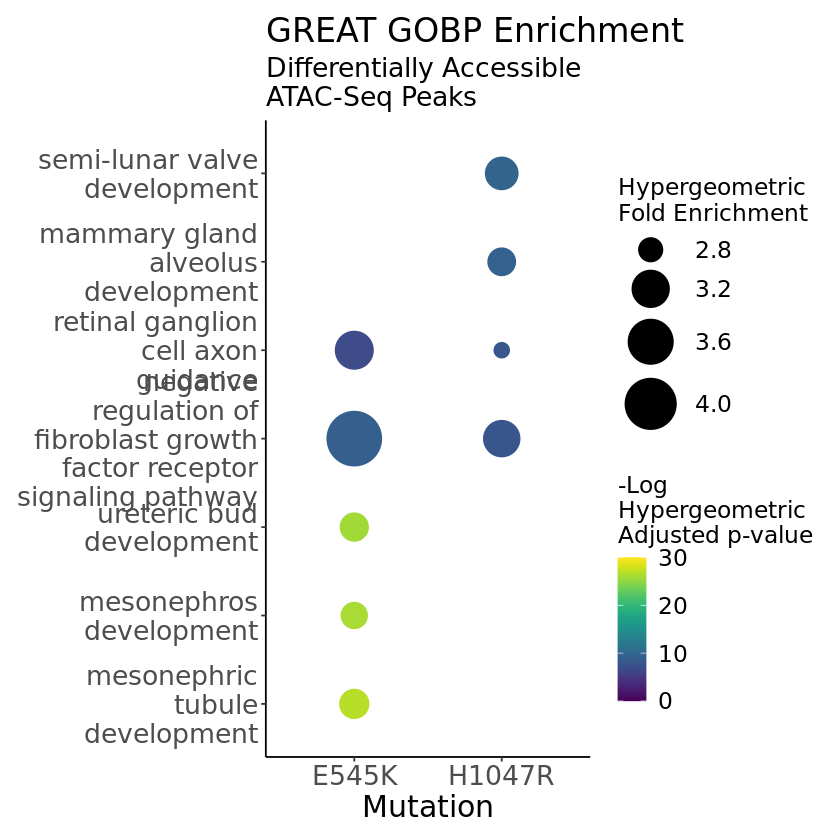

In [55]:
p <- MCF10A_Gres_duo %>% filter(name %in% MCF10A_Gres_duo_filt$name) %>%
     ggplot(aes(x=Mutation, y=reorder(name, MutationNum))) + 
     geom_point(aes(size = Hyper_Fold_Enrichment, color = -log(Hyper_Adjp_BH))) +
     scale_y_discrete(labels = function(x) str_wrap(str_replace_all(x, "foo" , " "),
                                                 width = 17)) + 
     ggtitle("GREAT GOBP Enrichment", "Differentially Accessible\nATAC-Seq Peaks") + 
     ylab(label = NULL) + labs(size = "Hypergeometric\nFold Enrichment",
                                    color = "-Log\nHypergeometric\nAdjusted p-value") +
     scale_colour_viridis(option = "viridis", limits = c(0,30)) +
     scale_size_continuous(range = c(4, 15)) +
     theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 18),
                          axis.text = element_text(size = 16),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 16),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
p

In [56]:
ggsave(filename="/data/park_lab/adam/figures/ATACGREAT_5-23.pdf", 
       plot = p, device = cairo_pdf, width = 8, height = 8)

In [27]:
pdf(file = "/data/park_lab/adam/figures/ATAC_GREAT_3B.pdf", width = 6, height = 6)
p
dev.off()

png 
  2

# HOMER Plots cleaning

In [23]:
WT_kr <- read_tsv("/data/park_lab/adam/ATAC2/HOMER/MCF10A_WT_0.05/knownResults.txt") %>%
         as.data.frame()
Ex9_kr <- read_tsv("/data/park_lab/adam/ATAC2/HOMER/MCF10A_E545K_0.05/knownResults.txt") %>%
          as.data.frame()
Ex20_kr <- read_tsv("/data/park_lab/adam/ATAC2/HOMER/MCF10A_H1047R_0.05/knownResults.txt") %>%
           as.data.frame()
WT_kr
Ex9_kr
Ex20_kr

Rows: 428 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Motif Name, Consensus, % of Target Sequences with Motif, % of Backg...
dbl (5): P-value, Log P-value, q-value (Benjamini), # of Target Sequences wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 428 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Motif Name, Consensus, % of Target Sequences with Motif, % of Backg...
dbl (5): P-value, Log P-value, q-value (Benjamini), # of Target Sequences wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 428 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Motif N

Motif Name                                                
1   Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer            
2   Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer         
3   JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer   
4   Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer          
5   Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer              
6   BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer             
7   Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer          
8   AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer          
9   Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer         
10  CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer          
11  BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer             
12  NF-E2(bZIP)/K562-NFE2-ChIP-Seq(GSE31477)/Homer            
13  Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer           
14  p73(p53)/Trachea-p73-ChIP-Seq(PRJNA310161)/Homer          
15  p53(p53)/Saos-p53-ChIP-Seq(GSE15780)/Homer                
16  p53(p53)/Saos-p53-ChIP-Seq/Homer                          
17  Nrf2(bZIP)/Lymphoblast-Nrf2-ChIP-Seq(GSE37589)/Homer      
18  NFE2L2(bZIP)/HepG2-NFE2L2-ChIP-Seq(Encode)/Homer          
19  p63(p53)/Keratinocyte-p63-ChIP-Seq(GSE17611)/Homer        
20  MafK(bZIP)/C2C12-MafK-ChIP-Seq(GSE36030)/Homer            
21  Sp1(Zf)/Promoter/Homer                                    
22  NFIL3(bZIP)/HepG2-NFIL3-ChIP-Seq(Encode)/Homer            
23  NF1(CTF)/LNCAP-NF1-ChIP-Seq(Unpublished)/Homer            
24  TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer      
25  Egr2(Zf)/Thymocytes-Egr2-ChIP-Seq(GSE34254)/Homer         
26  MafA(bZIP)/Islet-MafA-ChIP-Seq(GSE30298)/Homer            
27  NRF1(NRF)/MCF7-NRF1-ChIP-Seq(Unpublished)/Homer           
28  KLF3(Zf)/MEF-Klf3-ChIP-Seq(GSE44748)/Homer                
29  CEBP(bZIP)/ThioMac-CEBPb-ChIP-Seq(GSE21512)/Homer         
30  Atf4(bZIP)/MEF-Atf4-ChIP-Seq(GSE35681)/Homer              
⋮   ⋮                                                         
399 Sox6(HMG)/Myotubes-Sox6-ChIP-Seq(GSE32627)/Homer          
400 Sox9(HMG)/Limb-SOX9-ChIP-Seq(GSE73225)/Homer              
401 Srebp1a(bHLH)/HepG2-Srebp1a-ChIP-Seq(GSE31477)/Homer      
402 Srebp2(bHLH)/HepG2-Srebp2-ChIP-Seq(GSE31477)/Homer        
403 TATA-Box(TBP)/Promoter/Homer                              
404 Tbet(T-box)/CD8-Tbet-ChIP-Seq(GSE33802)/Homer             
405 Tbr1(T-box)/Cortex-Tbr1-ChIP-Seq(GSE71384)/Homer          
406 Tbx21(T-box)/GM12878-TBX21-ChIP-Seq(Encode)/Homer         
407 Tbx5(T-box)/HL1-Tbx5.biotin-ChIP-Seq(GSE21529)/Homer      
408 Tbx6(T-box)/ESC-Tbx6-ChIP-Seq(GSE93524)/Homer             
409 TCF4(bHLH)/SHSY5Y-TCF4-ChIP-Seq(GSE96915)/Homer           
410 Tcf7(HMG)/GM12878-TCF7-ChIP-Seq(Encode)/Homer             
411 Tgif1(Homeobox)/mES-Tgif1-ChIP-Seq(GSE55404)/Homer        
412 Tgif2(Homeobox)/mES-Tgif2-ChIP-Seq(GSE55404)/Homer        
413 THRb(NR)/HepG2-THRb.Flag-ChIP-Seq(Encode)/Homer           
414 THRa(NR)/C17.2-THRa-ChIP-Seq(GSE38347)/Homer              
415 THRb(NR)/Liver-NR1A2-ChIP-Seq(GSE52613)/Homer             
416 TRPS1(Zf)/MCF7-TRPS1-ChIP-Seq(GSE107013)/Homer            
417 Twist2(bHLH)/Myoblast-Twist2.Ty1-ChIP-Seq(GSE127998)/Homer
418 Usf2(bHLH)/C2C12-Usf2-ChIP-Seq(GSE36030)/Homer            
419 Zac1(Zf)/Neuro2A-Plagl1-ChIP-Seq(GSE75942)/Homer          
420 ZBTB18(Zf)/HEK293-ZBTB18.GFP-ChIP-Seq(GSE58341)/Homer     
421 ZEB1(Zf)/PDAC-ZEB1-ChIP-Seq(GSE64557)/Homer               
422 ZEB2(Zf)/SNU398-ZEB2-ChIP-Seq(GSE103048)/Homer            
423 ZFX(Zf)/mES-Zfx-ChIP-Seq(GSE11431)/Homer                  
424 ZNF136(Zf)/HEK293-ZNF136.GFP-ChIP-Seq(GSE58341)/Homer     
425 Znf263(Zf)/K562-Znf263-ChIP-Seq(GSE31477)/Homer           
426 ZNF416(Zf)/HEK293-ZNF416.GFP-ChIP-Seq(GSE58341)/Homer     
427 ZNF711(Zf)/SHSY5Y-ZNF711-ChIP-Seq(GSE20673)/Homer         
428 ZNF7(Zf)/HepG2-ZNF7.Flag-ChIP-Seq(Encode)/Homer           
    Consensus                 P-value Log P-value q-value (Benjamini)
1   NNATGASTCATH            

Motif Name                                                   
1   Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer               
2   Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer            
3   Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer             
4   JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer      
5   Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer                 
6   BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer                
7   Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer             
8   AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer             
9   Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer            
10  CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer             
11  BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer                
12  NF-E2(bZIP)/K562-NFE2-ChIP-Seq(GSE31477)/Homer               
13  Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer              
14  p73(p53)/Trachea-p73-ChIP-Seq(PRJNA310161)/Homer             
15  p53(p53)/Saos-p53-ChIP-Seq(GSE15780)/Homer                   
16  p53(p53)/Saos-p53-ChIP-Seq/Homer                             
17  Nrf2(bZIP)/Lymphoblast-Nrf2-ChIP-Seq(GSE37589)/Homer         
18  NFE2L2(bZIP)/HepG2-NFE2L2-ChIP-Seq(Encode)/Homer             
19  MafK(bZIP)/C2C12-MafK-ChIP-Seq(GSE36030)/Homer               
20  p63(p53)/Keratinocyte-p63-ChIP-Seq(GSE17611)/Homer           
21  Sp1(Zf)/Promoter/Homer                                       
22  NF1(CTF)/LNCAP-NF1-ChIP-Seq(Unpublished)/Homer               
23  NRF1(NRF)/MCF7-NRF1-ChIP-Seq(Unpublished)/Homer              
24  Egr2(Zf)/Thymocytes-Egr2-ChIP-Seq(GSE34254)/Homer            
25  Tcfcp2l1(CP2)/mES-Tcfcp2l1-ChIP-Seq(GSE11431)/Homer          
26  GRHL2(CP2)/HBE-GRHL2-ChIP-Seq(GSE46194)/Homer                
27  Elk1(ETS)/Hela-Elk1-ChIP-Seq(GSE31477)/Homer                 
28  MafA(bZIP)/Islet-MafA-ChIP-Seq(GSE30298)/Homer               
29  Elk4(ETS)/Hela-Elk4-ChIP-Seq(GSE31477)/Homer                 
30  ELF1(ETS)/Jurkat-ELF1-ChIP-Seq(SRA014231)/Homer              
⋮   ⋮                                                            
399 STAT6(Stat)/CD4-Stat6-ChIP-Seq(GSE22104)/Homer               
400 TATA-Box(TBP)/Promoter/Homer                                 
401 Tbet(T-box)/CD8-Tbet-ChIP-Seq(GSE33802)/Homer                
402 Tbr1(T-box)/Cortex-Tbr1-ChIP-Seq(GSE71384)/Homer             
403 Tbx21(T-box)/GM12878-TBX21-ChIP-Seq(Encode)/Homer            
404 Tbx5(T-box)/HL1-Tbx5.biotin-ChIP-Seq(GSE21529)/Homer         
405 Tbx6(T-box)/ESC-Tbx6-ChIP-Seq(GSE93524)/Homer                
406 Tcf21(bHLH)/ArterySmoothMuscle-Tcf21-ChIP-Seq(GSE61369)/Homer
407 Tcf3(HMG)/mES-Tcf3-ChIP-Seq(GSE11724)/Homer                  
408 TCF4(bHLH)/SHSY5Y-TCF4-ChIP-Seq(GSE96915)/Homer              
409 Tcf7(HMG)/GM12878-TCF7-ChIP-Seq(Encode)/Homer                
410 Tgif1(Homeobox)/mES-Tgif1-ChIP-Seq(GSE55404)/Homer           
411 Tgif2(Homeobox)/mES-Tgif2-ChIP-Seq(GSE55404)/Homer           
412 THRb(NR)/HepG2-THRb.Flag-ChIP-Seq(Encode)/Homer              
413 THRa(NR)/C17.2-THRa-ChIP-Seq(GSE38347)/Homer                 
414 THRb(NR)/Liver-NR1A2-ChIP-Seq(GSE52613)/Homer                
415 TRPS1(Zf)/MCF7-TRPS1-ChIP-Seq(GSE107013)/Homer               
416 Twist2(bHLH)/Myoblast-Twist2.Ty1-ChIP-Seq(GSE127998)/Homer   
417 Usf2(bHLH)/C2C12-Usf2-ChIP-Seq(GSE36030)/Homer               
418 Zac1(Zf)/Neuro2A-Plagl1-ChIP-Seq(GSE75942)/Homer             
419 ZBTB18(Zf)/HEK293-ZBTB18.GFP-ChIP-Seq(GSE58341)/Homer        
420 ZEB1(Zf)/PDAC-ZEB1-ChIP-Seq(GSE64557)/Homer                  
421 ZEB2(Zf)/SNU398-ZEB2-ChIP-Seq(GSE103048)/Homer               
422 ZFX(Zf)/mES-Zfx-ChIP-Seq(GSE11431)/Homer                     
423 ZNF136(Zf)/HEK293-ZNF136.GFP-ChIP-Seq(GSE58341)/Homer        
424 ZNF189(Zf)/HEK293-ZNF189.GFP-ChIP-Seq(GSE58341)/Homer        
425 Znf263(Zf)/K562-Znf263-ChIP-Seq(GSE31477)/Homer              
426 ZNF416(Zf)/HEK293-ZNF416.GFP-ChIP-Seq(GSE58341)/Homer        
427 ZNF711(Zf)/SHSY5Y-ZNF711-ChIP-Seq(GSE206

Motif Name                                                
1   Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer            
2   Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer         
3   JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer   
4   Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer          
5   Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer              
6   BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer             
7   Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer          
8   AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer          
9   Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer         
10  CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer          
11  BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer             
12  Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer           
13  NF-E2(bZIP)/K562-NFE2-ChIP-Seq(GSE31477)/Homer            
14  Nrf2(bZIP)/Lymphoblast-Nrf2-ChIP-Seq(GSE37589)/Homer      
15  p73(p53)/Trachea-p73-ChIP-Seq(PRJNA310161)/Homer          
16  NFE2L2(bZIP)/HepG2-NFE2L2-ChIP-Seq(Encode)/Homer          
17  p53(p53)/Saos-p53-ChIP-Seq(GSE15780)/Homer                
18  p53(p53)/Saos-p53-ChIP-Seq/Homer                          
19  MafK(bZIP)/C2C12-MafK-ChIP-Seq(GSE36030)/Homer            
20  p63(p53)/Keratinocyte-p63-ChIP-Seq(GSE17611)/Homer        
21  NF1(CTF)/LNCAP-NF1-ChIP-Seq(Unpublished)/Homer            
22  Sp1(Zf)/Promoter/Homer                                    
23  Egr2(Zf)/Thymocytes-Egr2-ChIP-Seq(GSE34254)/Homer         
24  NFIL3(bZIP)/HepG2-NFIL3-ChIP-Seq(Encode)/Homer            
25  NRF1(NRF)/MCF7-NRF1-ChIP-Seq(Unpublished)/Homer           
26  AP-2alpha(AP2)/Hela-AP2alpha-ChIP-Seq(GSE31477)/Homer     
27  MafA(bZIP)/Islet-MafA-ChIP-Seq(GSE30298)/Homer            
28  Atf4(bZIP)/MEF-Atf4-ChIP-Seq(GSE35681)/Homer              
29  GRHL2(CP2)/HBE-GRHL2-ChIP-Seq(GSE46194)/Homer             
30  Klf9(Zf)/GBM-Klf9-ChIP-Seq(GSE62211)/Homer                
⋮   ⋮                                                         
399 Sox6(HMG)/Myotubes-Sox6-ChIP-Seq(GSE32627)/Homer          
400 Sox9(HMG)/Limb-SOX9-ChIP-Seq(GSE73225)/Homer              
401 Srebp1a(bHLH)/HepG2-Srebp1a-ChIP-Seq(GSE31477)/Homer      
402 Srebp2(bHLH)/HepG2-Srebp2-ChIP-Seq(GSE31477)/Homer        
403 TATA-Box(TBP)/Promoter/Homer                              
404 Tbet(T-box)/CD8-Tbet-ChIP-Seq(GSE33802)/Homer             
405 Tbr1(T-box)/Cortex-Tbr1-ChIP-Seq(GSE71384)/Homer          
406 Tbx21(T-box)/GM12878-TBX21-ChIP-Seq(Encode)/Homer         
407 Tbx5(T-box)/HL1-Tbx5.biotin-ChIP-Seq(GSE21529)/Homer      
408 Tbx6(T-box)/ESC-Tbx6-ChIP-Seq(GSE93524)/Homer             
409 TCF4(bHLH)/SHSY5Y-TCF4-ChIP-Seq(GSE96915)/Homer           
410 Tcf7(HMG)/GM12878-TCF7-ChIP-Seq(Encode)/Homer             
411 Tgif1(Homeobox)/mES-Tgif1-ChIP-Seq(GSE55404)/Homer        
412 Tgif2(Homeobox)/mES-Tgif2-ChIP-Seq(GSE55404)/Homer        
413 THRb(NR)/HepG2-THRb.Flag-ChIP-Seq(Encode)/Homer           
414 THRa(NR)/C17.2-THRa-ChIP-Seq(GSE38347)/Homer              
415 THRb(NR)/Liver-NR1A2-ChIP-Seq(GSE52613)/Homer             
416 TRPS1(Zf)/MCF7-TRPS1-ChIP-Seq(GSE107013)/Homer            
417 Twist2(bHLH)/Myoblast-Twist2.Ty1-ChIP-Seq(GSE127998)/Homer
418 Usf2(bHLH)/C2C12-Usf2-ChIP-Seq(GSE36030)/Homer            
419 Zac1(Zf)/Neuro2A-Plagl1-ChIP-Seq(GSE75942)/Homer          
420 ZBTB18(Zf)/HEK293-ZBTB18.GFP-ChIP-Seq(GSE58341)/Homer     
421 ZEB1(Zf)/PDAC-ZEB1-ChIP-Seq(GSE64557)/Homer               
422 ZEB2(Zf)/SNU398-ZEB2-ChIP-Seq(GSE103048)/Homer            
423 ZFX(Zf)/mES-Zfx-ChIP-Seq(GSE11431)/Homer                  
424 ZNF136(Zf)/HEK293-ZNF136.GFP-ChIP-Seq(GSE58341)/Homer     
425 Znf263(Zf)/K562-Znf263-ChIP-Seq(GSE31477)/Homer           
426 ZNF416(Zf)/HEK293-ZNF416.GFP-ChIP-Seq(GSE58341)/Homer     
427 ZNF711(Zf)/SHSY5Y-ZNF711-ChIP-Seq(GSE20673)/Homer         
428 ZNF7(Zf)/HepG2-ZNF7.Flag-ChIP-Seq(Encode)/Homer           
    Consensus                 P-value Log P-value q-value (Benjamini)
1   NNATGASTCATH            

In [24]:
Ex9_krDiff <- read_tsv("/data/park_lab/adam/ATAC/featCounts/HOMER_results/MCF10A_E545K_enr_E545KvH1047R/knownResults.txt") %>%
          as.data.frame()
Ex20_krDiff <- read_tsv("/data/park_lab/adam/ATAC/featCounts/HOMER_results/MCF10A_H1047R_enr_E545KvH1047R/knownResults.txt") %>%
           as.data.frame()
Ex9_krDiff
Ex20_krDiff

Rows: 428 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Motif Name, Consensus, % of Target Sequences with Motif, % of Backg...
dbl (5): P-value, Log P-value, q-value (Benjamini), # of Target Sequences wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 428 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Motif Name, Consensus, % of Target Sequences with Motif, % of Backg...
dbl (5): P-value, Log P-value, q-value (Benjamini), # of Target Sequences wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Motif Name                                                      
1   TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer                   
2   TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer                  
3   TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer           
4   TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer            
5   Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer                  
6   Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer                    
7   CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer             
8   Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer               
9   JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer         
10  BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer                   
11  AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer                
12  Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer                
13  GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer                    
14  PGR(NR)/EndoStromal-PGR-ChIP-Seq(GSE69539)/Homer                
15  GRE(NR),IR3/RAW264.7-GRE-ChIP-Seq(Unpublished)/Homer            
16  TEAD2(TEA)/Py2T-Tead2-ChIP-Seq(GSE55709)/Homer                  
17  ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer                       
18  Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer               
19  Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer                
20  ELF3(ETS)/PDAC-ELF3-ChIP-Seq(GSE64557)/Homer                    
21  ELF5(ETS)/T47D-ELF5-ChIP-Seq(GSE30407)/Homer                    
22  RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer                  
23  RUNX2(Runt)/PCa-RUNX2-ChIP-Seq(GSE33889)/Homer                  
24  NF1:FOXA1(CTF,Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)/Homer    
25  Foxa3(Forkhead)/Liver-Foxa3-ChIP-Seq(GSE77670)/Homer            
26  RUNX-AML(Runt)/CD4+-PolII-ChIP-Seq(Barski_et_al.)/Homer         
27  Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer                 
28  Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer                      
29  FOXM1(Forkhead)/MCF7-FOXM1-ChIP-Seq(GSE72977)/Homer             
30  EHF(ETS)/LoVo-EHF-ChIP-Seq(GSE49402)/Homer                      
⋮   ⋮                                                               
399 HEB(bHLH)/mES-Heb-ChIP-Seq(GSE53233)/Homer                      
400 Hoxd12(Homeobox)/ChickenMSG-Hoxd12.Flag-ChIP-Seq(GSE86088)/Homer
401 LRF(Zf)/Erythroblasts-ZBTB7A-ChIP-Seq(GSE74977)/Homer           
402 LXRE(NR),DR4/RAW-LXRb.biotin-ChIP-Seq(GSE21512)/Homer           
403 Mef2a(MADS)/HL1-Mef2a.biotin-ChIP-Seq(GSE21529)/Homer           
404 Mef2b(MADS)/HEK293-Mef2b.V5-ChIP-Seq(GSE67450)/Homer            
405 Mef2c(MADS)/GM12878-Mef2c-ChIP-Seq(GSE32465)/Homer              
406 Nanog(Homeobox)/mES-Nanog-ChIP-Seq(GSE11724)/Homer              
407 Nkx2.1(Homeobox)/LungAC-Nkx2.1-ChIP-Seq(GSE43252)/Homer         
408 Nkx2.2(Homeobox)/NPC-Nkx2.2-ChIP-Seq(GSE61673)/Homer            
409 Nkx2.5(Homeobox)/HL1-Nkx2.5.biotin-ChIP-Seq(GSE21529)/Homer     
410 Nkx3.1(Homeobox)/LNCaP-Nkx3.1-ChIP-Seq(GSE28264)/Homer          
411 Nkx6.1(Homeobox)/Islet-Nkx6.1-ChIP-Seq(GSE40975)/Homer          
412 EAR2(NR)/K562-NR2F6-ChIP-Seq(Encode)/Homer                      
413 Pitx1(Homeobox)/Chicken-Pitx1-ChIP-Seq(GSE38910)/Homer          
414 Ptf1a(bHLH)/Panc1-Ptf1a-ChIP-Seq(GSE47459)/Homer                
415 RARa(NR)/K562-RARa-ChIP-Seq(Encode)/Homer                       
416 Slug(Zf)/Mesoderm-Snai2-ChIP-Seq(GSE61475)/Homer                
417 Tbet(T-box)/CD8-Tbet-ChIP-Seq(GSE33802)/Homer                   
418 Tbx21(T-box)/GM12878-TBX21-ChIP-Seq(Encode)/Homer               
419 Tbx5(T-box)/HL1-Tbx5.biotin-ChIP-Seq(GSE21529)/Homer            
420 Tbx6(T-box)/ESC-Tbx6-ChIP-Seq(GSE93524)/Homer                   
421 THRb(NR)/HepG2-THRb.Flag-ChIP-Seq(Encode)/Homer                 
422 THRa(NR)/C17.2-THRa-ChIP-Seq(GSE38347)/Homer                    
423 THRb(NR)/Liver-NR1A2-ChIP-Seq(GSE52613)/Homer                   
424 Zac1(Zf)/Neuro2A-Plagl1-ChIP-Seq(GSE75942)/Homer                
42

Motif Name                                              
1   RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer         
2   ETS1(ETS)/Jurkat-ETS1-ChIP-Seq(GSE17954)/Homer          
3   Fli1(ETS)/CD8-FLI-ChIP-Seq(GSE20898)/Homer              
4   ETV4(ETS)/HepG2-ETV4-ChIP-Seq(ENCODE)/Homer             
5   ETV1(ETS)/GIST48-ETV1-ChIP-Seq(GSE22441)/Homer          
6   ERG(ETS)/VCaP-ERG-ChIP-Seq(GSE14097)/Homer              
7   Smad2(MAD)/ES-SMAD2-ChIP-Seq(GSE29422)/Homer            
8   Smad4(MAD)/ESC-SMAD4-ChIP-Seq(GSE29422)/Homer           
9   THRb(NR)/HepG2-THRb.Flag-ChIP-Seq(Encode)/Homer         
10  ETS:RUNX(ETS,Runt)/Jurkat-RUNX1-ChIP-Seq(GSE17954)/Homer
11  Mef2d(MADS)/Retina-Mef2d-ChIP-Seq(GSE61391)/Homer       
12  PRDM1(Zf)/Hela-PRDM1-ChIP-Seq(GSE31477)/Homer           
13  ZNF322(Zf)/HEK293-ZNF322.GFP-ChIP-Seq(GSE58341)/Homer   
14  Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer        
15  FXR(NR),IR1/Liver-FXR-ChIP-Seq(Chong_et_al.)/Homer      
16  CEBP(bZIP)/ThioMac-CEBPb-ChIP-Seq(GSE21512)/Homer       
17  RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer          
18  Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer        
19  NFkB-p65(RHD)/GM12787-p65-ChIP-Seq(GSE19485)/Homer      
20  Smad3(MAD)/NPC-Smad3-ChIP-Seq(GSE36673)/Homer           
21  ZNF415(Zf)/HEK293-ZNF415.GFP-ChIP-Seq(GSE58341)/Homer   
22  Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer       
23  Myf5(bHLH)/GM-Myf5-ChIP-Seq(GSE24852)/Homer             
24  Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer          
25  JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer 
26  BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer           
27  MyoD(bHLH)/Myotube-MyoD-ChIP-Seq(GSE21614)/Homer        
28  Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer            
29  WT1(Zf)/Kidney-WT1-ChIP-Seq(GSE90016)/Homer             
30  Bcl11a(Zf)/HSPC-BCL11A-ChIP-Seq(GSE104676)/Homer        
⋮   ⋮                                                       
399 YY1(Zf)/Promoter/Homer                                  
400 ZBTB12(Zf)/HEK293-ZBTB12.GFP-ChIP-Seq(GSE58341)/Homer   
401 ZBTB18(Zf)/HEK293-ZBTB18.GFP-ChIP-Seq(GSE58341)/Homer   
402 ZBTB33(Zf)/GM12878-ZBTB33-ChIP-Seq(GSE32465)/Homer      
403 ZEB2(Zf)/SNU398-ZEB2-ChIP-Seq(GSE103048)/Homer          
404 Zfp281(Zf)/ES-Zfp281-ChIP-Seq(GSE81042)/Homer           
405 ZFP3(Zf)/HEK293-ZFP3.GFP-ChIP-Seq(GSE58341)/Homer       
406 Zfp57(Zf)/H1-ZFP57.HA-ChIP-Seq(GSE115387)/Homer         
407 Zfp809(Zf)/ES-Zfp809-ChIP-Seq(GSE70799)/Homer           
408 Zic3(Zf)/mES-Zic3-ChIP-Seq(GSE37889)/Homer              
409 Zic(Zf)/Cerebellum-ZIC1.2-ChIP-Seq(GSE60731)/Homer      
410 ZKSCAN1(Zf)/HepG2-ZKSCAN1-ChIP-Seq(Encode)/Homer        
411 ZNF136(Zf)/HEK293-ZNF136.GFP-ChIP-Seq(GSE58341)/Homer   
412 ZNF165(Zf)/WHIM12-ZNF165-ChIP-Seq(GSE65937)/Homer       
413 ZNF16(Zf)/HEK293-ZNF16.GFP-ChIP-Seq(GSE58341)/Homer     
414 ZNF189(Zf)/HEK293-ZNF189.GFP-ChIP-Seq(GSE58341)/Homer   
415 ZNF264(Zf)/HEK293-ZNF264.GFP-ChIP-Seq(GSE58341)/Homer   
416 ZNF317(Zf)/HEK293-ZNF317.GFP-ChIP-Seq(GSE58341)/Homer   
417 ZNF341(Zf)/EBV-ZNF341-ChIP-Seq(GSE113194)/Homer         
418 ZNF382(Zf)/HEK293-ZNF382.GFP-ChIP-Seq(GSE58341)/Homer   
419 ZNF41(Zf)/HEK293-ZNF41.GFP-ChIP-Seq(GSE58341)/Homer     
420 ZNF519(Zf)/HEK293-ZNF519.GFP-ChIP-Seq(GSE58341)/Homer   
421 ZNF528(Zf)/HEK293-ZNF528.GFP-ChIP-Seq(GSE58341)/Homer   
422 ZNF652/HepG2-ZNF652.Flag-ChIP-Seq(Encode)/Homer         
423 ZNF669(Zf)/HEK293-ZNF669.GFP-ChIP-Seq(GSE58341)/Homer   
424 ZNF675(Zf)/HEK293-ZNF675.GFP-ChIP-Seq(GSE58341)/Homer   
425 ZNF692(Zf)/HEK293-ZNF692.GFP-ChIP-Seq(GSE58341)/Homer   
426 ZNF768(Zf)/Rajj-ZNF768-ChIP-Seq(GSE111879)/Homer        
427 ZNF7(Zf)/HepG2-ZNF7.Flag-ChIP-Seq(Encode)/Homer         
428 ZSCAN22(Zf)/HEK293-ZSCAN22.GFP-ChIP-Seq(GSE58341)/Homer 
    Consensus                 P-value Log P-value q-value (Benjamini)
1   RGGTCADNNAGAGGTCAV        1e-07   -17.550     0.0000             
2   ACAGGAAGTG                1e-05   -13.050     0.0005             
3   NRYTTCCG

In [25]:
WT_kr$clean_names <- WT_kr$`Motif Name` %>%
                     gsub(pattern = "\\(.*", replacement = "")
Ex9_kr$clean_names <- Ex9_kr$`Motif Name` %>%
                     gsub(pattern = "\\(.*", replacement = "")
Ex20_kr$clean_names <- Ex20_kr$`Motif Name` %>%
                     gsub(pattern = "\\(.*", replacement = "")
WT_kr$clean_names
Ex9_kr$clean_names
Ex20_kr$clean_names

[1] "Fra1"                              "Fra2"                             
  [3] "JunB"                              "Fosl2"                            
  [5] "Atf3"                              "BATF"                             
  [7] "Jun-AP1"                           "AP-1"                             
  [9] "Bach2"                             "CTCF"                             
 [11] "BORIS"                             "NF-E2"                            
 [13] "Bach1"                             "p73"                              
 [15] "p53"                               "p53"                              
 [17] "Nrf2"                              "NFE2L2"                           
 [19] "p63"                               "MafK"                             
 [21] "Sp1"                               "NFIL3"                            
 [23] "NF1"                               "TEAD4"                            
 [25] "Egr2"                              "MafA"                             
 [27] "NRF1"                              "KLF3"                             
 [29] "CEBP"                              "Atf4"                             
 [31] "Elk4"                              "Klf9"                             
 [33] "Elk1"                              "HINFP"                            
 [35] "TEAD1"                             "GRHL2"                            
 [37] "TEAD"                              "MafB"                             
 [39] "Tcfcp2l1"                          "Tlx?"                             
 [41] "HLF"                               "AP-2alpha"                        
 [43] "CEBP:AP1"                          "TEAD2"                            
 [45] "ELF1"                              "ETS"                              
 [47] "Zfp281"                            "TEAD3"                            
 [49] "E2F4"                              "E2F7"                             
 [51] "p53"                               "E2F1"                             
 [53] "Chop"                              "Zfp57"                            
 [55] "Klf4"                              "AP-2gamma"                        
 [57] "JunD"                              "EKLF"                             
 [59] "NRF"                               "E2F"                              
 [61] "GABPA"                             "CRE"                              
 [63] "E2F6"                              "Zfp809"                           
 [65] "EWS:FLI1-fusion"                   "Ronin"                            
 [67] "Ets1-distal"                       "RFX"                              
 [69] "Egr1"                              "Stat3"                            
 [71] "Rfx2"                              "GRE"                              
 [73] "Fli1"                              "KLF10"                            
 [75] "WT1"                               "ZBTB33"                           
 [77] "NFkB-p65-Rel"                      "E2F3"                             
 [79] "KLF6"                              "GFY-Staf"                         
 [81] "ETV4"                              "ZNF519"                           
 [83] "Etv2"                              "ETS1"                             
 [85] "E-box"                             "IRF2"                             
 [87] "Rfx1"                              "RUNX"                             
 [89] "GRE"                               "EBF"                              
 [91] "NFkB-p50,p52"                      "X-box"                            
 [93] "c-Myc"                             "PGR"                              
 [95] "Zic3"                              "ARE"                              
 [97] "ISRE"                              "Sp5"                              
 [99] "ELF5"                              "CTCF-SatelliteElement"            
[101] "TFE3"                              "Elf4"                             
[103] "ELF3"            

[1] "Fra1"                              "Fra2"                             
  [3] "Fosl2"                             "JunB"                             
  [5] "Atf3"                              "BATF"                             
  [7] "Jun-AP1"                           "AP-1"                             
  [9] "Bach2"                             "CTCF"                             
 [11] "BORIS"                             "NF-E2"                            
 [13] "Bach1"                             "p73"                              
 [15] "p53"                               "p53"                              
 [17] "Nrf2"                              "NFE2L2"                           
 [19] "MafK"                              "p63"                              
 [21] "Sp1"                               "NF1"                              
 [23] "NRF1"                              "Egr2"                             
 [25] "Tcfcp2l1"                          "GRHL2"                            
 [27] "Elk1"                              "MafA"                             
 [29] "Elk4"                              "ELF1"                             
 [31] "ETS"                               "HINFP"                            
 [33] "KLF3"                              "Klf9"                             
 [35] "TEAD4"                             "Tlx?"                             
 [37] "E2F1"                              "AP-2alpha"                        
 [39] "E2F4"                              "NFIL3"                            
 [41] "MafB"                              "E2F7"                             
 [43] "Zfp281"                            "EKLF"                             
 [45] "TEAD"                              "TEAD1"                            
 [47] "Klf4"                              "Zfp57"                            
 [49] "GABPA"                             "p53"                              
 [51] "TEAD2"                             "JunD"                             
 [53] "E2F"                               "Zfp809"                           
 [55] "NRF"                               "GRE"                              
 [57] "Ets1-distal"                       "Ronin"                            
 [59] "RFX"                               "Atf4"                             
 [61] "E2F6"                              "TEAD3"                            
 [63] "EWS:FLI1-fusion"                   "KLF10"                            
 [65] "CRE"                               "ELF5"                             
 [67] "ELF3"                              "Rfx2"                             
 [69] "AP-2gamma"                         "ZNF519"                           
 [71] "GRE"                               "Etv2"                             
 [73] "Fli1"                              "ZBTB33"                           
 [75] "ETS1"                              "RUNX"                             
 [77] "Elf4"                              "Egr1"                             
 [79] "PU.1"                              "ARE"                              
 [81] "Stat3"                             "GFY-Staf"                         
 [83] "E2F3"                              "NFkB-p65-Rel"                     
 [85] "WT1"                               "Chop"                             
 [87] "PGR"                               "Rfx1"                             
 [89] "EBF"                               "NF1:FOXA1"                        
 [91] "EWS:ERG-fusion"                    "E-box"                            
 [93] "X-box"                             "ETV4"                             
 [95] "IRF2"                              "HLF"                              
 [97] "CEBP:AP1"                          "NFkB-p50,p52"                     
 [99] "Rfx5"                              "CEBP"                             
[101] "ZNF165"                            "c-Myc"                            
[103] "ISRE"            

[1] "Fra1"                              "Fra2"                             
  [3] "JunB"                              "Fosl2"                            
  [5] "Atf3"                              "BATF"                             
  [7] "Jun-AP1"                           "AP-1"                             
  [9] "Bach2"                             "CTCF"                             
 [11] "BORIS"                             "Bach1"                            
 [13] "NF-E2"                             "Nrf2"                             
 [15] "p73"                               "NFE2L2"                           
 [17] "p53"                               "p53"                              
 [19] "MafK"                              "p63"                              
 [21] "NF1"                               "Sp1"                              
 [23] "Egr2"                              "NFIL3"                            
 [25] "NRF1"                              "AP-2alpha"                        
 [27] "MafA"                              "Atf4"                             
 [29] "GRHL2"                             "Klf9"                             
 [31] "Elk1"                              "MafB"                             
 [33] "Tlx?"                              "CEBP"                             
 [35] "HINFP"                             "Elk4"                             
 [37] "HLF"                               "KLF3"                             
 [39] "AP-2gamma"                         "Tcfcp2l1"                         
 [41] "ELF1"                              "TEAD4"                            
 [43] "E2F1"                              "Egr1"                             
 [45] "ETS"                               "CEBP:AP1"                         
 [47] "Chop"                              "E2F4"                             
 [49] "E2F7"                              "TEAD"                             
 [51] "TEAD1"                             "Zfp281"                           
 [53] "NRF"                               "NFkB-p65-Rel"                     
 [55] "p53"                               "Zfp57"                            
 [57] "TEAD2"                             "E2F6"                             
 [59] "KLF10"                             "Klf4"                             
 [61] "TEAD3"                             "WT1"                              
 [63] "Zfp809"                            "Ronin"                            
 [65] "E2F"                               "EKLF"                             
 [67] "GABPA"                             "JunD"                             
 [69] "EWS:FLI1-fusion"                   "Fli1"                             
 [71] "E2F3"                              "Ets1-distal"                      
 [73] "ZNF519"                            "GRE"                              
 [75] "GFY-Staf"                          "Stat3"                            
 [77] "RFX"                               "Rfx2"                             
 [79] "ZBTB33"                            "NFkB-p50,p52"                     
 [81] "Etv2"                              "CRE"                              
 [83] "ELF5"                              "RUNX"                             
 [85] "GRE"                               "IRF2"                             
 [87] "ETV4"                              "ELF3"                             
 [89] "ETS1"                              "KLF6"                             
 [91] "Elf4"                              "NF1:FOXA1"                        
 [93] "E-box"                             "PGR"                              
 [95] "PU.1"                              "Rfx1"                             
 [97] "ARE"                               "X-box"                            
 [99] "EWS:ERG-fusion"                    "Zic3"                             
[101] "ISRE"                              "Stat3+il21"                       
[103] "Foxa3"           

In [26]:
Ex9_krDiff$clean_names <- Ex9_krDiff$`Motif Name` %>%
                     gsub(pattern = "\\(.*", replacement = "")
Ex20_krDiff$clean_names <- Ex20_krDiff$`Motif Name` %>%
                     gsub(pattern = "\\(.*", replacement = "")
str(Ex9_krDiff)
str(Ex20_krDiff)

'data.frame':	428 obs. of  10 variables:
 $ Motif Name                                    : chr  "TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer" "TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer" "TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer" "TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer" ...
 $ Consensus                                     : chr  "TRCATTCCAG" "CYRCATTCCA" "YCWGGAATGY" "CCWGGAATGY" ...
 $ P-value                                       : num  1e-151 1e-148 1e-145 1e-145 1e-140 ...
 $ Log P-value                                   : num  -349 -341 -336 -334 -323 ...
 $ q-value (Benjamini)                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ # of Target Sequences with Motif(of 6727)     : num  2327 2062 1579 1913 1285 ...
 $ % of Target Sequences with Motif              : chr  "34.59%" "30.65%" "23.47%" "28.43%" ...
 $ # of Background Sequences with Motif(of 42535): num  8826 7504 5156 6797 3869 ...
 $ % of Background Sequences with Motif          : ch

In [27]:
str(WT_kr)

'data.frame':	428 obs. of  10 variables:
 $ Motif Name                                    : chr  "Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer" "Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer" "JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer" "Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer" ...
 $ Consensus                                     : chr  "NNATGASTCATH" "GGATGACTCATC" "RATGASTCAT" "NATGASTCABNN" ...
 $ P-value                                       : num  1e-307 1e-307 1e-307 1e-307 1e-307 ...
 $ Log P-value                                   : num  -27640 -27470 -26230 -25770 -25450 ...
 $ q-value (Benjamini)                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ # of Target Sequences with Motif(of 98904)    : num  44942 41626 44058 33566 48141 ...
 $ % of Target Sequences with Motif              : chr  "45.44%" "42.08%" "44.54%" "33.94%" ...
 $ # of Background Sequences with Motif(of 97954): num  13988 12033 13988 8151 17004 ...
 $ % of Background Sequenc

In [28]:
topTFs <- c(head(WT_kr$clean_names, 30), head(Ex9_kr$clean_names, 30), head(Ex20_kr$clean_names, 30))
topTFs <- unique(topTFs)
str(topTFs)

 chr [1:36] "Fra1" "Fra2" "JunB" "Fosl2" "Atf3" "BATF" "Jun-AP1" "AP-1" ...


In [29]:
topTFsDiff <- c(head(Ex9_krDiff$clean_names, 10), head(Ex20_krDiff$clean_names, 10))
topTFsDiff <- unique(topTFsDiff)
str(topTFsDiff)

 chr [1:20] "TEAD3" "TEAD1" "TEAD" "TEAD4" "Fra1" "Atf3" "CArG" "Fra2" ...


In [30]:
str(WT_kr)

'data.frame':	428 obs. of  10 variables:
 $ Motif Name                                    : chr  "Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer" "Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer" "JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer" "Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer" ...
 $ Consensus                                     : chr  "NNATGASTCATH" "GGATGACTCATC" "RATGASTCAT" "NATGASTCABNN" ...
 $ P-value                                       : num  1e-307 1e-307 1e-307 1e-307 1e-307 ...
 $ Log P-value                                   : num  -27640 -27470 -26230 -25770 -25450 ...
 $ q-value (Benjamini)                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ # of Target Sequences with Motif(of 98904)    : num  44942 41626 44058 33566 48141 ...
 $ % of Target Sequences with Motif              : chr  "45.44%" "42.08%" "44.54%" "33.94%" ...
 $ # of Background Sequences with Motif(of 97954): num  13988 12033 13988 8151 17004 ...
 $ % of Background Sequenc

In [31]:
WT_kr_filt <- WT_kr %>%
              dplyr::filter(clean_names %in% topTFs) %>%
              dplyr::mutate(OddsRatio = as.numeric(gsub(.[[7]], 
                                                   pattern = "%", 
                                                   replacement = ""))
                            / as.numeric(gsub(.[[9]], 
                                                   pattern = "%", 
                                                   replacement = ""))) %>%
              dplyr::select(-c(6,8))
WT_kr_filt$Genotype <- "WT"
Ex9_kr_filt <- Ex9_kr %>%
              dplyr::filter(clean_names %in% topTFs) %>% 
              dplyr::mutate(OddsRatio = as.numeric(gsub(.[[7]], 
                                                   pattern = "%", 
                                                   replacement = ""))
                            / as.numeric(gsub(.[[9]], 
                                                   pattern = "%", 
                                                   replacement = ""))) %>%
              dplyr::select(-c(6,8))
Ex9_kr_filt$Genotype <- "E545K"
Ex20_kr_filt <- Ex20_kr %>%
              dplyr::filter(clean_names %in% topTFs) %>% 
              dplyr::mutate(OddsRatio = as.numeric(gsub(.[[7]], 
                                                   pattern = "%", 
                                                   replacement = ""))
                            / as.numeric(gsub(.[[9]], 
                                                   pattern = "%", 
                                                   replacement = ""))) %>%
              dplyr::select(-c(6,8))
Ex20_kr_filt$Genotype <- "H1047R"
plot_df <- rbind(WT_kr_filt, Ex9_kr_filt, Ex20_kr_filt)
plot_df$Genotype <- as.factor(plot_df$Genotype)
plot_df$MutationNum <- as.numeric(plot_df$Genotype)
head(plot_df)

Motif Name                                              Consensus    P-value
1 Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer          NNATGASTCATH 1e-307 
2 Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer       GGATGACTCATC 1e-307 
3 JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer RATGASTCAT   1e-307 
4 Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer        NATGASTCABNN 1e-307 
5 Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer            DATGASTCATHN 1e-307 
6 BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer           DATGASTCAT   1e-307 
  Log P-value q-value (Benjamini) % of Target Sequences with Motif
1 -27640      0                   45.44%                          
2 -27470      0                   42.08%                          
3 -26230      0                   44.54%                          
4 -25770      0                   33.94%                          
5 -25450      0                   48.67%                          
6 -24970      0                   47.56%                          
  % of Background Sequences with Motif clean_names OddsRatio Genotype
1 14.28%                               Fra1        3.182073  WT      
2 12.29%                               Fra2        3.423922  WT      
3 14.28%                               JunB        3.119048  WT      
4 8.32%                                Fosl2       4.079327  WT      
5 17.36%                               Atf3        2.803571  WT      
6 16.82%                               BATF        2.827586  WT      
  MutationNum
1 3          
2 3          
3 3          
4 3          
5 3          
6 3

In [32]:
Ex9_krDiff_filt <- Ex9_krDiff %>%
              dplyr::filter(clean_names %in% topTFsDiff) %>% 
              dplyr::mutate(OddsRatio = as.numeric(gsub(.[[7]], 
                                                   pattern = "%", 
                                                   replacement = ""))
                            / as.numeric(gsub(.[[9]], 
                                                   pattern = "%", 
                                                   replacement = ""))) %>% 
              dplyr::select(-c(6,8))
Ex9_krDiff_filt$Genotype <- "E545K"
Ex20_krDiff_filt <- Ex20_krDiff %>%
              dplyr::filter(clean_names %in% topTFsDiff) %>% 
              dplyr::mutate(OddsRatio = as.numeric(gsub(.[[7]], 
                                                   pattern = "%", 
                                                   replacement = ""))
                            / as.numeric(gsub(.[[9]], 
                                                   pattern = "%", 
                                                   replacement = ""))) %>% 
              dplyr::select(-c(6,8))
Ex20_krDiff_filt$Genotype <- "H1047R"

In [33]:
plot_dfDiff <- rbind(Ex9_krDiff_filt, Ex20_krDiff_filt)
plot_dfDiff$Genotype <- as.factor(plot_dfDiff$Genotype)
plot_dfDiff$MutationNum <- as.numeric(plot_dfDiff$Genotype)
str(plot_dfDiff)

'data.frame':	44 obs. of  11 variables:
 $ Motif Name                          : chr  "TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer" "TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer" "TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer" "TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer" ...
 $ Consensus                           : chr  "TRCATTCCAG" "CYRCATTCCA" "YCWGGAATGY" "CCWGGAATGY" ...
 $ P-value                             : num  1e-151 1e-148 1e-145 1e-145 1e-140 ...
 $ Log P-value                         : num  -349 -341 -336 -334 -323 ...
 $ q-value (Benjamini)                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ % of Target Sequences with Motif    : chr  "34.59%" "30.65%" "23.47%" "28.43%" ...
 $ % of Background Sequences with Motif: chr  "20.75%" "17.64%" "12.12%" "15.98%" ...
 $ clean_names                         : chr  "TEAD3" "TEAD1" "TEAD" "TEAD4" ...
 $ OddsRatio                           : num  1.67 1.74 1.94 1.78 2.1 ...
 $ Genotype                            : Fa

In [34]:
plot_dfDiff

Motif Name                                               Consensus         
1  TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer            TRCATTCCAG        
2  TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer           CYRCATTCCA        
3  TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer    YCWGGAATGY        
4  TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer     CCWGGAATGY        
5  Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer           NNATGASTCATH      
6  Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer             DATGASTCATHN      
7  CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer      CCATATATGGNM      
8  Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer        GGATGACTCATC      
9  JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer  RATGASTCAT        
10 BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer            DATGASTCAT        
11 ETS1(ETS)/Jurkat-ETS1-ChIP-Seq(GSE17954)/Homer           ACAGGAAGTG        
12 ETV1(ETS)/GIST48-ETV1-ChIP-Seq(GSE22441)/Homer           AACCGGAAGT        
13 ERG(ETS)/VCaP-ERG-ChIP-Seq(GSE14097)/Homer               ACAGGAAGTG        
14 Fli1(ETS)/CD8-FLI-ChIP-Seq(GSE20898)/Homer               NRYTTCCGGH        
15 ETV4(ETS)/HepG2-ETV4-ChIP-Seq(ENCODE)/Homer              ACCGGAAGTG        
16 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer          RGGTCADNNAGAGGTCAV
17 ETS:RUNX(ETS,Runt)/Jurkat-RUNX1-ChIP-Seq(GSE17954)/Homer RCAGGATGTGGT      
18 Smad2(MAD)/ES-SMAD2-ChIP-Seq(GSE29422)/Homer             CTGTCTGG          
19 Smad4(MAD)/ESC-SMAD4-ChIP-Seq(GSE29422)/Homer            VBSYGTCTGG        
20 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer          AGGTCAAGGTCA      
21 THRb(NR)/HepG2-THRb.Flag-ChIP-Seq(Encode)/Homer          GGTCACCTGAGGTCA   
22 THRb(NR)/Liver-NR1A2-ChIP-Seq(GSE52613)/Homer            TRAGGTCA          
23 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer          RGGTCADNNAGAGGTCAV
24 ETS1(ETS)/Jurkat-ETS1-ChIP-Seq(GSE17954)/Homer           ACAGGAAGTG        
25 Fli1(ETS)/CD8-FLI-ChIP-Seq(GSE20898)/Homer               NRYTTCCGGH        
26 ETV4(ETS)/HepG2-ETV4-ChIP-Seq(ENCODE)/Homer              ACCGGAAGTG        
27 ETV1(ETS)/GIST48-ETV1-ChIP-Seq(GSE22441)/Homer           AACCGGAAGT        
28 ERG(ETS)/VCaP-ERG-ChIP-Seq(GSE14097)/Homer               ACAGGAAGTG        
29 Smad2(MAD)/ES-SMAD2-ChIP-Seq(GSE29422)/Homer             CTGTCTGG          
30 Smad4(MAD)/ESC-SMAD4-ChIP-Seq(GSE29422)/Homer            VBSYGTCTGG        
31 THRb(NR)/HepG2-THRb.Flag-ChIP-Seq(Encode)/Homer          GGTCACCTGAGGTCA   
32 ETS:RUNX(ETS,Runt)/Jurkat-RUNX1-ChIP-Seq(GSE17954)/Homer RCAGGATGTGGT      
33 Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer        GGATGACTCATC      
34 Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer           NNATGASTCATH      
35 JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer  RATGASTCAT        
36 BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer            DATGASTCAT        
37 Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer             DATGASTCATHN      
38 THRb(NR)/Liver-NR1A2-ChIP-Seq(GSE52613)/Homer            TRAGGTCA          
39 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer          AGGTCAAGGTCA      
40 CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer      CCATATATGGNM      
41 TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer           CYRCATTCCA        
42 TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer            TRCATTCCAG        
43 TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer     CCWGGAATGY        
44 TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer    YCWGGAATGY        
   P-value Log P-value q-value (Benjamini) % of Target Sequences with Motif
1  1e-151  -348.60000  0.0000              34.59%                          
2  1e-148  -340.90000  0.0000              30.65%                          
3  1e-145  -335.50000  0.0000              23.47%                          
4  1e-145  -333.90000  0.0000              28.43%                          
5  1e-140  -322.70000  0.0000              19.10%                   

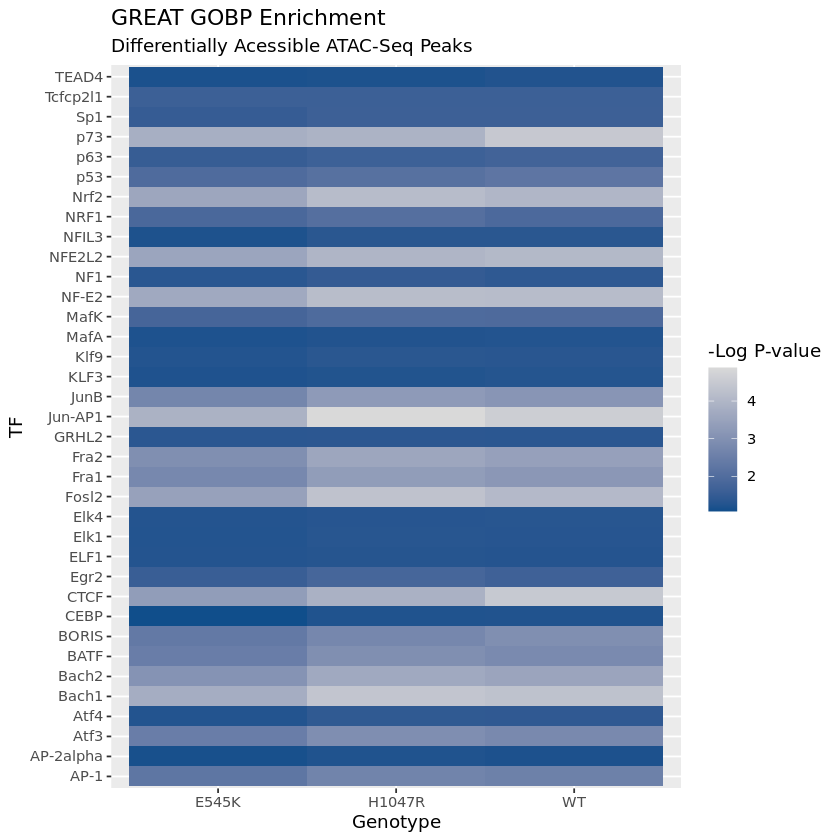

In [35]:
p <- ggplot(plot_df, aes(x=Genotype, y=reorder(clean_names, MutationNum))) + 
     geom_tile(aes(fill = OddsRatio)) +
     ggtitle("GREAT GOBP Enrichment", "Differentially Acessible ATAC-Seq Peaks") + 
     ylab(label = "TF") + labs(fill = "-Log P-value") +
     scale_fill_gradient(low="dodgerblue4", high="grey85")
p

In [36]:
library(RColorBrewer)

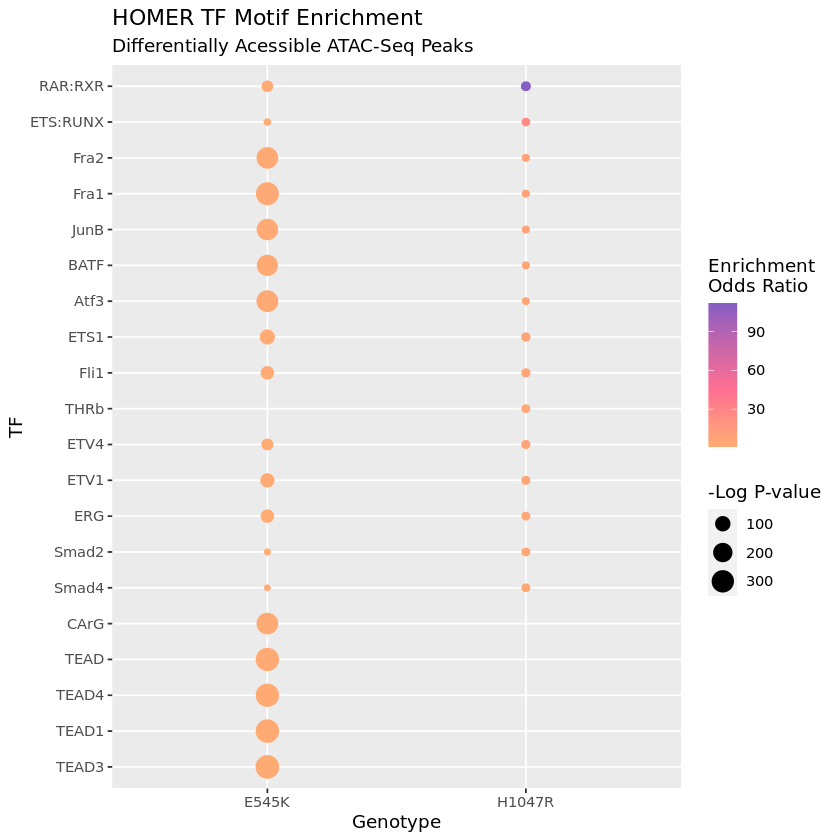

In [37]:
p <- plot_dfDiff %>%
     dplyr::filter(OddsRatio > 0, `Log P-value` < 0) %>%
     ggplot(aes(x = Genotype, y=reorder(clean_names, OddsRatio))) + 
     geom_point(aes(size = -`Log P-value`, color = OddsRatio)) +
     ggtitle("HOMER TF Motif Enrichment", "Differentially Acessible ATAC-Seq Peaks") + 
     ylab(label = "TF") + labs(color = "Enrichment\nOdds Ratio", size = "-Log P-value") +
     scale_colour_gradient2(low = "#FFC75F", mid = "#FF6F91", high = "#845EC2", 
                            midpoint = 45)
p

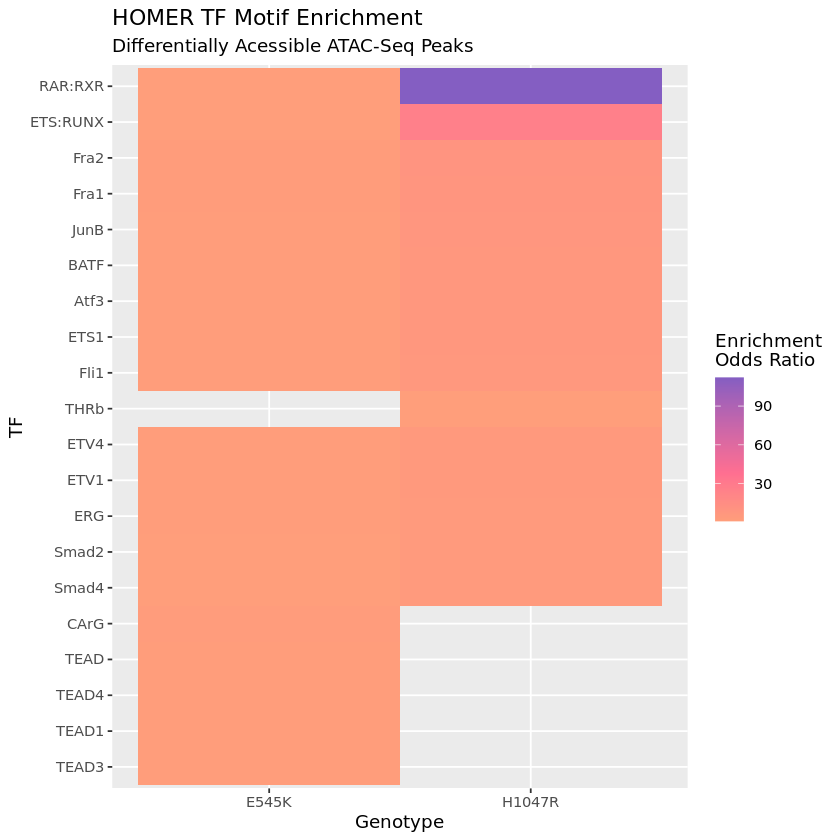

In [38]:
p <- plot_dfDiff %>%
     dplyr::filter(OddsRatio > 0, `Log P-value` < 0) %>%
     ggplot(aes(x = Genotype, y=reorder(clean_names, OddsRatio))) + 
     geom_tile(aes(fill = OddsRatio)) +
     ggtitle("HOMER TF Motif Enrichment", "Differentially Acessible ATAC-Seq Peaks") + 
     ylab(label = "TF") + labs(fill = "Enrichment\nOdds Ratio", size = "-Log P-value") +
     scale_fill_gradient2(low = "#FFC75F", mid = "#FF6F91", high = "#845EC2", 
                            midpoint = 38)
p

## Let's do it all by OR

In [39]:
Ex9_krDiff_OR <- Ex9_krDiff %>% 
              dplyr::mutate(OddsRatio = as.numeric(gsub(.[[7]], 
                                                   pattern = "%", 
                                                   replacement = ""))
                            / as.numeric(gsub(.[[9]], 
                                                   pattern = "%", 
                                                   replacement = ""))) %>% 
              dplyr::select(-c(6,8))
Ex9_krDiff_OR$Genotype <- "E545K"
Ex20_krDiff_OR <- Ex20_krDiff %>%
              dplyr::mutate(OddsRatio = as.numeric(gsub(.[[7]], 
                                                   pattern = "%", 
                                                   replacement = ""))
                            / as.numeric(gsub(.[[9]], 
                                                   pattern = "%", 
                                                   replacement = ""))) %>% 
              dplyr::select(-c(6,8))
Ex20_krDiff_OR$Genotype <- "H1047R"
str(Ex9_krDiff_OR)
str(Ex20_krDiff_OR)

'data.frame':	428 obs. of  10 variables:
 $ Motif Name                          : chr  "TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer" "TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer" "TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer" "TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer" ...
 $ Consensus                           : chr  "TRCATTCCAG" "CYRCATTCCA" "YCWGGAATGY" "CCWGGAATGY" ...
 $ P-value                             : num  1e-151 1e-148 1e-145 1e-145 1e-140 ...
 $ Log P-value                         : num  -349 -341 -336 -334 -323 ...
 $ q-value (Benjamini)                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ % of Target Sequences with Motif    : chr  "34.59%" "30.65%" "23.47%" "28.43%" ...
 $ % of Background Sequences with Motif: chr  "20.75%" "17.64%" "12.12%" "15.98%" ...
 $ clean_names                         : chr  "TEAD3" "TEAD1" "TEAD" "TEAD4" ...
 $ OddsRatio                           : num  1.67 1.74 1.94 1.78 2.1 ...
 $ Genotype                            : c

In [40]:
topTFsOR_Ex9 <- Ex9_krDiff_OR %>%
            arrange(OddsRatio) %>%
            tail(10) %>%
            dplyr::pull(clean_names)
topTFsOR_Ex9
topTFsOR_Ex20 <- Ex20_krDiff_OR %>%
            arrange(OddsRatio) %>%
            tail(10) %>%
            dplyr::pull(clean_names)
topTFsOR_Ex20
topTFsOR <- c(topTFsOR_Ex9, topTFsOR_Ex20)
str(topTFsOR)

[1] "PGR"       "RFX"       "GATA"      "NF-E2"     "RAR:RXR"   "GRE"      
 [7] "Nrf2"      "Bach1"     "NFE2L2"    "NF1:FOXA1"

[1] "FXR"      "Fra1"     "ZNF322"   "Fra2"     "PRDM1"    "Fosl2"   
 [7] "Jun-AP1"  "Mef2d"    "ETS:RUNX" "RAR:RXR"

 chr [1:20] "PGR" "RFX" "GATA" "NF-E2" "RAR:RXR" "GRE" "Nrf2" "Bach1" ...


In [41]:
Ex9_krDiff_OR_filt <- Ex9_krDiff_OR %>%
                      dplyr::filter(clean_names %in% topTFsOR)
Ex20_krDiff_OR_filt <- Ex20_krDiff_OR %>%
                      dplyr::filter(clean_names %in% topTFsOR)
total_krDiff_OR_filt <- rbind(Ex9_krDiff_OR_filt, Ex20_krDiff_OR_filt)
str(total_krDiff_OR_filt)

'data.frame':	44 obs. of  10 variables:
 $ Motif Name                          : chr  "Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer" "Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer" "Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer" "GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer" ...
 $ Consensus                           : chr  "NNATGASTCATH" "GGATGACTCATC" "NATGASTCABNN" "NRGVACABNVTGTYCY" ...
 $ P-value                             : num  1e-140 1e-119 1e-98 1e-96 1e-95 ...
 $ Log P-value                         : num  -323 -275 -228 -222 -221 ...
 $ q-value (Benjamini)                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ % of Target Sequences with Motif    : chr  "19.10%" "16.53%" "12.32%" "6.94%" ...
 $ % of Background Sequences with Motif: chr  "9.10%" "7.87%" "5.53%" "2.25%" ...
 $ clean_names                         : chr  "Fra1" "Fra2" "Fosl2" "GRE" ...
 $ OddsRatio                           : num  2.1 2.1 2.23 3.08 2.54 ...
 $ Genotype                            : chr  "E545K

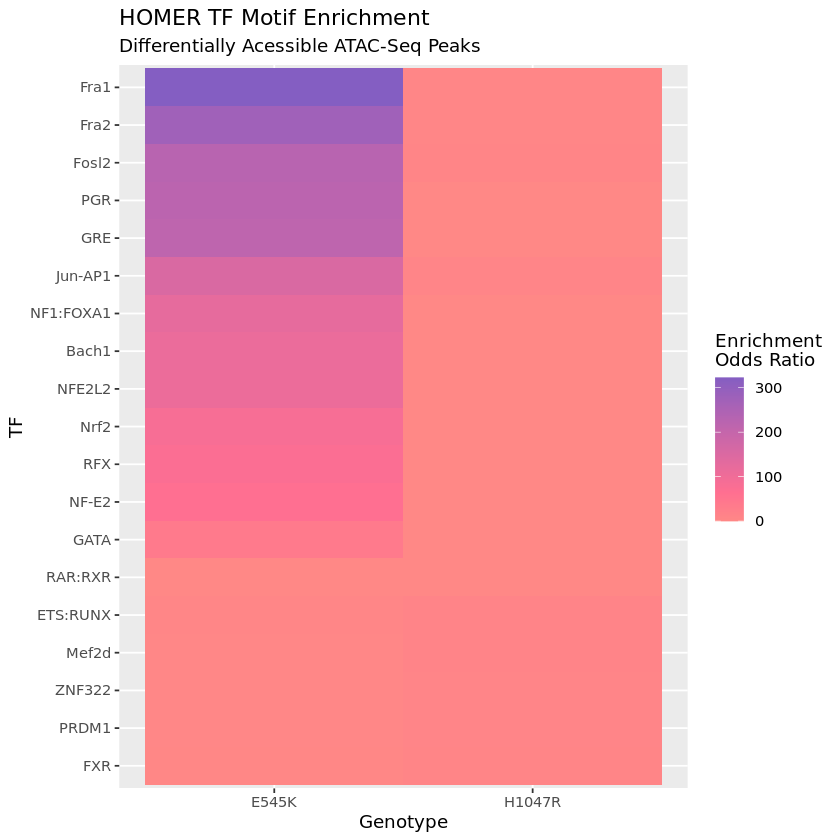

In [42]:
p <- total_krDiff_OR_filt %>%
     ggplot(aes(x = Genotype, y=reorder(clean_names, -`Log P-value`))) + 
     geom_tile(aes(fill = -`Log P-value`)) +
     ggtitle("HOMER TF Motif Enrichment", "Differentially Acessible ATAC-Seq Peaks") + 
     ylab(label = "TF") + labs(fill = "Enrichment\nOdds Ratio", size = "-Log P-value") +
     scale_fill_gradient2(low = "#FFC75F", mid = "#FF6F91", high = "#845EC2", 
                            midpoint = 65)
p

## Levenshtein Shenans

In [43]:
str(Ex9_krDiff_OR)
str(Ex20_krDiff_OR)

'data.frame':	428 obs. of  10 variables:
 $ Motif Name                          : chr  "TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer" "TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer" "TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer" "TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer" ...
 $ Consensus                           : chr  "TRCATTCCAG" "CYRCATTCCA" "YCWGGAATGY" "CCWGGAATGY" ...
 $ P-value                             : num  1e-151 1e-148 1e-145 1e-145 1e-140 ...
 $ Log P-value                         : num  -349 -341 -336 -334 -323 ...
 $ q-value (Benjamini)                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ % of Target Sequences with Motif    : chr  "34.59%" "30.65%" "23.47%" "28.43%" ...
 $ % of Background Sequences with Motif: chr  "20.75%" "17.64%" "12.12%" "15.98%" ...
 $ clean_names                         : chr  "TEAD3" "TEAD1" "TEAD" "TEAD4" ...
 $ OddsRatio                           : num  1.67 1.74 1.94 1.78 2.1 ...
 $ Genotype                            : c

In [44]:
library(RecordLinkage)

Loading required package: DBI

Loading required package: RSQLite

Loading required package: ff

Loading required package: bit


Attaching package: ‘bit’


The following object is masked from ‘package:dplyr’:

    symdiff


The following object is masked from ‘package:base’:

    xor


Attaching package ff

- getOption("fftempdir")=="/tmp/RtmpyraWNC/ff"


- getOption("ffextension")=="ff"


- getOption("ffdrop")==TRUE


- getOption("fffinonexit")==TRUE


- getOption("ffpagesize")==65536


- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes


- getOption("ffbatchbytes")==16777216 -- consider a different value for tuning your system


- getOption("ffmaxbytes")==536870912 -- consider a different value for tuning your system



Attaching package: ‘ff’


The following objects are masked from ‘package:utils’:

    write.csv, write.csv2


The following objects are masked from ‘package:base’:

    is.factor, is.ordered


RecordLinkage library

[

In [45]:
consensusdf_Ex9 <- as.data.frame(Ex9_krDiff_OR$Consensus)
consensusdf_Ex9[1,2] = 0.0
vec_len <- length(Ex9_krDiff_OR$Consensus)
  for(i in 2:vec_len){
    consensusdf_Ex9[i,2]=max(sapply(as.list(Ex9_krDiff_OR$Consensus[1:(i-1)]), 
                             function(x) levenshteinSim(x, Ex9_krDiff_OR$Consensus[i])))
  }
names(consensusdf_Ex9) <- c("Consensus", "LevenSim")
consensusdf_Ex9
consensusdf_Ex20 <- as.data.frame(Ex20_krDiff_OR$Consensus)
consensusdf_Ex20[1,2] = 0.0
vec_len <- length(Ex20_krDiff_OR$Consensus)
  for(i in 2:vec_len){
    consensusdf_Ex20[i,2]=max(sapply(as.list(Ex20_krDiff_OR$Consensus[1:(i-1)]), 
                             function(x) levenshteinSim(x, Ex20_krDiff_OR$Consensus[i])))
  }
names(consensusdf_Ex20) <- c("Consensus", "LevenSim")
consensusdf_Ex20

Consensus        LevenSim 
1   TRCATTCCAG       0.0000000
2   CYRCATTCCA       0.7000000
3   YCWGGAATGY       0.2000000
4   CCWGGAATGY       0.9000000
5   NNATGASTCATH     0.2500000
6   DATGASTCATHN     0.7500000
7   CCATATATGGNM     0.4166667
8   GGATGACTCATC     0.6666667
9   RATGASTCAT       0.7500000
10  DATGASTCAT       0.9000000
11  VTGACTCATC       0.7500000
12  NATGASTCABNN     0.7500000
13  NRGVACABNVTGTYCY 0.3125000
14  AAGAACATWHTGTTC  0.5000000
15  VAGRACAKWCTGTYC  0.6666667
16  CCWGGAATGY       1.0000000
17  RGRACASNSTGTYCYB 0.6875000
18  TGCTGAGTCA       0.5833333
19  GATGASTCATCN     0.8333333
20  ANCAGGAAGT       0.5000000
21  ACVAGGAAGT       0.8000000
22  SAAACCACAG       0.4000000
23  NWAACCACADNN     0.5833333
24  WNTGTTTRYTTTGGCA 0.3750000
25  BSNTGTTTACWYWGN  0.3750000
26  GCTGTGGTTW       0.5000000
27  AWWNTGCTGAGTCAT  0.6666667
28  NNAYTTCCTGHN     0.4166667
29  TRTTTACTTW       0.5000000
30  AVCAGGAAGT       0.9000000
⋮   ⋮                ⋮        
399 VCAGCTGBNN       0.7000000
400 HDGYAATGAAAN     0.7500000
401 AAGACCCYYN       0.5000000
402 RGGTTACTANAGGTCA 0.6875000
403 CYAAAAATAG       0.6000000
404 GCTATTTTTGGM     0.8333333
405 DCYAAAAATAGM     0.8333333
406 RGCCATTAAC       0.7000000
407 RSCACTYRAG       0.5000000
408 BTBRAGTGSN       0.6000000
409 RRSCACTYAA       0.7000000
410 AAGCACTTAA       0.6000000
411 GKTAATGR         0.6250000
412 NRBCARRGGTCA     0.7500000
413 TAATCCCN         0.6250000
414 ACAGCTGTTN       0.7000000
415 TTGAMCTTTG       0.6000000
416 SNGCACCTGCHS     0.6666667
417 AGGTGTGAAM       0.7000000
418 AGGTGTGAAA       0.9000000
419 AGGTGTCA         0.7500000
420 DAGGTGTBAA       0.8000000
421 GGTCACCTGAGGTCA  0.6875000
422 GGTCANYTGAGGWCA  0.8000000
423 TRAGGTCA         0.7000000
424 HAWGRGGCCM       0.6000000
425 VCAGGTRDRY       0.5000000
426 GNMCAGGTGTGC     0.5833333
427 WDNCTGGGCA       0.5333333
428 AGGCCTAG         0.8750000

Consensus                 LevenSim 
1   RGGTCADNNAGAGGTCAV        0.0000000
2   ACAGGAAGTG                0.3333333
3   NRYTTCCGGH                0.2222222
4   ACCGGAAGTG                0.9000000
5   AACCGGAAGT                0.8000000
6   ACAGGAAGTG                1.0000000
7   CTGTCTGG                  0.4000000
8   VBSYGTCTGG                0.6000000
9   GGTCACCTGAGGTCA           0.6666667
10  RCAGGATGTGGT              0.6666667
11  GCTATTTTTAGC              0.4166667
12  ACTTTCACTTTC              0.4166667
13  GAGCCTGGTACTGWGCCTGR      0.4500000
14  GATGASTCATCN              0.4666667
15  AGGTCANTGACCTB            0.5333333
16  ATTGCGCAAC                0.5000000
17  SAAACCACAG                0.4000000
18  NATGASTCABNN              0.7500000
19  WGGGGATTTCCC              0.4285714
20  TWGTCTGV                  0.6250000
21  GRTGMTRGAGCC              0.4166667
22  GGATGACTCATC              0.7500000
23  BAACAGCTGT                0.5000000
24  NNATGASTCATH              0.6666667
25  RATGASTCAT                0.7500000
26  DATGASTCAT                0.9000000
27  RRCAGCTGYTSY              0.5000000
28  DATGASTCATHN              0.8333333
29  MCTCCCMCRCAB              0.3333333
30  TYTGACCASWRG              0.4166667
⋮   ⋮                         ⋮        
399 CAAGATGGCGGC              0.5833333
400 NGNTCTAGAACCNGV           0.4705882
401 AACATCTGGA                0.7000000
402 GGVTCTCGCGAGAAC           0.6666667
403 GNMCAGGTGTGC              0.5833333
404 CCCCTCCCCCAC              0.5833333
405 GGGTTTTGAAGGATGARTAGGAGTT 0.4400000
406 NANTGCSGCA                0.5000000
407 GGGGCTYGKCTGGGA           0.5500000
408 GGCCYCCTGCTGDGH           0.5333333
409 CCTGCTGAGH                0.6000000
410 GCACAYAGTAGGKCY           0.5333333
411 YTKGATAHAGTATTCTWGGTNGGCA 0.4400000
412 AAGGKGRCGCAGGCA           0.6000000
413 MACCTTCYATGGCTCCCTAKTGCCY 0.4800000
414 TGGAACAGMA                0.5833333
415 RGGGCACTAACY              0.8333333
416 GTCWGCTGTYYCTCT           0.5333333
417 GGAACAGCCG                0.7500000
418 GNCTGTASTRNTGBCTCHTT      0.4500000
419 CCTCATGGTGYCYTWYTCCCTTGTG 0.4400000
420 GAGSCCGAGC                0.6000000
421 AGAAATGACTTCCCT           0.6000000
422 TTAACCCTTTVNKKN           0.5333333
423 GARTGGTCATCGCCC           0.6000000
424 ARGAGGMCAAAATGW           0.6000000
425 GTGGGCCCCA                0.5833333
426 RHHCAGAGAGGB              0.5000000
427 CTGCCWVCTTTTRTA           0.4666667
428 SMCAGTCWGAKGGAGGAGGC      0.5000000

In [46]:
consensusdf_Ex9_filt <- consensusdf_Ex9 %>%
                        dplyr::filter(LevenSim < 0.5)
consensusdf_Ex20_filt <- consensusdf_Ex20 %>%
                        dplyr::filter(LevenSim < 0.5)

In [47]:
Ex9_krDiff_OR_collapsed <- Ex9_krDiff_OR %>%
                           dplyr::filter(Consensus %in% consensusdf_Ex9_filt$Consensus)
Ex20_krDiff_OR_collapsed <- Ex20_krDiff_OR %>%
                           dplyr::filter(Consensus %in% consensusdf_Ex20_filt$Consensus)
str(Ex9_krDiff_OR_collapsed)
str(Ex20_krDiff_OR_collapsed)

'data.frame':	46 obs. of  10 variables:
 $ Motif Name                          : chr  "TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer" "TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer" "Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer" "CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer" ...
 $ Consensus                           : chr  "TRCATTCCAG" "YCWGGAATGY" "NNATGASTCATH" "CCATATATGGNM" ...
 $ P-value                             : num  1e-151 1e-145 1e-140 1e-119 1e-96 ...
 $ Log P-value                         : num  -349 -336 -323 -275 -222 ...
 $ q-value (Benjamini)                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ % of Target Sequences with Motif    : chr  "34.59%" "23.47%" "19.10%" "12.23%" ...
 $ % of Background Sequences with Motif: chr  "20.75%" "12.12%" "9.10%" "4.98%" ...
 $ clean_names                         : chr  "TEAD3" "TEAD" "Fra1" "CArG" ...
 $ OddsRatio                           : num  1.67 1.94 2.1 2.46 3.08 ...
 $ Genotype                            : chr 

In [48]:
topTFsOR_Ex9_coll <- Ex9_krDiff_OR_collapsed %>%
            arrange(OddsRatio) %>%
            tail(10) %>%
            dplyr::pull(`Motif Name`)
topTFsOR_Ex9_coll
topTFsOR_Ex20_coll <- Ex20_krDiff_OR_collapsed %>%
            arrange(OddsRatio) %>%
            tail(10) %>%
            dplyr::pull(`Motif Name`)
topTFsOR_Ex20_coll
topTFsOR_coll <- c(topTFsOR_Ex9_coll, topTFsOR_Ex20_coll)
str(topTFsOR_coll)

[1] "Foxa3(Forkhead)/Liver-Foxa3-ChIP-Seq(GSE77670)/Homer"        
 [2] "TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer"       
 [3] "p53(p53)/Saos-p53-ChIP-Seq(GSE15780)/Homer"                  
 [4] "p53(p53)/Saos-p53-ChIP-Seq/Homer"                            
 [5] "Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer"              
 [6] "CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer"         
 [7] "GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer"           
 [8] "RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer"             
 [9] "GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer"                
[10] "NF1:FOXA1(CTF,Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)/Homer"

[1] "Fli1(ETS)/CD8-FLI-ChIP-Seq(GSE20898)/Homer"                       
 [2] "CDX4(Homeobox)/ZebrafishEmbryos-Cdx4.Myc-ChIP-Seq(GSE48254)/Homer"
 [3] "ETS1(ETS)/Jurkat-ETS1-ChIP-Seq(GSE17954)/Homer"                   
 [4] "NFkB-p65(RHD)/GM12787-p65-ChIP-Seq(GSE19485)/Homer"               
 [5] "RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer"                   
 [6] "ZNF322(Zf)/HEK293-ZNF322.GFP-ChIP-Seq(GSE58341)/Homer"            
 [7] "PRDM1(Zf)/Hela-PRDM1-ChIP-Seq(GSE31477)/Homer"                    
 [8] "Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer"                 
 [9] "Mef2d(MADS)/Retina-Mef2d-ChIP-Seq(GSE61391)/Homer"                
[10] "RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer"

 chr [1:20] "Foxa3(Forkhead)/Liver-Foxa3-ChIP-Seq(GSE77670)/Homer" ...


In [49]:
Ex9_krDiff_OR_collapsed_filt <- Ex9_krDiff_OR_collapsed %>%
                      dplyr::filter(`Motif Name` %in% topTFsOR_coll)
Ex20_krDiff_OR_collapsed_filt <- Ex20_krDiff_OR_collapsed %>%
                      dplyr::filter(`Motif Name` %in% topTFsOR_coll)
total_krDiff_OR_collapsed_filt <- rbind(Ex9_krDiff_OR_collapsed_filt, 
                                        Ex20_krDiff_OR_collapsed_filt)
str(total_krDiff_OR_collapsed_filt)

'data.frame':	21 obs. of  10 variables:
 $ Motif Name                          : chr  "TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer" "Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer" "CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer" "GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer" ...
 $ Consensus                           : chr  "YCWGGAATGY" "NNATGASTCATH" "CCATATATGGNM" "NRGVACABNVTGTYCY" ...
 $ P-value                             : num  1e-145 1e-140 1e-119 1e-96 1e-60 ...
 $ Log P-value                         : num  -336 -323 -275 -222 -139 ...
 $ q-value (Benjamini)                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ % of Target Sequences with Motif    : chr  "23.47%" "19.10%" "12.23%" "6.94%" ...
 $ % of Background Sequences with Motif: chr  "12.12%" "9.10%" "4.98%" "2.25%" ...
 $ clean_names                         : chr  "TEAD" "Fra1" "CArG" "GRE" ...
 $ OddsRatio                           : num  1.94 2.1 2.46 3.08 1.55 ...
 $ Genotype                            : chr 

In [50]:
total_krDiff_OR_collapsed_filt

Motif Name                                                       
1  TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer            
2  Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer                   
3  CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer              
4  GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer                     
5  RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer                   
6  NF1:FOXA1(CTF,Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)/Homer     
7  Foxa3(Forkhead)/Liver-Foxa3-ChIP-Seq(GSE77670)/Homer             
8  GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                
9  p53(p53)/Saos-p53-ChIP-Seq(GSE15780)/Homer                       
10 p53(p53)/Saos-p53-ChIP-Seq/Homer                                 
11 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer                  
12 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer                  
13 ETS1(ETS)/Jurkat-ETS1-ChIP-Seq(GSE17954)/Homer                   
14 Fli1(ETS)/CD8-FLI-ChIP-Seq(GSE20898)/Homer                       
15 Mef2d(MADS)/Retina-Mef2d-ChIP-Seq(GSE61391)/Homer                
16 PRDM1(Zf)/Hela-PRDM1-ChIP-Seq(GSE31477)/Homer                    
17 ZNF322(Zf)/HEK293-ZNF322.GFP-ChIP-Seq(GSE58341)/Homer            
18 Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer                 
19 RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer                   
20 NFkB-p65(RHD)/GM12787-p65-ChIP-Seq(GSE19485)/Homer               
21 CDX4(Homeobox)/ZebrafishEmbryos-Cdx4.Myc-ChIP-Seq(GSE48254)/Homer
   Consensus            P-value Log P-value q-value (Benjamini)
1  YCWGGAATGY           1e-145  -335.500    0.0000             
2  NNATGASTCATH         1e-140  -322.700    0.0000             
3  CCATATATGGNM         1e-119  -274.700    0.0000             
4  NRGVACABNVTGTYCY      1e-96  -221.500    0.0000             
5  SAAACCACAG            1e-60  -138.900    0.0000             
6  WNTGTTTRYTTTGGCA      1e-54  -125.000    0.0000             
7  BSNTGTTTACWYWGN       1e-53  -123.500    0.0000             
8  NAGATWNBNATCTNN       1e-26   -61.080    0.0000             
9  RRCATGYCYRGRCATGYYYN  1e-21   -48.650    0.0000             
10 RRCATGYCYRGRCATGYYYN  1e-21   -48.650    0.0000             
11 RGGTCADNNAGAGGTCAV    1e-15   -34.750    0.0000             
12 RGGTCADNNAGAGGTCAV    1e-07   -17.550    0.0000             
13 ACAGGAAGTG            1e-05   -13.050    0.0005             
14 NRYTTCCGGH            1e-05   -12.080    0.0008             
15 GCTATTTTTAGC          1e-03    -8.714    0.0066             
16 ACTTTCACTTTC          1e-03    -7.716    0.0159             
17 GAGCCTGGTACTGWGCCTGR  1e-03    -7.538    0.0175             
18 GATGASTCATCN          1e-03    -7.443    0.0179             
19 SAAACCACAG            1e-02    -6.669    0.0320             
20 WGGGGATTTCCC          1e-02    -6.542    0.0329             
21 NGYCATAAAWCH          1e-02    -4.676    0.1323             
   % of Target Sequences with Motif % of Background Sequences with Motif
1  23.47%                           12.12%                              
2  19.10%                           9.10%                               
3  12.23%                           4.98%                               
4  6.94%                            2.25%                               
5  20.24%                           13.03%                              
6  2.78%                            0.69%                               
7  9.62%                            5.00%                               
8  2.59%                            1.01%                               
9  3.54%                            1.79%                               
10 3.54%                            1.79%                               
11 1.25%                            0.45%                               
12 57.14%                           0.51%                               
13 100.00%                          15.50%                              
14 100.00%                          17.80%             

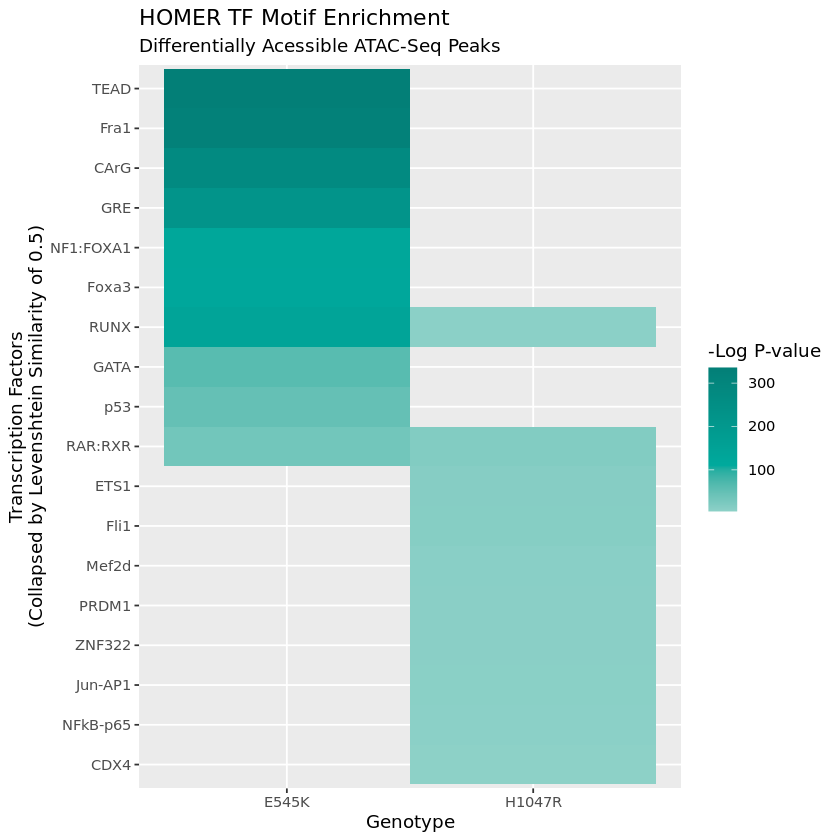

In [51]:
p <- total_krDiff_OR_collapsed_filt %>%
     ggplot(aes(x = Genotype, y=reorder(clean_names, -`Log P-value`))) + 
     geom_tile(aes(fill = -`Log P-value`)) +
     ggtitle("HOMER TF Motif Enrichment", "Differentially Acessible ATAC-Seq Peaks") + 
     ylab(label = "Transcription Factors\n(Collapsed by Levenshtein Similarity of 0.5)") + 
     labs(fill = "-Log P-value") +
     scale_fill_gradient2(low = "#EEFCFA", mid = "#00AA9D", high = "#037F77", 
                          midpoint = 110)
p

In [52]:
Ex20_krDiff_invOR_collapsed_filt <- Ex20_krDiff_OR_collapsed_filt
Ex20_krDiff_invOR_collapsed_filt$OddsRatio <- -Ex20_krDiff_OR_collapsed_filt$OddsRatio
total_krDiff_invOR_collapsed_filt <- rbind(Ex9_krDiff_OR_collapsed_filt, 
                                        Ex20_krDiff_invOR_collapsed_filt)

In [53]:
total_krDiff_invOR_collapsed_filt

Motif Name                                                       
1  TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer            
2  Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer                   
3  CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer              
4  GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer                     
5  RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer                   
6  NF1:FOXA1(CTF,Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)/Homer     
7  Foxa3(Forkhead)/Liver-Foxa3-ChIP-Seq(GSE77670)/Homer             
8  GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                
9  p53(p53)/Saos-p53-ChIP-Seq(GSE15780)/Homer                       
10 p53(p53)/Saos-p53-ChIP-Seq/Homer                                 
11 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer                  
12 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer                  
13 ETS1(ETS)/Jurkat-ETS1-ChIP-Seq(GSE17954)/Homer                   
14 Fli1(ETS)/CD8-FLI-ChIP-Seq(GSE20898)/Homer                       
15 Mef2d(MADS)/Retina-Mef2d-ChIP-Seq(GSE61391)/Homer                
16 PRDM1(Zf)/Hela-PRDM1-ChIP-Seq(GSE31477)/Homer                    
17 ZNF322(Zf)/HEK293-ZNF322.GFP-ChIP-Seq(GSE58341)/Homer            
18 Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer                 
19 RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer                   
20 NFkB-p65(RHD)/GM12787-p65-ChIP-Seq(GSE19485)/Homer               
21 CDX4(Homeobox)/ZebrafishEmbryos-Cdx4.Myc-ChIP-Seq(GSE48254)/Homer
   Consensus            P-value Log P-value q-value (Benjamini)
1  YCWGGAATGY           1e-145  -335.500    0.0000             
2  NNATGASTCATH         1e-140  -322.700    0.0000             
3  CCATATATGGNM         1e-119  -274.700    0.0000             
4  NRGVACABNVTGTYCY      1e-96  -221.500    0.0000             
5  SAAACCACAG            1e-60  -138.900    0.0000             
6  WNTGTTTRYTTTGGCA      1e-54  -125.000    0.0000             
7  BSNTGTTTACWYWGN       1e-53  -123.500    0.0000             
8  NAGATWNBNATCTNN       1e-26   -61.080    0.0000             
9  RRCATGYCYRGRCATGYYYN  1e-21   -48.650    0.0000             
10 RRCATGYCYRGRCATGYYYN  1e-21   -48.650    0.0000             
11 RGGTCADNNAGAGGTCAV    1e-15   -34.750    0.0000             
12 RGGTCADNNAGAGGTCAV    1e-07   -17.550    0.0000             
13 ACAGGAAGTG            1e-05   -13.050    0.0005             
14 NRYTTCCGGH            1e-05   -12.080    0.0008             
15 GCTATTTTTAGC          1e-03    -8.714    0.0066             
16 ACTTTCACTTTC          1e-03    -7.716    0.0159             
17 GAGCCTGGTACTGWGCCTGR  1e-03    -7.538    0.0175             
18 GATGASTCATCN          1e-03    -7.443    0.0179             
19 SAAACCACAG            1e-02    -6.669    0.0320             
20 WGGGGATTTCCC          1e-02    -6.542    0.0329             
21 NGYCATAAAWCH          1e-02    -4.676    0.1323             
   % of Target Sequences with Motif % of Background Sequences with Motif
1  23.47%                           12.12%                              
2  19.10%                           9.10%                               
3  12.23%                           4.98%                               
4  6.94%                            2.25%                               
5  20.24%                           13.03%                              
6  2.78%                            0.69%                               
7  9.62%                            5.00%                               
8  2.59%                            1.01%                               
9  3.54%                            1.79%                               
10 3.54%                            1.79%                               
11 1.25%                            0.45%                               
12 57.14%                           0.51%                               
13 100.00%                          15.50%                              
14 100.00%                          17.80%             

In [54]:
total_krDiff_invOR_collapsed_filt$clean_names <- as.factor(total_krDiff_invOR_collapsed_filt$clean_names)

In [55]:
library(ggbreak)

ggbreak v0.1.1

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846




## Making a barplot

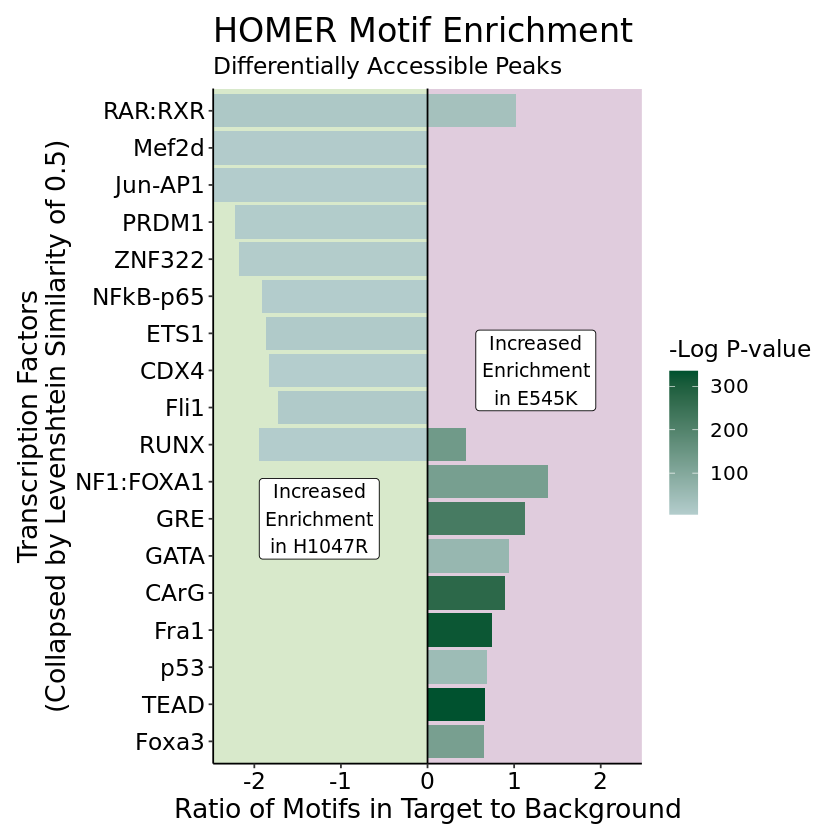

In [56]:
barp <- ggplot(total_krDiff_OR_collapsed_filt,aes(x=reorder(clean_names, OddsRatio), 
       y = ifelse(Genotype == "E545K", log(OddsRatio), -log(OddsRatio)), fill=-`Log P-value`))+ 
    annotate("rect", xmin = -Inf, ymin = 0, 
             ymax = Inf, xmax = Inf,
             fill = "#C29ABB", alpha = 0.5) +
    annotate("rect", xmin = -Inf, ymin = -Inf, 
             ymax = 0, xmax = Inf,
             fill = "#B2D498", alpha = 0.5) +
    geom_bar(stat="identity", position="identity")+ 
#     scale_y_break(c(-1.5, -2.5)) + 
    geom_hline(yintercept = 0, color = "black") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15))+
    scale_y_continuous(breaks=seq(-3, 3, by = 1)) +
    coord_flip(ylim = c(-2.25, 2.25)) +
    scale_fill_gradient(low = "lightcyan3", #mid = "#F60F66",
                        high = "#00522F") +
    labs(fill = "-Log P-value") +
    ylab(label = "Ratio of Motifs in Target to Background") + 
    xlab(label = "Transcription Factors\n(Collapsed by Levenshtein Similarity of 0.5)") +
    ggtitle(label = "HOMER Motif Enrichment", subtitle = "Differentially Accessible Peaks") +
    annotate("label", x = 11, y = 1.25, label = "Increased\nEnrichment\nin E545K",
             size = 4, family = "Arial", color = "black") +
    annotate("label", x = 7, y = -1.25, label = "Increased\nEnrichment\nin H1047R",
             size = 4, family = "Arial", color = "black") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
barp

In [57]:
ggsave(filename="/data/park_lab/adam/figures/Homer_barp4-4.png", 
       plot = barp, type = "cairo", width = 8, height = 8)

## Rethinking the plot/collapse

In [58]:
str(Ex9_krDiff)
str(Ex20_krDiff)

'data.frame':	428 obs. of  10 variables:
 $ Motif Name                                    : chr  "TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer" "TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer" "TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer" "TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer" ...
 $ Consensus                                     : chr  "TRCATTCCAG" "CYRCATTCCA" "YCWGGAATGY" "CCWGGAATGY" ...
 $ P-value                                       : num  1e-151 1e-148 1e-145 1e-145 1e-140 ...
 $ Log P-value                                   : num  -349 -341 -336 -334 -323 ...
 $ q-value (Benjamini)                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ # of Target Sequences with Motif(of 6727)     : num  2327 2062 1579 1913 1285 ...
 $ % of Target Sequences with Motif              : chr  "34.59%" "30.65%" "23.47%" "28.43%" ...
 $ # of Background Sequences with Motif(of 42535): num  8826 7504 5156 6797 3869 ...
 $ % of Background Sequences with Motif          : ch

In [59]:
Ex9_krDiff_reorder <- Ex9_krDiff %>% arrange(`Motif Name`)
Ex20_krDiff_reorder <- Ex20_krDiff %>% arrange(`Motif Name`)
head(Ex9_krDiff_reorder$`Motif Name`)
head(Ex20_krDiff_reorder$`Motif Name`)

[1] "AMYB(HTH)/Testes-AMYB-ChIP-Seq(GSE44588)/Homer"       
[2] "AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer"     
[3] "AP-2alpha(AP2)/Hela-AP2alpha-ChIP-Seq(GSE31477)/Homer"
[4] "AP-2gamma(AP2)/MCF7-TFAP2C-ChIP-Seq(GSE21234)/Homer"  
[5] "AR-halfsite(NR)/LNCaP-AR-ChIP-Seq(GSE27824)/Homer"    
[6] "ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer"

[1] "AMYB(HTH)/Testes-AMYB-ChIP-Seq(GSE44588)/Homer"       
[2] "AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer"     
[3] "AP-2alpha(AP2)/Hela-AP2alpha-ChIP-Seq(GSE31477)/Homer"
[4] "AP-2gamma(AP2)/MCF7-TFAP2C-ChIP-Seq(GSE21234)/Homer"  
[5] "AR-halfsite(NR)/LNCaP-AR-ChIP-Seq(GSE27824)/Homer"    
[6] "ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer"

In [60]:
consensusdf_Ex9 <- as.data.frame(Ex9_krDiff_reorder$Consensus)
consensusdf_Ex9[1,2] = 0.0
vec_len <- length(Ex9_krDiff_reorder$Consensus)
  for(i in 2:vec_len){
    consensusdf_Ex9[i,2]=max(sapply(as.list(Ex9_krDiff_reorder$Consensus[1:(i-1)]), 
                             function(x) levenshteinSim(x, Ex9_krDiff_reorder$Consensus[i])))
  }
names(consensusdf_Ex9) <- c("Consensus", "LevenSim")
consensusdf_Ex9
consensusdf_Ex20 <- as.data.frame(Ex20_krDiff_reorder$Consensus)
consensusdf_Ex20[1,2] = 0.0
vec_len <- length(Ex20_krDiff_reorder$Consensus)
  for(i in 2:vec_len){
    consensusdf_Ex20[i,2]=max(sapply(as.list(Ex20_krDiff_reorder$Consensus[1:(i-1)]), 
                             function(x) levenshteinSim(x, Ex20_krDiff_reorder$Consensus[i])))
  }
names(consensusdf_Ex20) <- c("Consensus", "LevenSim")
consensusdf_Ex20

Consensus             LevenSim 
1   TGGCAGTTGG            0.0000000
2   VTGACTCATC            0.3000000
3   ATGCCCTGAGGC          0.5000000
4   SCCTSAGGSCAW          0.3333333
5   CCAGGAACAG            0.5000000
6   RGRACASNSTGTYCYB      0.3125000
7   NAHCAGCTGD            0.5000000
8   TBGCACGCAA            0.4000000
9   NNVVCAGCTGBN          0.5833333
10  SSRGCAGCTGCH          0.5000000
11  GATGACGTCA            0.5000000
12  NRRTGACGTCAT          0.6666667
13  DATGASTCATHN          0.5833333
14  MTGATGCAAT            0.5000000
15  NGRTGACGTCAY          0.8333333
16  VNRVCAGCTGGY          0.6666667
17  DATGASTCAT            0.8333333
18  NAMCAGCTGK            0.8000000
19  GNCACGTG              0.5000000
20  NHAACBGYYV            0.3333333
21  CNNBRGCGCCCCCTGSTGGC  0.4500000
22  AWWNTGCTGAGTCAT       0.5333333
23  TGCTGAGTCA            0.7000000
24  TTRAGTGSYK            0.4166667
25  AAACMATTAN            0.3333333
26  TYTGACCASWRG          0.4166667
27  NNNCTTTCCAGGAAA       0.4000000
28  ANTTMRCASBNNNGTGYKAAN 0.3809524
29  TATGCWAATBAV          0.5000000
30  ATGAATATTC            0.6000000
⋮   ⋮                     ⋮        
399 TGGGGAAGGGCM          0.6428571
400 GAGSCCGAGC            0.5833333
401 AGAAATGACTTCCCT       0.6000000
402 TTAACCCTTTVNKKN       0.5333333
403 GARTGGTCATCGCCC       0.6000000
404 ARGAGGMCAAAATGW       0.6000000
405 GTGGGCCCCA            0.5833333
406 CTGCCWVCTTTTRTA       0.4666667
407 AGGCCTAG              0.8750000
408 RHHCAGAGAGGB          0.5000000
409 SMCAGTCWGAKGGAGGAGGC  0.5000000
410 HAWGRGGCCM            0.6000000
411 CCCCTCCCCCAC          0.5833333
412 NANTGCSGCA            0.5000000
413 GGGGCTYGKCTGGGA       0.5500000
414 CCTGCTGAGH            0.6000000
415 GGCCYCCTGCTGDGH       0.6000000
416 CVGTSCTCCC            0.5833333
417 KCACGTGMCN            0.7000000
418 KCACGTGMCN            1.0000000
419 NAGTTTCABTHTGACTNW    0.6111111
420 ATGACGTCATCY          0.9166667
421 VCCACGTG              0.7500000
422 VVCCACGTGG            0.8000000
423 VRCCACGTGG            0.9000000
424 RRCATGYCYRGRCATGYYYN  0.5000000
425 RRCATGYCYRGRCATGYYYN  1.0000000
426 ACATGCCCGGGCAT        0.5714286
427 NNDRCATGYCYNRRCATGYH  0.6000000
428 NRRRCAWGTCCDGRCATGYY  0.6000000

Consensus             LevenSim 
1   TGGCAGTTGG            0.0000000
2   VTGACTCATC            0.3000000
3   ATGCCCTGAGGC          0.5000000
4   SCCTSAGGSCAW          0.3333333
5   CCAGGAACAG            0.5000000
6   RGRACASNSTGTYCYB      0.3125000
7   NAHCAGCTGD            0.5000000
8   TBGCACGCAA            0.4000000
9   NNVVCAGCTGBN          0.5833333
10  SSRGCAGCTGCH          0.5000000
11  GATGACGTCA            0.5000000
12  NRRTGACGTCAT          0.6666667
13  DATGASTCATHN          0.5833333
14  MTGATGCAAT            0.5000000
15  NGRTGACGTCAY          0.8333333
16  VNRVCAGCTGGY          0.6666667
17  DATGASTCAT            0.8333333
18  NAMCAGCTGK            0.8000000
19  GNCACGTG              0.5000000
20  NHAACBGYYV            0.3333333
21  CNNBRGCGCCCCCTGSTGGC  0.4500000
22  AWWNTGCTGAGTCAT       0.5333333
23  TGCTGAGTCA            0.7000000
24  TTRAGTGSYK            0.4166667
25  AAACMATTAN            0.3333333
26  TYTGACCASWRG          0.4166667
27  NNNCTTTCCAGGAAA       0.4000000
28  ANTTMRCASBNNNGTGYKAAN 0.3809524
29  TATGCWAATBAV          0.5000000
30  ATGAATATTC            0.6000000
⋮   ⋮                     ⋮        
399 TGGGGAAGGGCM          0.6428571
400 GAGSCCGAGC            0.5833333
401 AGAAATGACTTCCCT       0.6000000
402 TTAACCCTTTVNKKN       0.5333333
403 GARTGGTCATCGCCC       0.6000000
404 ARGAGGMCAAAATGW       0.6000000
405 GTGGGCCCCA            0.5833333
406 CTGCCWVCTTTTRTA       0.4666667
407 AGGCCTAG              0.8750000
408 RHHCAGAGAGGB          0.5000000
409 SMCAGTCWGAKGGAGGAGGC  0.5000000
410 HAWGRGGCCM            0.6000000
411 CCCCTCCCCCAC          0.5833333
412 NANTGCSGCA            0.5000000
413 GGGGCTYGKCTGGGA       0.5500000
414 CCTGCTGAGH            0.6000000
415 GGCCYCCTGCTGDGH       0.6000000
416 CVGTSCTCCC            0.5833333
417 KCACGTGMCN            0.7000000
418 KCACGTGMCN            1.0000000
419 NAGTTTCABTHTGACTNW    0.6111111
420 ATGACGTCATCY          0.9166667
421 VCCACGTG              0.7500000
422 VVCCACGTGG            0.8000000
423 VRCCACGTGG            0.9000000
424 RRCATGYCYRGRCATGYYYN  0.5000000
425 RRCATGYCYRGRCATGYYYN  1.0000000
426 ACATGCCCGGGCAT        0.5714286
427 NNDRCATGYCYNRRCATGYH  0.6000000
428 NRRRCAWGTCCDGRCATGYY  0.6000000

In [61]:
consensusdf_Ex9_0.5 <- consensusdf_Ex9 %>%
                        dplyr::filter(LevenSim < 0.5)
consensusdf_Ex20_0.5 <- consensusdf_Ex20 %>%
                        dplyr::filter(LevenSim < 0.5)
identical(consensusdf_Ex9_0.5, consensusdf_Ex20_0.5)

[1] TRUE

In [62]:
Ex9_krDiff_reorder_collapsed <- Ex9_krDiff_reorder %>%
                           dplyr::filter(Consensus %in% consensusdf_Ex9_0.5$Consensus)
Ex20_krDiff_reorder_collapsed <- Ex20_krDiff_reorder %>%
                           dplyr::filter(Consensus %in% consensusdf_Ex20_0.5$Consensus)
str(Ex9_krDiff_reorder_collapsed)
str(Ex20_krDiff_reorder_collapsed)

'data.frame':	43 obs. of  10 variables:
 $ Motif Name                                    : chr  "AMYB(HTH)/Testes-AMYB-ChIP-Seq(GSE44588)/Homer" "AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer" "AP-2gamma(AP2)/MCF7-TFAP2C-ChIP-Seq(GSE21234)/Homer" "ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer" ...
 $ Consensus                                     : chr  "TGGCAGTTGG" "VTGACTCATC" "SCCTSAGGSCAW" "RGRACASNSTGTYCYB" ...
 $ P-value                                       : num  1e+00 1e-100 1e-01 1e-75 1e+00 ...
 $ Log P-value                                   : num  -1.74 -231.1 -3.68 -172.7 -1.33 ...
 $ q-value (Benjamini)                           : num  0.3653 0 0.0677 0 0.5294 ...
 $ # of Target Sequences with Motif(of 6727)     : num  1771 1494 1664 669 825 ...
 $ % of Target Sequences with Motif              : chr  "26.32%" "22.21%" "24.73%" "9.94%" ...
 $ # of Background Sequences with Motif(of 42535): num  10984 5434 10087 1944 5108 ...
 $ % of Background Sequences with Motif          

In [63]:
Ex9_krDiff_reorder_collapsed_top <- Ex9_krDiff_reorder_collapsed %>%
                                    arrange(`Log P-value`)
Ex20_krDiff_reorder_collapsed_top <- Ex20_krDiff_reorder_collapsed %>%
                                    arrange(`Log P-value`)
str(Ex9_krDiff_reorder_collapsed_top)
str(Ex20_krDiff_reorder_collapsed_top)

'data.frame':	43 obs. of  10 variables:
 $ Motif Name                                    : chr  "CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer" "AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer" "ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer" "Fox:Ebox(Forkhead,bHLH)/Panc1-Foxa2-ChIP-Seq(GSE47459)/Homer" ...
 $ Consensus                                     : chr  "CCATATATGGNM" "VTGACTCATC" "RGRACASNSTGTYCYB" "NNNVCTGWGYAAACASN" ...
 $ P-value                                       : num  1e-119 1e-100 1e-75 1e-37 1e-26 ...
 $ Log P-value                                   : num  -274.7 -231.1 -172.7 -87 -61.1 ...
 $ q-value (Benjamini)                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ # of Target Sequences with Motif(of 6727)     : num  823 1494 669 1589 174 ...
 $ % of Target Sequences with Motif              : chr  "12.23%" "22.21%" "9.94%" "23.62%" ...
 $ # of Background Sequences with Motif(of 42535): num  2118 5434 1944 7398 431 ...
 $ % of Background Sequences with Mot

In [64]:
Ex9_krDiff_reorder_collapsed_top_FC <- Ex9_krDiff_reorder_collapsed_top %>%
              dplyr::mutate(FC = as.numeric(gsub(.[[7]], 
                                                   pattern = "%", 
                                                   replacement = ""))
                            / as.numeric(gsub(.[[9]], 
                                                   pattern = "%", 
                                                   replacement = ""))) %>% 
              dplyr::select(-c(6,8))
Ex20_krDiff_reorder_collapsed_top_FC <- Ex20_krDiff_reorder_collapsed_top %>%
              dplyr::mutate(FC = as.numeric(gsub(.[[7]], 
                                                   pattern = "%", 
                                                   replacement = ""))
                            / as.numeric(gsub(.[[9]], 
                                                   pattern = "%", 
                                                   replacement = ""))) %>% 
              dplyr::select(-c(6,8))

In [65]:
Ex9_krDiff_reorder_collapsed_top_FC <- Ex9_krDiff_reorder_collapsed_top_FC %>%
                                    arrange(desc(FC))
Ex20_krDiff_reorder_collapsed_top_FC <- Ex20_krDiff_reorder_collapsed_top_FC %>%
                                    arrange(desc(FC))
str(Ex9_krDiff_reorder_collapsed_top_FC)
str(Ex20_krDiff_reorder_collapsed_top_FC)

'data.frame':	43 obs. of  9 variables:
 $ Motif Name                          : chr  "GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer" "CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer" "ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer" "EBNA1(EBV-virus)/Raji-EBNA1-ChIP-Seq(GSE30709)/Homer" ...
 $ Consensus                           : chr  "NAGATWNBNATCTNN" "CCATATATGGNM" "RGRACASNSTGTYCYB" "GGYAGCAYDTGCTDCCCNNN" ...
 $ P-value                             : num  1e-26 1e-119 1e-75 1e-03 1e-20 ...
 $ Log P-value                         : num  -61.08 -274.7 -172.7 -7.36 -46.36 ...
 $ q-value (Benjamini)                 : num  0 0 0 0.002 0 0 0 0.0049 0 0 ...
 $ % of Target Sequences with Motif    : chr  "2.59%" "12.23%" "9.94%" "0.46%" ...
 $ % of Background Sequences with Motif: chr  "1.01%" "4.98%" "4.57%" "0.24%" ...
 $ clean_names                         : chr  "GATA" "CArG" "ARE" "EBNA1" ...
 $ FC                                  : num  2.56 2.46 2.18 1.92 1.79 ...
'data.frame':	43 ob

In [66]:
topTFs <- c(head(Ex9_krDiff_reorder_collapsed_top_FC$`Motif Name`, n = 5), 
            head(Ex20_krDiff_reorder_collapsed_top_FC$`Motif Name`, n = 5))
topTFs

[1] "GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer"                
 [2] "CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer"              
 [3] "ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer"                        
 [4] "EBNA1(EBV-virus)/Raji-EBNA1-ChIP-Seq(GSE30709)/Homer"             
 [5] "Tcfcp2l1(CP2)/mES-Tcfcp2l1-ChIP-Seq(GSE11431)/Homer"              
 [6] "CDX4(Homeobox)/ZebrafishEmbryos-Cdx4.Myc-ChIP-Seq(GSE48254)/Homer"
 [7] "AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer"                 
 [8] "Bcl11a(Zf)/HSPC-BCL11A-ChIP-Seq(GSE104676)/Homer"                 
 [9] "AMYB(HTH)/Testes-AMYB-ChIP-Seq(GSE44588)/Homer"                   
[10] "Bapx1(Homeobox)/VertebralCol-Bapx1-ChIP-Seq(GSE36672)/Homer"

In [67]:
Ex9_krDiff_reorder_collapsed_top_FC

Motif Name                                                          
1  GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                   
2  CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer                 
3  ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer                           
4  EBNA1(EBV-virus)/Raji-EBNA1-ChIP-Seq(GSE30709)/Homer                
5  Tcfcp2l1(CP2)/mES-Tcfcp2l1-ChIP-Seq(GSE11431)/Homer                 
6  AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer                    
7  GATA(Zf),IR3/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                   
8  ZNF382(Zf)/HEK293-ZNF382.GFP-ChIP-Seq(GSE58341)/Homer               
9  BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer                       
10 GRHL2(CP2)/HBE-GRHL2-ChIP-Seq(GSE46194)/Homer                       
11 Fox:Ebox(Forkhead,bHLH)/Panc1-Foxa2-ChIP-Seq(GSE47459)/Homer        
12 NFAT:AP1(RHD,bZIP)/Jurkat-NFATC1-ChIP-Seq(Jolma_et_al.)/Homer       
13 KLF3(Zf)/MEF-Klf3-ChIP-Seq(GSE44748)/Homer                          
14 NFIL3(bZIP)/HepG2-NFIL3-ChIP-Seq(Encode)/Homer                      
15 GATA3(Zf),DR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                  
16 Pitx1:Ebox(Homeobox,bHLH)/Hindlimb-Pitx1-ChIP-Seq(GSE41591)/Homer   
17 HRE(HSF)/HepG2-HSF1-ChIP-Seq(GSE31477)/Homer                        
18 CDX4(Homeobox)/ZebrafishEmbryos-Cdx4.Myc-ChIP-Seq(GSE48254)/Homer   
19 Twist(bHLH)/HMLE-TWIST1-ChIP-Seq(Chang_et_al)/Homer                 
20 AP-2gamma(AP2)/MCF7-TFAP2C-ChIP-Seq(GSE21234)/Homer                 
21 Bcl6(Zf)/Liver-Bcl6-ChIP-Seq(GSE31578)/Homer                        
22 Arnt:Ahr(bHLH)/MCF7-Arnt-ChIP-Seq(Lo_et_al.)/Homer                  
23 AMYB(HTH)/Testes-AMYB-ChIP-Seq(GSE44588)/Homer                      
24 DMRT1(DM)/Testis-DMRT1-ChIP-Seq(GSE64892)/Homer                     
25 BMYB(HTH)/Hela-BMYB-ChIP-Seq(GSE27030)/Homer                        
26 Hand2(bHLH)/Mesoderm-Hand2-ChIP-Seq(GSE61475)/Homer                 
27 ZNF16(Zf)/HEK293-ZNF16.GFP-ChIP-Seq(GSE58341)/Homer                 
28 ZBTB12(Zf)/HEK293-ZBTB12.GFP-ChIP-Seq(GSE58341)/Homer               
29 PSE(SNAPc)/K562-mStart-Seq/Homer                                    
30 ZNF7(Zf)/HepG2-ZNF7.Flag-ChIP-Seq(Encode)/Homer                     
31 RORa(NR)/Liver-Rora-ChIP-Seq(GSE101115)/Homer                       
32 Brachyury(T-box)/Mesoendoderm-Brachyury-ChIP-exo(GSE54963)/Homer    
33 Barx1(Homeobox)/Stomach-Barx1.3xFlag-ChIP-Seq(GSE69483)/Homer       
34 FOXA1:AR(Forkhead,NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer             
35 Bcl11a(Zf)/HSPC-BCL11A-ChIP-Seq(GSE104676)/Homer                    
36 CEBP:CEBP(bZIP)/MEF-Chop-ChIP-Seq(GSE35681)/Homer                   
37 PRDM15(Zf)/ESC-Prdm15-ChIP-Seq(GSE73694)/Homer                      
38 ZNF136(Zf)/HEK293-ZNF136.GFP-ChIP-Seq(GSE58341)/Homer               
39 Bapx1(Homeobox)/VertebralCol-Bapx1-ChIP-Seq(GSE36672)/Homer         
40 Mouse_Recombination_Hotspot(Zf)/Testis-DMC1-ChIP-Seq(GSE24438)/Homer
41 ZNF41(Zf)/HEK293-ZNF41.GFP-ChIP-Seq(GSE58341)/Homer                 
42 DUX(Homeobox)/C2C12-Dux-ChIP-Seq(GSE87279)/Homer                    
43 ZFP3(Zf)/HEK293-ZFP3.GFP-ChIP-Seq(GSE58341)/Homer                   
   Consensus                 P-value Log P-value q-value (Benjamini)
1  NAGATWNBNATCTNN            1e-26  -6.108e+01  0.0000             
2  CCATATATGGNM              1e-119  -2.747e+02  0.0000             
3  RGRACASNSTGTYCYB           1e-75  -1.727e+02  0.0000             
4  GGYAGCAYDTGCTDCCCNNN       1e-03  -7.362e+00  0.0020             
5  NRAACCRGTTYRAACCRGYT       1e-20  -4.636e+01  0.0000             
6  VTGACTCATC                1e-100  -2.311e+02  0.0000             
7  NNNNNBAGATAWYATCTVHN       1e-15  -3.651e+01  0.0000             
8  GNCTGTASTRNTGBCTCHTT       1e-02  -6.402e+00  0.0049             
9  CNNBRGCGCCCCCTGSTGGC       1e-14  -3.256e+01  0.0000             
10 AAACYKGTTWDACMRGTTTB       1e-24  -5.536e+01  0.0000             
11 NNNVCTGWGYAAACASN          1e-37  -8.702e+01  0.0000             
12 SART

In [68]:
plotorder <- Ex9_krDiff_reorder_collapsed_top_FC %>% filter(`Motif Name` %in% topTFs) %>%
             arrange(FC)
plotorder <- plotorder$clean_names
plotorder

[1] "Bapx1"    "Bcl11a"   "AMYB"     "CDX4"     "AP-1"     "Tcfcp2l1"
 [7] "EBNA1"    "ARE"      "CArG"     "GATA"

In [1]:
E545K_barp <- Ex9_krDiff_reorder_collapsed_top_FC %>% filter(`Motif Name` %in% topTFs) %>%
    ggplot(aes(x=reorder(clean_names, FC), 
       y = FC, fill=-`Log P-value`))+ 
    annotate("rect", xmin = -Inf, ymin = -Inf, 
             ymax = Inf, xmax = Inf,
             fill = "#C29ABB", alpha = 0.5) +
#     annotate("rect", xmin = -Inf, ymin = -Inf, 
#              ymax = 0, xmax = Inf,
#              fill = "#B2D498", alpha = 0.5) +
    geom_bar(stat="summary", position="identity")+ 
#     scale_y_break(c(-1.5, -2.5)) + 
    geom_hline(yintercept = 0, color = "black") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15))+
    coord_flip(ylim = c(0, 7), expand = c(0)) +
    scale_fill_gradient(low = "lightcyan3", #mid = "#F60F66",
                        high = "#00522F") +
    labs(fill = "-Log P-value") +
    ylab(label = "Ratio of Motifs in Target to Background") + 
    xlab(label = NULL) +
    ggtitle(label = "Enrichment in E545K") +
#     annotate("label", x = 10, y = 1.25, label = "Increased\nEnrichment\nin E545K",
#              size = 4, family = "Arial", color = "black") +
#     annotate("label", x = 7, y = -1.25, label = "Increased\nEnrichment\nin H1047R",
#              size = 4, family = "Arial", color = "black") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 20))
E545K_barp

ERROR: Error in Ex9_krDiff_reorder_collapsed_top_FC %>% filter(`Motif Name` %in% : could not find function "%>%"


In [70]:
Ex9_krDiff_reorder_collapsed_top_FC$`% of Target Sequences with Motif` <- gsub(Ex9_krDiff_reorder_collapsed_top_FC$`% of Target Sequences with Motif`,
                                                                              pattern = "%", replacement = "") %>% as.numeric()

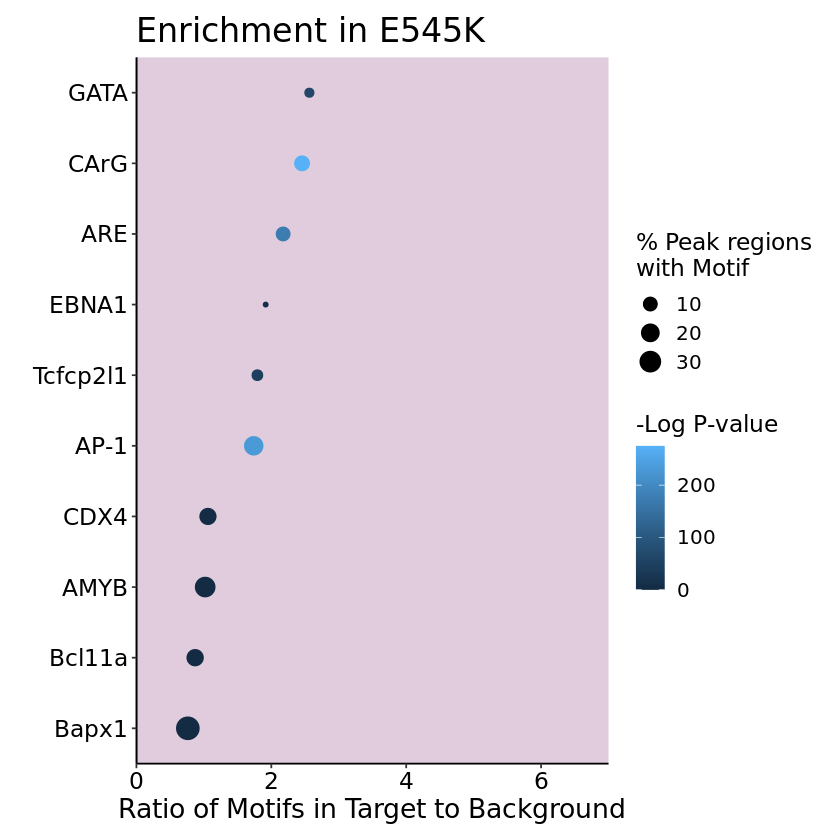

In [71]:
E545K_point <- Ex9_krDiff_reorder_collapsed_top_FC %>% filter(`Motif Name` %in% topTFs) %>%
    ggplot(aes(x=reorder(clean_names, FC), 
       y = FC))+ 
    annotate("rect", xmin = -Inf, ymin = -Inf, 
             ymax = Inf, xmax = Inf,
             fill = "#C29ABB", alpha = 0.5) +
#     annotate("rect", xmin = -Inf, ymin = -Inf, 
#              ymax = 0, xmax = Inf,
#              fill = "#B2D498", alpha = 0.5) +
    geom_point(aes(color=-`Log P-value`, size = `% of Target Sequences with Motif`))+ 
#     scale_y_break(c(-1.5, -2.5)) + 
    geom_hline(yintercept = 0, color = "black") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15))+
    coord_flip(ylim = c(0, 7), xlim = c(0.5,10.5), expand = c(0)) +
    scale_fill_gradient(low = "lightcyan3", #mid = "#F60F66",
                        high = "#00522F") +
    labs(color = "-Log P-value", size = "% Peak regions\nwith Motif") +
    ylab(label = "Ratio of Motifs in Target to Background") + 
    xlab(label = NULL) +
    ggtitle(label = "Enrichment in E545K") +
#     annotate("label", x = 10, y = 1.25, label = "Increased\nEnrichment\nin E545K",
#              size = 4, family = "Arial", color = "black") +
#     annotate("label", x = 7, y = -1.25, label = "Increased\nEnrichment\nin H1047R",
#              size = 4, family = "Arial", color = "black") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 20))
E545K_point

In [72]:
ggsave(filename="/data/park_lab/adam/figures/Homer_E545Kbarp4-5.png", 
       plot = E545K_barp, type = "cairo", width = 8, height = 8)

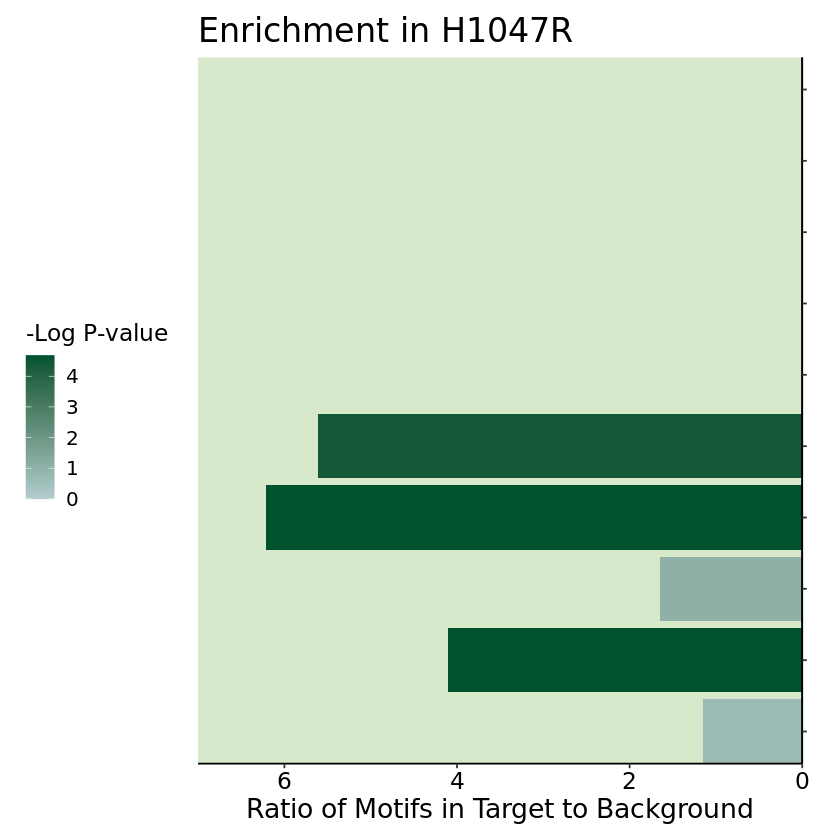

In [73]:
H1047R_barp <- Ex20_krDiff_reorder_collapsed_top_FC %>% filter(`Motif Name` %in% topTFs) %>%
    mutate(clean_names = fct_relevel(clean_names, 
            c(plotorder))) %>% 
    ggplot(aes(x=clean_names, 
       y = FC, fill=-`Log P-value`))+ 
    annotate("rect", xmin = -Inf, ymin = -Inf, 
             ymax = Inf, xmax = Inf,
             fill = "#B2D498", alpha = 0.5) +
#     annotate("rect", xmin = -Inf, ymin = -Inf, 
#              ymax = 0, xmax = Inf,
#              fill = "#C29ABB", alpha = 0.5) +
    geom_bar(stat="identity", position="identity")+ 
#     scale_y_break(c(-1.5, -2.5)) + 
    geom_hline(yintercept = 0, color = "black") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15)) +
    coord_flip(ylim = c(7, 0), expand = c(0)) +
    scale_fill_gradient(low = "lightcyan3", #mid = "#F60F66",
                        high = "#00522F") +
    labs(fill = "-Log P-value") +
    ylab(label = "Ratio of Motifs in Target to Background") + 
    xlab(label = NULL) +
    ggtitle(label = "Enrichment in H1047R") +
#     annotate("label", x = 10, y = 1.25, label = "Increased\nEnrichment\nin E545K",
#              size = 4, family = "Arial", color = "black") +
#     annotate("label", x = 7, y = -1.25, label = "Increased\nEnrichment\nin H1047R",
#              size = 4, family = "Arial", color = "black") +
#     scale_y_discrete() +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                            axis.text.x = element_text(size = 14, color = "black"),
                          axis.text.y = element_blank(),
                            axis.ticks.y.left = element_line(),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          legend.position = "left",
                            plot.background = element_rect(fill='transparent', color=NA),
                          plot.margin = margin(10, 20, 10, 10)) +
    scale_x_discrete(position = "top")
H1047R_barp

In [74]:
Ex20_krDiff_reorder_collapsed_top_FC$`% of Target Sequences with Motif` <- gsub(Ex20_krDiff_reorder_collapsed_top_FC$`% of Target Sequences with Motif`,
                                                                              pattern = "%", replacement = "") %>% as.numeric()

In [75]:
Ex20_krDiff_reorder_collapsed_top_FC

Motif Name                                                          
1  CDX4(Homeobox)/ZebrafishEmbryos-Cdx4.Myc-ChIP-Seq(GSE48254)/Homer   
2  AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer                    
3  Bcl11a(Zf)/HSPC-BCL11A-ChIP-Seq(GSE104676)/Homer                    
4  AMYB(HTH)/Testes-AMYB-ChIP-Seq(GSE44588)/Homer                      
5  Bapx1(Homeobox)/VertebralCol-Bapx1-ChIP-Seq(GSE36672)/Homer         
6  AP-2gamma(AP2)/MCF7-TFAP2C-ChIP-Seq(GSE21234)/Homer                 
7  ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer                           
8  Arnt:Ahr(bHLH)/MCF7-Arnt-ChIP-Seq(Lo_et_al.)/Homer                  
9  BMYB(HTH)/Hela-BMYB-ChIP-Seq(GSE27030)/Homer                        
10 BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer                       
11 Barx1(Homeobox)/Stomach-Barx1.3xFlag-ChIP-Seq(GSE69483)/Homer       
12 Bcl6(Zf)/Liver-Bcl6-ChIP-Seq(GSE31578)/Homer                        
13 Brachyury(T-box)/Mesoendoderm-Brachyury-ChIP-exo(GSE54963)/Homer    
14 CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer                 
15 CEBP:CEBP(bZIP)/MEF-Chop-ChIP-Seq(GSE35681)/Homer                   
16 DMRT1(DM)/Testis-DMRT1-ChIP-Seq(GSE64892)/Homer                     
17 DUX(Homeobox)/C2C12-Dux-ChIP-Seq(GSE87279)/Homer                    
18 EBNA1(EBV-virus)/Raji-EBNA1-ChIP-Seq(GSE30709)/Homer                
19 FOXA1:AR(Forkhead,NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer             
20 Fox:Ebox(Forkhead,bHLH)/Panc1-Foxa2-ChIP-Seq(GSE47459)/Homer        
21 GATA(Zf),IR3/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                   
22 GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                   
23 GATA3(Zf),DR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                  
24 GRHL2(CP2)/HBE-GRHL2-ChIP-Seq(GSE46194)/Homer                       
25 HRE(HSF)/HepG2-HSF1-ChIP-Seq(GSE31477)/Homer                        
26 Hand2(bHLH)/Mesoderm-Hand2-ChIP-Seq(GSE61475)/Homer                 
27 KLF3(Zf)/MEF-Klf3-ChIP-Seq(GSE44748)/Homer                          
28 Mouse_Recombination_Hotspot(Zf)/Testis-DMC1-ChIP-Seq(GSE24438)/Homer
29 NFAT:AP1(RHD,bZIP)/Jurkat-NFATC1-ChIP-Seq(Jolma_et_al.)/Homer       
30 NFIL3(bZIP)/HepG2-NFIL3-ChIP-Seq(Encode)/Homer                      
31 PRDM15(Zf)/ESC-Prdm15-ChIP-Seq(GSE73694)/Homer                      
32 PSE(SNAPc)/K562-mStart-Seq/Homer                                    
33 Pitx1:Ebox(Homeobox,bHLH)/Hindlimb-Pitx1-ChIP-Seq(GSE41591)/Homer   
34 RORa(NR)/Liver-Rora-ChIP-Seq(GSE101115)/Homer                       
35 Tcfcp2l1(CP2)/mES-Tcfcp2l1-ChIP-Seq(GSE11431)/Homer                 
36 Twist(bHLH)/HMLE-TWIST1-ChIP-Seq(Chang_et_al)/Homer                 
37 ZBTB12(Zf)/HEK293-ZBTB12.GFP-ChIP-Seq(GSE58341)/Homer               
38 ZFP3(Zf)/HEK293-ZFP3.GFP-ChIP-Seq(GSE58341)/Homer                   
39 ZNF136(Zf)/HEK293-ZNF136.GFP-ChIP-Seq(GSE58341)/Homer               
40 ZNF16(Zf)/HEK293-ZNF16.GFP-ChIP-Seq(GSE58341)/Homer                 
41 ZNF382(Zf)/HEK293-ZNF382.GFP-ChIP-Seq(GSE58341)/Homer               
42 ZNF41(Zf)/HEK293-ZNF41.GFP-ChIP-Seq(GSE58341)/Homer                 
43 ZNF7(Zf)/HepG2-ZNF7.Flag-ChIP-Seq(Encode)/Homer                     
   Consensus                 P-value Log P-value q-value (Benjamini)
1  NGYCATAAAWCH              0.01    -4.6760     0.1323             
2  VTGACTCATC                0.10    -4.3950     0.1651             
3  TYTGACCASWRG              0.01    -4.6800     0.1323             
4  TGGCAGTTGG                1.00    -1.0480     1.0000             
5  TTRAGTGSYK                1.00    -0.6622     1.0000             
6  SCCTSAGGSCAW              1.00     0.0000     1.0000             
7  RGRACASNSTGTYCYB          1.00     0.0000     1.0000             
8  TBGCACGCAA                1.00     0.0000     1.0000             
9  NHAACBGYYV                1.00     0.0000     1.0000             
10 CNNBRGCGCCCCCTGSTGGC      1.00     0.0000     1.0000             
11 AAACMATTAN                1.00     0.0000     1.0000             
12 NNNC

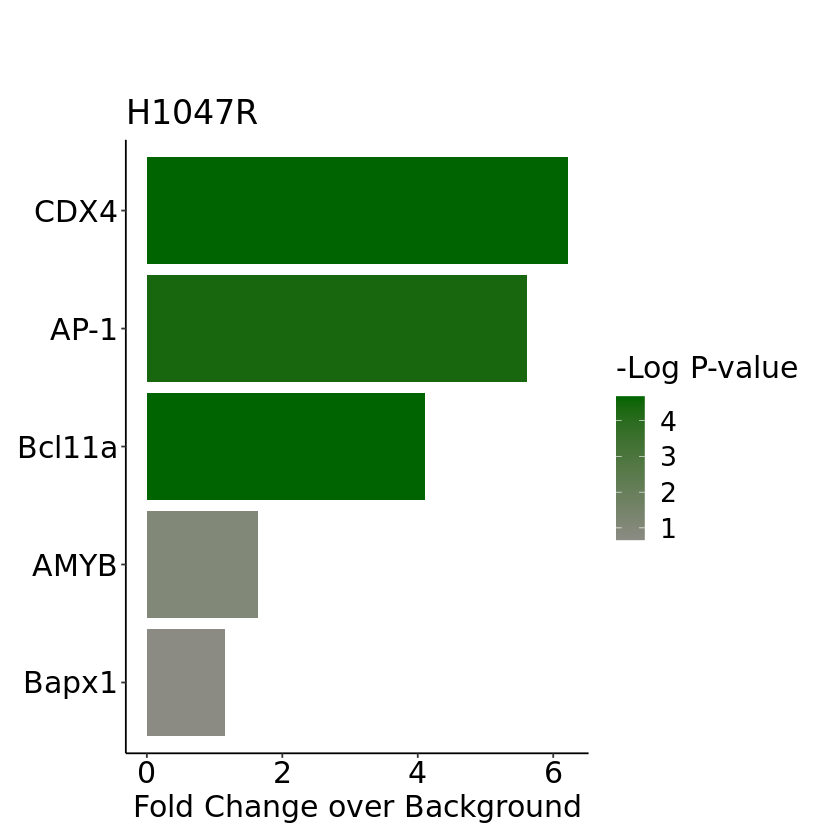

In [104]:
H1047R_cols <- Ex20_krDiff_reorder_collapsed_top_FC %>% filter(FC > 0) %>%
    ggplot(aes(y=reorder(clean_names, FC), 
       x = FC))+ 
    geom_col(aes(fill=-`Log P-value`)) +
#                  size = `% of Target Sequences with Motif`)) + 
    scale_fill_gradient(low = "ivory4", high = "darkgreen") +
    labs(fill = "-Log P-value", size = "% Peak regions\nwith Motif") +
    xlab(label = "Fold Change over Background") + 
    ylab(label = NULL) +
    ggtitle(label = " \n ", subtitle="H1047R") +
#     annotate("label", x = 10, y = 1.25, label = "Increased\nEnrichment\nin E545K",
#              size = 4, family = "Arial", color = "black") +
#     annotate("label", x = 7, y = -1.25, label = "Increased\nEnrichment\nin H1047R",
#              size = 4, family = "Arial", color = "black") +
#     scale_y_discrete() +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 18),
                            axis.text = element_text(size = 18, color = "black"),
                            axis.ticks.y.left = element_line(),
                          plot.title = element_text(size = 22),
                          plot.subtitle = element_text(size = 20),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
                          legend.text = element_text(size = 16),
                          legend.title = element_text(size = 18),
                          legend.position = "right",
                          plot.margin = margin(10, 20, 10, 10))
H1047R_cols

In [77]:
Ex9_krDiff_reorder_collapsed_top_FC

Motif Name                                                          
1  GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                   
2  CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer                 
3  ARE(NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer                           
4  EBNA1(EBV-virus)/Raji-EBNA1-ChIP-Seq(GSE30709)/Homer                
5  Tcfcp2l1(CP2)/mES-Tcfcp2l1-ChIP-Seq(GSE11431)/Homer                 
6  AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer                    
7  GATA(Zf),IR3/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                   
8  ZNF382(Zf)/HEK293-ZNF382.GFP-ChIP-Seq(GSE58341)/Homer               
9  BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer                       
10 GRHL2(CP2)/HBE-GRHL2-ChIP-Seq(GSE46194)/Homer                       
11 Fox:Ebox(Forkhead,bHLH)/Panc1-Foxa2-ChIP-Seq(GSE47459)/Homer        
12 NFAT:AP1(RHD,bZIP)/Jurkat-NFATC1-ChIP-Seq(Jolma_et_al.)/Homer       
13 KLF3(Zf)/MEF-Klf3-ChIP-Seq(GSE44748)/Homer                          
14 NFIL3(bZIP)/HepG2-NFIL3-ChIP-Seq(Encode)/Homer                      
15 GATA3(Zf),DR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                  
16 Pitx1:Ebox(Homeobox,bHLH)/Hindlimb-Pitx1-ChIP-Seq(GSE41591)/Homer   
17 HRE(HSF)/HepG2-HSF1-ChIP-Seq(GSE31477)/Homer                        
18 CDX4(Homeobox)/ZebrafishEmbryos-Cdx4.Myc-ChIP-Seq(GSE48254)/Homer   
19 Twist(bHLH)/HMLE-TWIST1-ChIP-Seq(Chang_et_al)/Homer                 
20 AP-2gamma(AP2)/MCF7-TFAP2C-ChIP-Seq(GSE21234)/Homer                 
21 Bcl6(Zf)/Liver-Bcl6-ChIP-Seq(GSE31578)/Homer                        
22 Arnt:Ahr(bHLH)/MCF7-Arnt-ChIP-Seq(Lo_et_al.)/Homer                  
23 AMYB(HTH)/Testes-AMYB-ChIP-Seq(GSE44588)/Homer                      
24 DMRT1(DM)/Testis-DMRT1-ChIP-Seq(GSE64892)/Homer                     
25 BMYB(HTH)/Hela-BMYB-ChIP-Seq(GSE27030)/Homer                        
26 Hand2(bHLH)/Mesoderm-Hand2-ChIP-Seq(GSE61475)/Homer                 
27 ZNF16(Zf)/HEK293-ZNF16.GFP-ChIP-Seq(GSE58341)/Homer                 
28 ZBTB12(Zf)/HEK293-ZBTB12.GFP-ChIP-Seq(GSE58341)/Homer               
29 PSE(SNAPc)/K562-mStart-Seq/Homer                                    
30 ZNF7(Zf)/HepG2-ZNF7.Flag-ChIP-Seq(Encode)/Homer                     
31 RORa(NR)/Liver-Rora-ChIP-Seq(GSE101115)/Homer                       
32 Brachyury(T-box)/Mesoendoderm-Brachyury-ChIP-exo(GSE54963)/Homer    
33 Barx1(Homeobox)/Stomach-Barx1.3xFlag-ChIP-Seq(GSE69483)/Homer       
34 FOXA1:AR(Forkhead,NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer             
35 Bcl11a(Zf)/HSPC-BCL11A-ChIP-Seq(GSE104676)/Homer                    
36 CEBP:CEBP(bZIP)/MEF-Chop-ChIP-Seq(GSE35681)/Homer                   
37 PRDM15(Zf)/ESC-Prdm15-ChIP-Seq(GSE73694)/Homer                      
38 ZNF136(Zf)/HEK293-ZNF136.GFP-ChIP-Seq(GSE58341)/Homer               
39 Bapx1(Homeobox)/VertebralCol-Bapx1-ChIP-Seq(GSE36672)/Homer         
40 Mouse_Recombination_Hotspot(Zf)/Testis-DMC1-ChIP-Seq(GSE24438)/Homer
41 ZNF41(Zf)/HEK293-ZNF41.GFP-ChIP-Seq(GSE58341)/Homer                 
42 DUX(Homeobox)/C2C12-Dux-ChIP-Seq(GSE87279)/Homer                    
43 ZFP3(Zf)/HEK293-ZFP3.GFP-ChIP-Seq(GSE58341)/Homer                   
   Consensus                 P-value Log P-value q-value (Benjamini)
1  NAGATWNBNATCTNN            1e-26  -6.108e+01  0.0000             
2  CCATATATGGNM              1e-119  -2.747e+02  0.0000             
3  RGRACASNSTGTYCYB           1e-75  -1.727e+02  0.0000             
4  GGYAGCAYDTGCTDCCCNNN       1e-03  -7.362e+00  0.0020             
5  NRAACCRGTTYRAACCRGYT       1e-20  -4.636e+01  0.0000             
6  VTGACTCATC                1e-100  -2.311e+02  0.0000             
7  NNNNNBAGATAWYATCTVHN       1e-15  -3.651e+01  0.0000             
8  GNCTGTASTRNTGBCTCHTT       1e-02  -6.402e+00  0.0049             
9  CNNBRGCGCCCCCTGSTGGC       1e-14  -3.256e+01  0.0000             
10 AAACYKGTTWDACMRGTTTB       1e-24  -5.536e+01  0.0000             
11 NNNVCTGWGYAAACASN          1e-37  -8.702e+01  0.0000             
12 SART

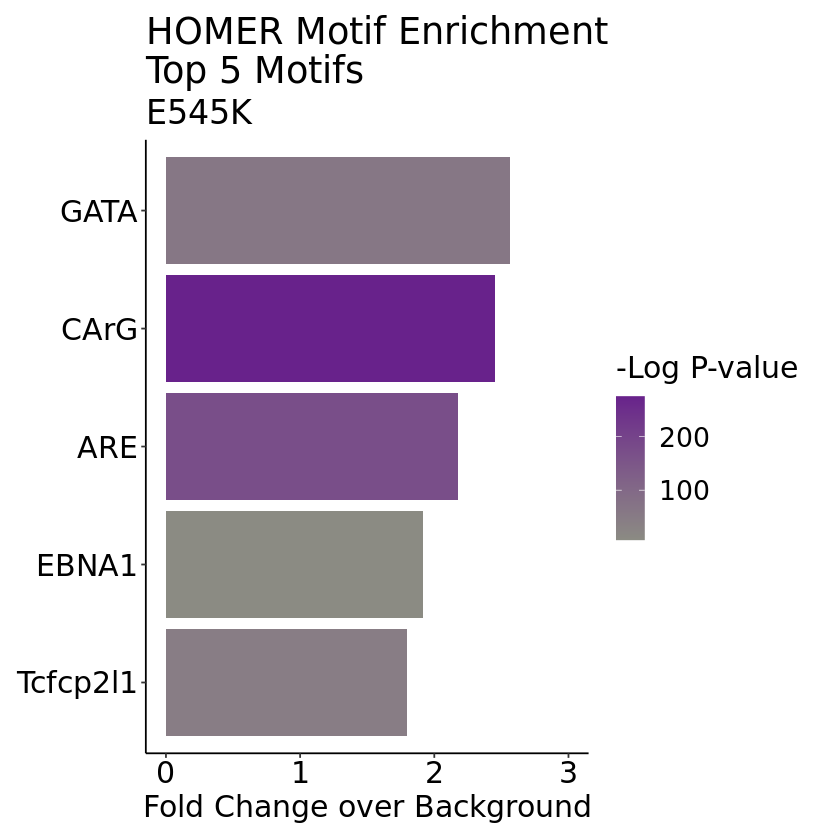

In [105]:
E545K_cols <- Ex9_krDiff_reorder_collapsed_top_FC %>% filter(FC > 0) %>% head(5) %>%
    ggplot(aes(y=reorder(clean_names, FC), 
       x = FC))+ 
    geom_col(aes(fill=-`Log P-value`)) +
#                  size = `% of Target Sequences with Motif`)) + 
    scale_fill_gradient(low = "ivory4", high = "darkorchid4") +
    labs(fill = "-Log P-value", size = "% Peak regions\nwith Motif") +
    xlab(label = "Fold Change over Background") + 
    ylab(label = NULL) +
    ggtitle(label = "HOMER Motif Enrichment\nTop 5 Motifs", subtitle = "E545K") +
#     annotate("label", x = 10, y = 1.25, label = "Increased\nEnrichment\nin E545K",
#              size = 4, family = "Arial", color = "black") +
#     annotate("label", x = 7, y = -1.25, label = "Increased\nEnrichment\nin H1047R",
#              size = 4, family = "Arial", color = "black") +
    scale_x_continuous(limits = c(0,3)) +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 18),
                            axis.text = element_text(size = 18, color = "black"),
                            axis.ticks.y.left = element_line(),
                          plot.title = element_text(size = 22),
                          plot.subtitle = element_text(size = 20),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
                          legend.text = element_text(size = 16),
                          legend.title = element_text(size = 18),
                          legend.position = "right",
                          plot.margin = margin(10, 20, 10, 10))
E545K_cols

In [120]:
ggsave(filename="/data/park_lab/adam/figures/Homer_H1047Rbarp4-5.png", 
       plot = H1047R_barp, type = "cairo", width = 8, height = 8)

In [182]:
ggsave(filename="/data/park_lab/adam/figures/Homer_E545Kpoint5-16.pdf", 
       plot = E545K_point, device = cairo_pdf, width = 8, height = 8)
ggsave(filename="/data/park_lab/adam/figures/Homer_H1047Rpoint5-16.pdf", 
       plot = H1047R_point, device = cairo_pdf, width = 8, height = 8)

In [86]:
ggsave(filename="/data/park_lab/adam/figures/Homer_E545Kcols5-17.pdf", 
       plot = E545K_cols, device = cairo_pdf, width = 8, height = 8)
ggsave(filename="/data/park_lab/adam/figures/Homer_H1047Rcols5-17.pdf", 
       plot = H1047R_cols, device = cairo_pdf, width = 8, height = 8)

In [107]:
library(ggpubr)
library(tidyverse)
library(extrafont)

In [108]:
extrafont::loadfonts()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

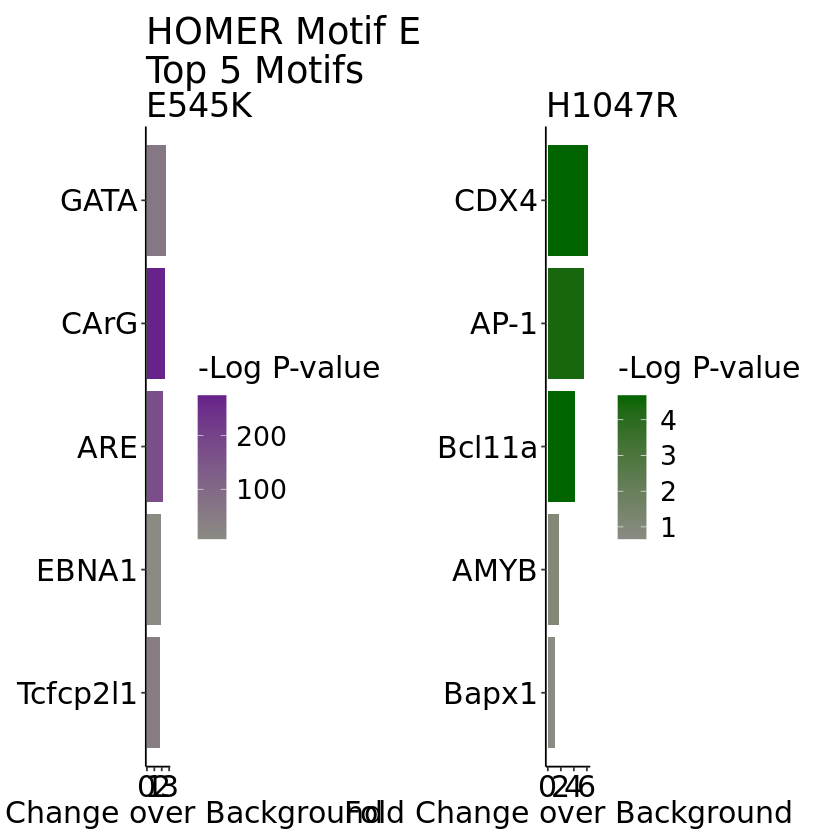

In [109]:
HOMER_colplots <- ggarrange(E545K_cols, H1047R_cols, ncol = 2, nrow = 1,
                            widths = c(8, 8), heights=c(8))
HOMER_colplots

In [110]:
ggsave(filename = "/data/park_lab/adam/figures/HOMERbarcomb5-17.pdf",
       plot = HOMER_colplots, device = cairo_pdf, width = 16, height = 8)

In [122]:
pdf(file = "/data/park_lab/adam/figures/HOMER_ATACMotifs3C.pdf", height = 10, width = 8)
p
dev.off()

png 
  2

In [123]:
#combine dfs first
Total_krDiff_OR <- rbind(Ex9_krDiff_OR, Ex20_krDiff_OR)
str(Total_krDiff_OR)

'data.frame':	856 obs. of  10 variables:
 $ Motif Name                          : chr  "TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer" "TEAD1(TEAD)/HepG2-TEAD1-ChIP-Seq(Encode)/Homer" "TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer" "TEAD4(TEA)/Tropoblast-Tead4-ChIP-Seq(GSE37350)/Homer" ...
 $ Consensus                           : chr  "TRCATTCCAG" "CYRCATTCCA" "YCWGGAATGY" "CCWGGAATGY" ...
 $ P-value                             : num  1e-151 1e-148 1e-145 1e-145 1e-140 ...
 $ Log P-value                         : num  -349 -341 -336 -334 -323 ...
 $ q-value (Benjamini)                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ % of Target Sequences with Motif    : chr  "34.59%" "30.65%" "23.47%" "28.43%" ...
 $ % of Background Sequences with Motif: chr  "20.75%" "17.64%" "12.12%" "15.98%" ...
 $ clean_names                         : chr  "TEAD3" "TEAD1" "TEAD" "TEAD4" ...
 $ OddsRatio                           : num  1.67 1.74 1.94 1.78 2.1 ...
 $ Genotype                            : c

In [124]:
#collapse by similarity
consensusdf_Total <- as.data.frame(Total_krDiff_OR$Consensus)
consensusdf_Total[1,2] = 0.0
vec_len <- length(Total_krDiff_OR$Consensus)
  for(i in 2:vec_len){
    consensusdf_Total[i,2]=max(sapply(as.list(Total_krDiff_OR$Consensus[1:(i-1)]), 
                             function(x) levenshteinSim(x, Total_krDiff_OR$Consensus[i])))
  }
names(consensusdf_Total) <- c("Consensus", "LevenSim")
consensusdf_Total

Consensus                 LevenSim 
1   TRCATTCCAG                0.0000000
2   CYRCATTCCA                0.7000000
3   YCWGGAATGY                0.2000000
4   CCWGGAATGY                0.9000000
5   NNATGASTCATH              0.2500000
6   DATGASTCATHN              0.7500000
7   CCATATATGGNM              0.4166667
8   GGATGACTCATC              0.6666667
9   RATGASTCAT                0.7500000
10  DATGASTCAT                0.9000000
11  VTGACTCATC                0.7500000
12  NATGASTCABNN              0.7500000
13  NRGVACABNVTGTYCY          0.3125000
14  AAGAACATWHTGTTC           0.5000000
15  VAGRACAKWCTGTYC           0.6666667
16  CCWGGAATGY                1.0000000
17  RGRACASNSTGTYCYB          0.6875000
18  TGCTGAGTCA                0.5833333
19  GATGASTCATCN              0.8333333
20  ANCAGGAAGT                0.5000000
21  ACVAGGAAGT                0.8000000
22  SAAACCACAG                0.4000000
23  NWAACCACADNN              0.5833333
24  WNTGTTTRYTTTGGCA          0.3750000
25  BSNTGTTTACWYWGN           0.3750000
26  GCTGTGGTTW                0.5000000
27  AWWNTGCTGAGTCAT           0.6666667
28  NNAYTTCCTGHN              0.4166667
29  TRTTTACTTW                0.5000000
30  AVCAGGAAGT                0.9000000
⋮   ⋮                         ⋮        
827 CAAGATGGCGGC              1        
828 NGNTCTAGAACCNGV           1        
829 AACATCTGGA                1        
830 GGVTCTCGCGAGAAC           1        
831 GNMCAGGTGTGC              1        
832 CCCCTCCCCCAC              1        
833 GGGTTTTGAAGGATGARTAGGAGTT 1        
834 NANTGCSGCA                1        
835 GGGGCTYGKCTGGGA           1        
836 GGCCYCCTGCTGDGH           1        
837 CCTGCTGAGH                1        
838 GCACAYAGTAGGKCY           1        
839 YTKGATAHAGTATTCTWGGTNGGCA 1        
840 AAGGKGRCGCAGGCA           1        
841 MACCTTCYATGGCTCCCTAKTGCCY 1        
842 TGGAACAGMA                1        
843 RGGGCACTAACY              1        
844 GTCWGCTGTYYCTCT           1        
845 GGAACAGCCG                1        
846 GNCTGTASTRNTGBCTCHTT      1        
847 CCTCATGGTGYCYTWYTCCCTTGTG 1        
848 GAGSCCGAGC                1        
849 AGAAATGACTTCCCT           1        
850 TTAACCCTTTVNKKN           1        
851 GARTGGTCATCGCCC           1        
852 ARGAGGMCAAAATGW           1        
853 GTGGGCCCCA                1        
854 RHHCAGAGAGGB              1        
855 CTGCCWVCTTTTRTA           1        
856 SMCAGTCWGAKGGAGGAGGC      1

In [125]:
consensusdf_Total_filt <- consensusdf_Total %>%
                        dplyr::filter(LevenSim < 0.5)

In [126]:
Total_krDiff_OR_collapsed <- Total_krDiff_OR %>%
                           dplyr::filter(Consensus %in% consensusdf_Total_filt$Consensus)

In [127]:
Total_krDiff_OR_collapsed

Motif Name                                                       
1  TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer                    
2  TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer            
3  Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer                   
4  CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer              
5  GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer                     
6  RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer                   
7  NF1:FOXA1(CTF,Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)/Homer     
8  Foxa3(Forkhead)/Liver-Foxa3-ChIP-Seq(GSE77670)/Homer             
9  Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer                       
10 Fox:Ebox(Forkhead,bHLH)/Panc1-Foxa2-ChIP-Seq(GSE47459)/Homer     
11 FOXA1(Forkhead)/MCF7-FOXA1-ChIP-Seq(GSE26831)/Homer              
12 Zfp281(Zf)/ES-Zfp281-ChIP-Seq(GSE81042)/Homer                    
13 GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                
14 FOXA1(Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)/Homer             
15 GRHL2(CP2)/HBE-GRHL2-ChIP-Seq(GSE46194)/Homer                    
16 p53(p53)/Saos-p53-ChIP-Seq(GSE15780)/Homer                       
17 p53(p53)/Saos-p53-ChIP-Seq/Homer                                 
18 Tcfcp2l1(CP2)/mES-Tcfcp2l1-ChIP-Seq(GSE11431)/Homer              
19 GATA(Zf),IR3/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                
20 NFY(CCAAT)/Promoter/Homer                                        
21 Sp5(Zf)/mES-Sp5.Flag-ChIP-Seq(GSE72989)/Homer                    
22 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer                  
23 BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer                    
24 CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer                 
25 NFIL3(bZIP)/HepG2-NFIL3-ChIP-Seq(Encode)/Homer                   
26 GFY-Staf(?,Zf)/Promoter/Homer                                    
27 NFAT:AP1(RHD,bZIP)/Jurkat-NFATC1-ChIP-Seq(Jolma_et_al.)/Homer    
28 EBNA1(EBV-virus)/Raji-EBNA1-ChIP-Seq(GSE30709)/Homer             
29 ZNF382(Zf)/HEK293-ZNF382.GFP-ChIP-Seq(GSE58341)/Homer            
30 Pitx1:Ebox(Homeobox,bHLH)/Hindlimb-Pitx1-ChIP-Seq(GSE41591)/Homer
⋮  ⋮                                                                
63 GATA(Zf),IR3/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                
64 GATA(Zf),IR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer                
65 GFY-Staf(?,Zf)/Promoter/Homer                                    
66 GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer                     
67 GRHL2(CP2)/HBE-GRHL2-ChIP-Seq(GSE46194)/Homer                    
68 Hand2(bHLH)/Mesoderm-Hand2-ChIP-Seq(GSE61475)/Homer              
69 NF1:FOXA1(CTF,Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)/Homer     
70 NFAT:AP1(RHD,bZIP)/Jurkat-NFATC1-ChIP-Seq(Jolma_et_al.)/Homer    
71 NFIL3(bZIP)/HepG2-NFIL3-ChIP-Seq(Encode)/Homer                   
72 NFY(CCAAT)/Promoter/Homer                                        
73 Otx2(Homeobox)/EpiLC-Otx2-ChIP-Seq(GSE56098)/Homer               
74 p53(p53)/Saos-p53-ChIP-Seq(GSE15780)/Homer                       
75 p53(p53)/Saos-p53-ChIP-Seq/Homer                                 
76 Pitx1:Ebox(Homeobox,bHLH)/Hindlimb-Pitx1-ChIP-Seq(GSE41591)/Homer
77 PRDM15(Zf)/ESC-Prdm15-ChIP-Seq(GSE73694)/Homer                   
78 PSE(SNAPc)/K562-mStart-Seq/Homer                                 
79 Sp5(Zf)/mES-Sp5.Flag-ChIP-Seq(GSE72989)/Homer                    
80 CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer              
81 Tcfcp2l1(CP2)/mES-Tcfcp2l1-ChIP-Seq(GSE11431)/Homer              
82 TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer                    
83 TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer            
84 Twist(bHLH)/HMLE-TWIST1-ChIP-Seq(Chang_et_al)/Homer              
85 ZBTB12(Zf)/HEK293-ZBTB12.GFP-ChIP-Seq(GSE58341)/Homer            
86 Zfp281(Zf)/ES-Zfp281-ChIP-Seq(GSE81042)/Homer                    
87 ZFP3(Zf)/HEK293-ZFP3.GFP-ChIP-Seq(GSE58341)/Homer                
88 ZNF136(Zf)/HEK293-ZNF136.GFP-ChIP-Seq(GSE58341)/Homer            
8

In [128]:
 Total_krDiff_OR_collapsed %>%
                dplyr::filter(Genotype == "E545K") %>%
                dplyr::arrange(`Log P-value`) %>%
                head() #%>% 
                #dplyr::pull(clean_names)

Motif Name                                            Consensus       
1 TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer         TRCATTCCAG      
2 TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer YCWGGAATGY      
3 Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer        NNATGASTCATH    
4 CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer   CCATATATGGNM    
5 GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer          NRGVACABNVTGTYCY
6 RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer        SAAACCACAG      
  P-value Log P-value q-value (Benjamini) % of Target Sequences with Motif
1 1e-151  -348.6      0                   34.59%                          
2 1e-145  -335.5      0                   23.47%                          
3 1e-140  -322.7      0                   19.10%                          
4 1e-119  -274.7      0                   12.23%                          
5  1e-96  -221.5      0                   6.94%                           
6  1e-60  -138.9      0                   20.24%                          
  % of Background Sequences with Motif clean_names OddsRatio Genotype
1 20.75%                               TEAD3       1.666988  E545K   
2 12.12%                               TEAD        1.936469  E545K   
3 9.10%                                Fra1        2.098901  E545K   
4 4.98%                                CArG        2.455823  E545K   
5 2.25%                                GRE         3.084444  E545K   
6 13.03%                               RUNX        1.553338  E545K

In [129]:
 Total_krDiff_OR_collapsed %>%
                dplyr::filter(Genotype == "H1047R") %>%
                dplyr::arrange(`Log P-value`) %>%
                head() #%>% 
                #dplyr::pull(clean_names)

Motif Name                                              Consensus           
1 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer         RGGTCADNNAGAGGTCAV  
2 RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer          SAAACCACAG          
3 Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer          NNATGASTCATH        
4 Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer              NNAYTTCCTGHN        
5 FOXA1:AR(Forkhead,NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer AGTAAACAAAAAAGAACAND
6 BMYB(HTH)/Hela-BMYB-ChIP-Seq(GSE27030)/Homer            NHAACBGYYV          
  P-value Log P-value q-value (Benjamini) % of Target Sequences with Motif
1 1e-07   -17.550     0.0000              57.14%                          
2 1e-02    -6.669     0.0320              57.14%                          
3 1e-02    -5.401     0.0804              42.86%                          
4 1e-01    -2.825     0.4378              42.86%                          
5 1e+00     0.000     1.0000              0.00%                           
6 1e+00     0.000     1.0000              0.00%                           
  % of Background Sequences with Motif clean_names OddsRatio  Genotype
1 0.51%                                RAR:RXR     112.039216 H1047R  
2 8.16%                                RUNX          7.002451 H1047R  
3 5.33%                                Fra1          8.041276 H1047R  
4 13.76%                               Etv2          3.114826 H1047R  
5 0.60%                                FOXA1:AR      0.000000 H1047R  
6 16.19%                               BMYB          0.000000 H1047R

In [130]:
topTFs_total <- c(
                Total_krDiff_OR_collapsed %>%
                dplyr::filter(Genotype == "E545K") %>%
                dplyr::arrange(`Log P-value`) %>%
                head(n = 10) %>% 
                dplyr::pull(clean_names), 
                Total_krDiff_OR_collapsed %>%
                dplyr::filter(Genotype == "H1047R") %>%
                dplyr::arrange(`Log P-value`) %>%
                head(n = 10) %>% 
                dplyr::pull(clean_names))
str(topTFs_total)

 chr [1:20] "TEAD3" "TEAD" "Fra1" "CArG" "GRE" "RUNX" "NF1:FOXA1" "Foxa3" ...


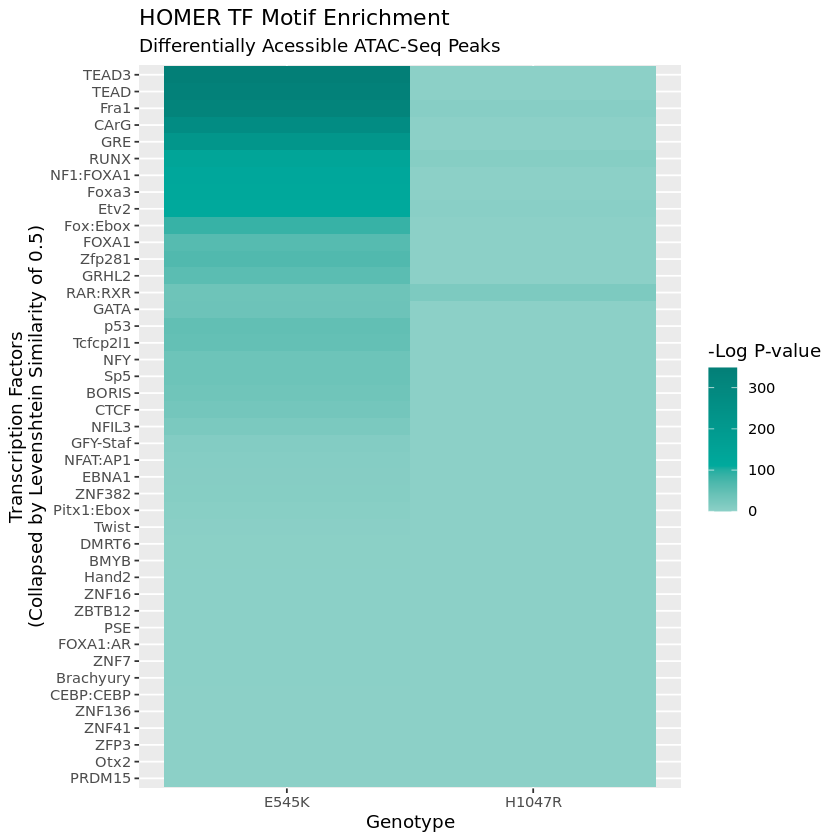

In [131]:
p <- Total_krDiff_OR_collapsed %>% #dplyr::filter(clean_names %in% topTFs_total) %>%
     ggplot(aes(x = Genotype, y=reorder(clean_names, -`Log P-value`))) + 
     geom_tile(aes(fill = -`Log P-value`)) +
     ggtitle("HOMER TF Motif Enrichment", "Differentially Acessible ATAC-Seq Peaks") + 
     ylab(label = "Transcription Factors\n(Collapsed by Levenshtein Similarity of 0.5)") + 
     labs(fill = "-Log P-value") +
     scale_fill_gradient2(low = "#EEFCFA", mid = "#00AA9D", high = "#037F77", 
                          midpoint = 110)
p

In [132]:
Total_krDiff_OR_collapsed %>% dplyr::filter(clean_names %in% topTFs_total) %>%
                          dplyr::arrange(clean_names)

Motif Name                                                      
1  BMYB(HTH)/Hela-BMYB-ChIP-Seq(GSE27030)/Homer                    
2  BMYB(HTH)/Hela-BMYB-ChIP-Seq(GSE27030)/Homer                    
3  BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer                   
4  BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer                   
5  Brachyury(T-box)/Mesoendoderm-Brachyury-ChIP-exo(GSE54963)/Homer
6  Brachyury(T-box)/Mesoendoderm-Brachyury-ChIP-exo(GSE54963)/Homer
7  CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer             
8  CArG(MADS)/PUER-Srf-ChIP-Seq(Sullivan_et_al.)/Homer             
9  CEBP:CEBP(bZIP)/MEF-Chop-ChIP-Seq(GSE35681)/Homer               
10 CEBP:CEBP(bZIP)/MEF-Chop-ChIP-Seq(GSE35681)/Homer               
11 CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer                
12 CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer                
13 Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer                      
14 Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer                      
15 FOXA1:AR(Forkhead,NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer         
16 FOXA1:AR(Forkhead,NR)/LNCAP-AR-ChIP-Seq(GSE27824)/Homer         
17 Fox:Ebox(Forkhead,bHLH)/Panc1-Foxa2-ChIP-Seq(GSE47459)/Homer    
18 Fox:Ebox(Forkhead,bHLH)/Panc1-Foxa2-ChIP-Seq(GSE47459)/Homer    
19 Foxa3(Forkhead)/Liver-Foxa3-ChIP-Seq(GSE77670)/Homer            
20 Foxa3(Forkhead)/Liver-Foxa3-ChIP-Seq(GSE77670)/Homer            
21 Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer                  
22 Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer                  
23 GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer                    
24 GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer                    
25 NF1:FOXA1(CTF,Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)/Homer    
26 NF1:FOXA1(CTF,Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)/Homer    
27 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer                 
28 RAR:RXR(NR),DR5/ES-RAR-ChIP-Seq(GSE56893)/Homer                 
29 RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer                  
30 RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer                  
31 TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer           
32 TEAD(TEA)/Fibroblast-PU.1-ChIP-Seq(Unpublished)/Homer           
33 TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer                   
34 TEAD3(TEA)/HepG2-TEAD3-ChIP-Seq(Encode)/Homer                   
   Consensus             P-value Log P-value q-value (Benjamini)
1  NHAACBGYYV             1e+00    -1.06000  0.6563             
2  NHAACBGYYV             1e+00     0.00000  1.0000             
3  CNNBRGCGCCCCCTGSTGGC   1e-14   -32.56000  0.0000             
4  CNNBRGCGCCCCCTGSTGGC   1e+00     0.00000  1.0000             
5  ANTTMRCASBNNNGTGYKAAN  1e+00    -0.22690  1.0000             
6  ANTTMRCASBNNNGTGYKAAN  1e+00     0.00000  1.0000             
7  CCATATATGGNM          1e-119  -274.70000  0.0000             
8  CCATATATGGNM           1e+00     0.00000  1.0000             
9  NTNATGCAAYMNNHTGMAAY   1e+00    -0.02318  1.0000             
10 NTNATGCAAYMNNHTGMAAY   1e+00     0.00000  1.0000             
11 AYAGTGCCMYCTRGTGGCCA   1e-12   -28.65000  0.0000             
12 AYAGTGCCMYCTRGTGGCCA   1e+00     0.00000  1.0000             
13 NNAYTTCCTGHN           1e-49  -113.50000  0.0000             
14 NNAYTTCCTGHN           1e-01    -2.82500  0.4378             
15 AGTAAACAAAAAAGAACAND   1e+00    -0.28090  1.0000             
16 AGTAAACAAAAAAGAACAND   1e+00     0.00000  1.0000             
17 NNNVCTGWGYAAACASN      1e-37   -87.02000  0.0000             
18 NNNVCTGWGYAAACASN      1e+00     0.00000  1.0000             
19 BSNTGTTTACWYWGN        1e-53  -123.50000  0.0000             
20 BSNTGTTTACWYWGN        1e+00     0.00000  1.0000             
21 NNATGASTCATH          1e-140  -322.70000  0.0000             
22 NNATGASTCATH           1e-02    -5.40100  0.0804             
23 NRGVACABNVTGTYCY       1e-96  -221.50000  0.0000             
24 NRGVACABNVTGTYCY       1e+00     0.00000  1.0000            

In [133]:
TF_matrix <- data.frame(
             Total_krDiff_OR_collapsed %>% #dplyr::filter(clean_names %in% topTFs_total) %>%
             dplyr::arrange(clean_names) %>% dplyr::filter(Genotype == "E545K") %>% 
             dplyr::pull(`Log P-value`),
             Total_krDiff_OR_collapsed %>% #dplyr::filter(clean_names %in% topTFs_total) %>%
             dplyr::arrange(clean_names) %>% dplyr::filter(Genotype == "H1047R") %>% 
             dplyr::pull(`Log P-value`)) %>%
             as.matrix()*-1
colnames(TF_matrix) <- c("E545K", "H1047R")
#rownames(TF_matrix) <- Total_krDiff_OR_collapsed %>% dplyr::filter(clean_names %in% topTFs_total) %>%
#                       dplyr::arrange(clean_names) %>% dplyr::pull(clean_names) %>% unique()
TF_matrix

E545K     H1047R
 [1,] 1.060e+00  0.000
 [2,] 3.256e+01  0.000
 [3,] 2.269e-01  0.000
 [4,] 2.747e+02  0.000
 [5,] 2.318e-02  0.000
 [6,] 2.865e+01  0.000
 [7,] 1.207e+00  0.000
 [8,] 7.362e+00  0.000
 [9,] 1.135e+02  2.825
[10,] 7.557e+01  0.000
[11,] 6.037e+01  0.000
[12,] 2.809e-01  0.000
[13,] 8.702e+01  0.000
[14,] 1.235e+02  0.000
[15,] 3.227e+02  5.401
[16,] 6.108e+01  0.000
[17,] 3.651e+01  0.000
[18,] 1.106e+01  0.000
[19,] 2.215e+02  0.000
[20,] 5.536e+01  0.000
[21,] 7.298e-01  0.000
[22,] 1.250e+02  0.000
[23,] 7.908e+00  0.000
[24,] 2.043e+01  0.000
[25,] 3.632e+01  0.000
[26,] 2.000e-06  0.000
[27,] 0.000e+00  0.000
[28,] 3.259e-01  0.000
[29,] 4.083e+00  0.000
[30,] 3.475e+01 17.550
[31,] 1.389e+02  6.669
[32,] 3.587e+01  0.000
[33,] 3.355e+02  0.000
[34,] 3.486e+02  0.000
[35,] 4.636e+01  0.000
[36,] 1.548e+00  0.000
[37,] 4.371e-01  0.000
[38,] 3.766e-03  0.000
[39,] 5.373e-03  0.000
[40,] 6.750e-01  0.000
[41,] 6.402e+00  0.000
[42,] 5.105e-03  0.000
[43,] 2.667e-01  0.000
[44,] 6.568e+01  0.000
[45,] 4.865e+01  0.000
[46,] 4.865e+01  0.000

### pheatmap

In [134]:
library(pheatmap)

In [135]:
pheatmap(TF_matrix, scale = "row")

ERROR: Error in hclust(d, method = method): NA/NaN/Inf in foreign function call (arg 10)


In [ ]:
save.image(file = "thisaintover.RData")

# TOBIAS Results

In [ ]:
Tobi_bindetectDiff_res <- read_tsv(file = "/data/park_lab/adam/ATAC/tobi2/comparative_motifs_MCF10A__E545KvH1047R/bindetect_results.txt") %>%
                          as.data.frame()
str(Tobi_bindetectDiff_res)

In [ ]:
Tobi_bindetectDiff_dist <- read_tsv(file = "/data/park_lab/adam/ATAC/tobi2/comparative_motifs_MCF10A__E545KvH1047R/bindetect_distances.txt") %>%
                          as.data.frame()
str(Tobi_bindetectDiff_dist)

In [ ]:
library(ggrepel)

In [ ]:
points2Label <- Tobi_bindetectDiff_res %>%
                dplyr::filter(MCF10A__E545K_enr_MCF10A__H1047R_enr_change > 0.5 | MCF10A__E545K_enr_MCF10A__H1047R_enr_change < -0.15,
                              -log(MCF10A__E545K_enr_MCF10A__H1047R_enr_pvalue) > 100)
points2Label

In [ ]:
Tobi_volcano <- Tobi_bindetectDiff_res %>%
                ggplot(aes(x = MCF10A__E545K_enr_MCF10A__H1047R_enr_change, 
                           y = -log(MCF10A__E545K_enr_MCF10A__H1047R_enr_pvalue),
                           label = name)) +
                xlim(-0.6, 0.6) +
                annotate("rect", xmin = 0, xmax = Inf, 
                         ymin = -Inf, ymax = Inf, 
                         fill = "#A30E0A", alpha = 0.5) +
                annotate("rect", xmax = 0, xmin = -Inf, 
                         ymin = -Inf, ymax = Inf, 
                         fill = "#54B8CD", alpha = 0.5) +
                annotate("label", x = .4, y = 25, label = "Increased Footprinting\nin E545K") +
                annotate("label", x = -0.4, y = 25, label = "Increased Footprinting\nin H1047R") +
                geom_point() + ylab(label = "-Log p-Value") + 
                geom_label_repel(data = points2Label, colour = "black", max.overlaps = 20) +
                xlab(label = "Differential in Binding Score") +
                ggtitle(label = "Comparative TOBIAS TF Footprinting Results")
                
Tobi_volcano

In [ ]:
pdf(file = "TOBIAS_Volcano3D.pdf", height = 8, width = 8)
Tobi_volcano
dev.off()

# ATAC Peaks Euler

In [23]:
library(tidyverse)
library(GenomicRanges)
library(ChIPpeakAnno)

In [16]:
setwd("/data/park_lab/adam/files4deepTools/")
list.files()

[1] "ATAC_diffheatmap.png"            "ATAC_enrRegionsprofile.pdf"     
 [3] "ATAC_enrRegionsprofile5-16.pdf"  "ATAC_genesprofile.pdf"          
 [5] "ATAC_heatmap.png"                "ATAC_sigdiffheatmap3A.pdf"      
 [7] "ATAC_sigdiffheatmap3A.png"       "ATAC_sigdiffprofile.pdf"        
 [9] "MCF10A_allCalledPeaks.bed"       "MCF10A_diffCalledPeaks.bed"     
[11] "MCF10A_diffMatrix.gz"            "MCF10A_E545K_BPM.bw"            
[13] "MCF10A_E545K_enr_WTvE545K.bed"   "MCF10A_E545K_LG.narrowPeak"     
[15] "MCF10A_E545KvH1047R.bed"         "MCF10A_enrRegionsMatrix.gz"     
[17] "MCF10A_genesMatrix.gz"           "MCF10A_H1047R_BPM.bw"           
[19] "MCF10A_H1047R_enr_WTvH1047R.bed" "MCF10A_H1047R_LG.narrowPeak"    
[21] "MCF10A_Matrix.gz"                "MCF10A_rawdiffMatrix.txt"       
[23] "MCF10A_rawMatrix.txt"            "MCF10A_sigdiffMatrix.gz"        
[25] "MCF10A_sigDiffMatrix.txt"        "MCF10A_sigDiffPeaks.bed"        
[27] "MCF10A_WT_BPM.bw"                "MCF10A_WT_LG.narrowPeak"

In [41]:
#read bed files to granges
E545K_enrPeaks <- read_tsv(file = "MCF10A_E545K_enr_WTvE545K.bed") %>% as.data.frame() %>%
    dplyr::select(c(1:3))
E545K_enrPeaks <- rbind(names(E545K_enrPeaks), E545K_enrPeaks)
names(E545K_enrPeaks) <- c("chr", "start", "end")
E545K_enrPeaksGr <- GRanges(seqnames = E545K_enrPeaks$chr,
            ranges = IRanges(start = as.numeric(E545K_enrPeaks$start),
                             end = as.numeric(E545K_enrPeaks$end)
                                ))
E545K_enrPeaksGr

Rows: 14937 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr1
dbl (8): 3541615, 3541791, 6.4661194264354105, -1.5896517706763067, 0.615295...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


GRanges object with 14938 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1   3541615-3541791      *
      [2]     chr1   9384888-9385163      *
      [3]     chr1 12447254-12447716      *
      [4]     chr1 12447864-12448213      *
      [5]     chr1 12449245-12449481      *
      ...      ...               ...    ...
  [14934]    chr22 46107841-46108673      *
  [14935]    chr22 46742686-46743230      *
  [14936]    chr22 49857650-49857875      *
  [14937]    chr22 49944200-49945343      *
  [14938]    chr22 49966802-49968143      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [42]:
H1047R_enrPeaks <- read_tsv(file = "MCF10A_H1047R_enr_WTvH1047R.bed") %>% as.data.frame() %>%
    dplyr::select(c(1:3))
H1047R_enrPeaks <- rbind(names(H1047R_enrPeaks), H1047R_enrPeaks)
names(H1047R_enrPeaks) <- c("chr", "start", "end")
H1047R_enrPeaksGr <- GRanges(seqnames = H1047R_enrPeaks$chr,
            ranges = IRanges(start = as.numeric(H1047R_enrPeaks$start),
                             end = as.numeric(H1047R_enrPeaks$end)
                                ))
H1047R_enrPeaksGr

Rows: 19781 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr1
dbl (8): 7455419, 7455913, 17.62034790339657, -2.018753270809389, 0.38518883...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


GRanges object with 19782 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1   7455419-7455913      *
      [2]     chr1   9163680-9163911      *
      [3]     chr1   9384888-9385163      *
      [4]     chr1 10726435-10726766      *
      [5]     chr1 10831084-10831340      *
      ...      ...               ...    ...
  [19778]    chr22 46375150-46375528      *
  [19779]    chr22 46530711-46530958      *
  [19780]    chr22 46742686-46743230      *
  [19781]    chr22 49946669-49946848      *
  [19782]    chr22 50544231-50544497      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [37]:
WTPeaks <- read_tsv(file = "MCF10A_WT_LG.narrowPeak") %>% as.data.frame() %>%
    dplyr::select(c(1:3))
WTPeaks <- rbind(names(WTPeaks), WTPeaks)
names(WTPeaks) <- c("chr", "start", "end")
WTPeaksGr <- GRanges(seqnames = WTPeaks$chr,
            ranges = IRanges(start = as.numeric(WTPeaks$start),
                             end = as.numeric(WTPeaks$end)
                                ))
WTPeaks
WTPeaksGr

Rows: 72994 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): chr1, peak_0, .
dbl (7): 9969, 10493, 1000, 1685.447021, 12.021722, 9.209414, 158

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


chr   start    end     
1     chr1  9969     10493   
2     chr1  180793   181011  
3     chr1  181412   181561  
4     chr1  184405   184564  
5     chr1  267912   268108  
6     chr1  586095   586276  
7     chr1  629823   630071  
8     chr1  630212   630417  
9     chr1  633848   634206  
10    chr1  778323   779243  
11    chr1  827020   827893  
12    chr1  867631   867819  
13    chr1  869832   870014  
14    chr1  904388   904896  
15    chr1  906798   907119  
16    chr1  911087   911504  
17    chr1  921126   921340  
18    chr1  923733   923978  
19    chr1  938157   938550  
20    chr1  940214   940633  
21    chr1  941453   942119  
22    chr1  942446   942733  
23    chr1  959017   959493  
24    chr1  960463   960696  
25    chr1  966073   967332  
26    chr1  975898   976706  
27    chr1  999040   1001000 
28    chr1  1001801  1002101 
29    chr1  1013222  1013749 
30    chr1  1019169  1020393 
⋮     ⋮     ⋮        ⋮       
72966 chr22 50343150 50343598
72967 chr22 50366631 50366810
72968 chr22 50395225 50395464
72969 chr22 50469869 50470270
72970 chr22 50473920 50474196
72971 chr22 50474339 50474510
72972 chr22 50474741 50475377
72973 chr22 50498292 50498475
72974 chr22 50507015 50508528
72975 chr22 50524828 50527709
72976 chr22 50529372 50532515
72977 chr22 50538301 50538513
72978 chr22 50539219 50539468
72979 chr22 50539575 50540148
72980 chr22 50541547 50542027
72981 chr22 50544695 50545153
72982 chr22 50562614 50563473
72983 chr22 50582161 50583528
72984 chr22 50606272 50606468
72985 chr22 50620424 50620669
72986 chr22 50621645 50621851
72987 chr22 50621983 50623300
72988 chr22 50627888 50628599
72989 chr22 50674605 50675660
72990 chr22 50697415 50697681
72991 chr22 50732192 50732463
72992 chr22 50756722 50757370
72993 chr22 50783149 50783908
72994 chr22 50789526 50789781
72995 chr22 50807860 50808172

GRanges object with 72995 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1        9969-10493      *
      [2]     chr1     180793-181011      *
      [3]     chr1     181412-181561      *
      [4]     chr1     184405-184564      *
      [5]     chr1     267912-268108      *
      ...      ...               ...    ...
  [72991]    chr22 50732192-50732463      *
  [72992]    chr22 50756722-50757370      *
  [72993]    chr22 50783149-50783908      *
  [72994]    chr22 50789526-50789781      *
  [72995]    chr22 50807860-50808172      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [49]:
pdf(file = "/data/park_lab/adam/figures/DiffpeaksVenn.pdf", width = 8, height = 8)
makeVennDiagram(Peaks = list(WTPeaksGr, E545K_enrPeaksGr, H1047R_enrPeaksGr),
                NameOfPeaks=c("WT", "E545K",
                              "H1047R"),
                fill = c("#8CB3DF", "#C29ABB", "#B2D498"))
dev.off()

Missing totalTest! totalTest is required for HyperG test. 
If totalTest is missing, pvalue will be calculated by estimating 
the total binding sites of encoding region of human.
totalTest = humanGenomeSize * (2%(codingDNA) + 
             1%(regulationRegion)) / ( 2 * averagePeakWidth )
          = 3.3e+9 * 0.03 / ( 2 * averagePeakWidth)
          = 5e+7 /averagePeakWidth



$p.value
     WT E545K H1047R pval
[1,]  0     1      1    0
[2,]  1     0      1    1
[3,]  1     1      0    1

$vennCounts
     WT E545K H1047R Counts
[1,]  0     0      0      0
[2,]  0     0      1  10922
[3,]  0     1      0   6717
[4,]  0     1      1   5809
[5,]  1     0      0  71845
[6,]  1     0      1    574
[7,]  1     1      0    378
[8,]  1     1      1    196
attr(,"class")
[1] "VennCounts"


png 
  2

In [48]:
p

$p.value
     WT E545K H1047R pval
[1,]  0     1      1    0
[2,]  1     0      1    1
[3,]  1     1      0    1

$vennCounts
     WT E545K H1047R Counts
[1,]  0     0      0      0
[2,]  0     0      1  10922
[3,]  0     1      0   6717
[4,]  0     1      1   5809
[5,]  1     0      0  71845
[6,]  1     0      1    574
[7,]  1     1      0    378
[8,]  1     1      1    196
attr(,"class")
[1] "VennCounts"


In [50]:
venn_cnt2venn <- function(venn_cnt){
 n <- which(colnames(venn_cnt)=="Counts") - 1
 SetNames=colnames(venn_cnt)[1:n]
 Weight=venn_cnt[,"Counts"]
 names(Weight) <- apply(venn_cnt[,1:n], 1, paste, collapse="")
 Venn(SetNames=SetNames, Weight=Weight)
 }

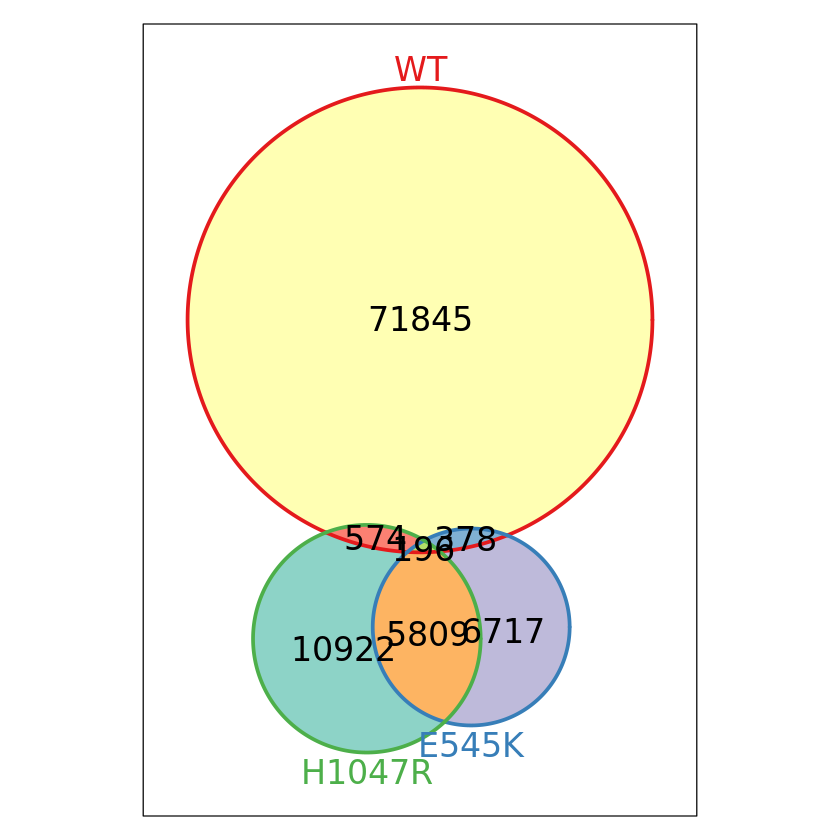

In [58]:
eulerplot <- venn_cnt2venn(p$vennCounts)
plot(eulerplot)

In [62]:
computedEuler <- compute.Venn(eulerplot)
computedEuler

A Venn object on 3 sets named
WT,E545K,H1047R 
  000   100   010   110   001   101   011   111 
    0 71845  6717   378 10922   574  5809   196 
          from  to         type npoints                             centre hand
c11|i23|1  c11 i23 VDedgeSector      NA                 0,152.428322572327    1
i23|c21|2  i23 c21 VDedgeSector      NA  33.575923079695,-48.9663473584752    1
i23|i33|1  i23 i33 VDedgeSector      NA                 0,152.428322572327    1
i33|i24|1  i33 i24 VDedgeSector      NA                 0,152.428322572327    1
i24|i34|1  i24 i34 VDedgeSector      NA                 0,152.428322572327    1
i34|c11|1  i34 c11 VDedgeSector      NA                 0,152.428322572327    1
c21|i35|2  c21 i35 VDedgeSector      NA  33.575923079695,-48.9663473584752    1
i35|i24|2  i35 i24 VDedgeSector      NA  33.575923079695,-48.9663473584752    1
i24|i36|2  i24 i36 VDedgeSector      NA  33.575923079695,-48.9663473584752    1
i36|i23|2  i36 i23 VDedgeSector      NA  33.57592307969

In [64]:
eulerplot@IndicatorWeight

WT E545K H1047R .Weight
000 0  0     0          0  
100 1  0     0      71845  
010 0  1     0       6717  
110 1  1     0        378  
001 0  0     1      10922  
101 1  0     1        574  
011 0  1     1       5809  
111 1  1     1        196

In [63]:
clrs <- VennThemes(computedEuler)
str(clrs)

List of 4
 $ Face    :List of 8
  ..$ DarkMatter:List of 3
  .. ..$ col : Named chr "pink"
  .. .. ..- attr(*, "names")= chr "DarkMatter"
  .. ..$ fill: Named chr "pink"
  .. .. ..- attr(*, "names")= chr "DarkMatter"
  .. ..$ lty : num 0
  .. ..- attr(*, "class")= chr "gpar"
  ..$ 001       :List of 3
  .. ..$ col : Named chr "#8DD3C7"
  .. .. ..- attr(*, "names")= chr "001"
  .. ..$ fill: Named chr "#8DD3C7"
  .. .. ..- attr(*, "names")= chr "001"
  .. ..$ lty : num 0
  .. ..- attr(*, "class")= chr "gpar"
  ..$ 101       :List of 3
  .. ..$ col : Named chr "#FB8072"
  .. .. ..- attr(*, "names")= chr "101"
  .. ..$ fill: Named chr "#FB8072"
  .. .. ..- attr(*, "names")= chr "101"
  .. ..$ lty : num 0
  .. ..- attr(*, "class")= chr "gpar"
  ..$ 100       :List of 3
  .. ..$ col : Named chr "#FFFFB3"
  .. .. ..- attr(*, "names")= chr "100"
  .. ..$ fill: Named chr "#FFFFB3"
  .. .. ..- attr(*, "names")= chr "100"
  .. ..$ lty : num 0
  .. ..- attr(*, "class")= chr "gpar"
  ..$ 111       

In [68]:
clrs$Face$`100`$fill <-  "#8CB3DF"
clrs$Face$`010`$fill <-  "#C29ABB"
clrs$Face$`001`$fill <-  "#B2D498"

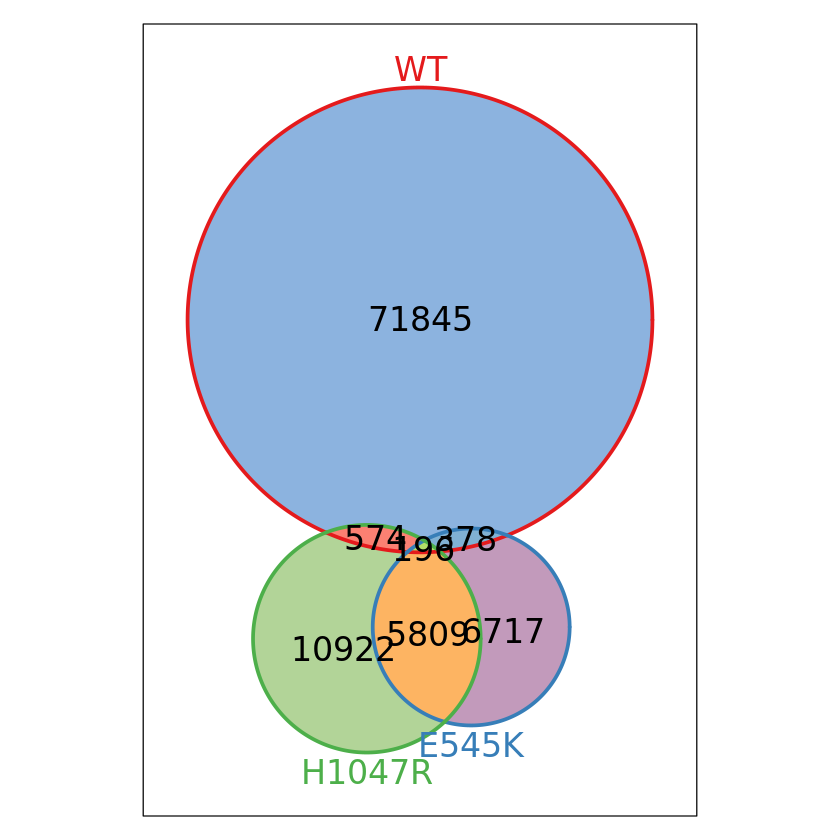

In [70]:
plot(computedEuler, gp = clrs)

In [71]:
pdf(file = "/data/park_lab/adam/figures/DiffpeaksEuler5-24.pdf",
    height = 8, width = 8)
plot(computedEuler, gp = clrs)
dev.off()

png 
  2

# GREAT Plots with browser Data

In [1]:
library(tidyverse)
setwd("/data/park_lab/adam/figures/")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [2]:
E545K_browserGREAT <- read_tsv("E545K_GOBPgreatExportAll.tsv", skip = 3) %>% 
    as.data.frame()
H1047R_browserGREAT <- read_tsv("H1047R_GOBPgreatExportAll.tsv", skip = 3) %>% 
    as.data.frame()
E545K_browserGREAT
H1047R_browserGREAT

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 504 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): # Ontology, ID, Desc, BinomRank, Regions, Genes
dbl (18): BinomP, BinomBonfP, BinomFdrQ, RegionFoldEnrich, ExpRegions, ObsRe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 504 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): # Ontology, ID, Desc, BinomRank, Regions, Genes
dbl (18): BinomP, BinomBonfP, BinomFdrQ, RegionFoldEnrich, ExpRegions, ObsRe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Ontology              ID         
1   GO Biological Process   GO:1990478 
2   GO Biological Process   GO:1903237 
3   GO Biological Process   GO:1903236 
4   GO Biological Process   GO:1904995 
5   GO Biological Process   GO:0050930 
6   GO Biological Process   GO:1905331 
7   GO Biological Process   GO:0033603 
8   GO Biological Process   GO:1904994 
9   GO Biological Process   GO:0001936 
10  GO Biological Process   GO:0050966 
11  GO Biological Process   GO:0050927 
12  GO Biological Process   GO:0050965 
13  GO Biological Process   GO:0002692 
14  GO Biological Process   GO:0050926 
15  GO Biological Process   GO:0050918 
16  GO Biological Process   GO:0036293 
17  GO Biological Process   GO:0090026 
18  GO Biological Process   GO:0003094 
19  GO Biological Process   GO:0070482 
20  GO Biological Process   GO:0033605 
21  GO Biological Process   GO:0097205 
22  GO Biological Process   GO:0019391 
23  GO Biological Process   GO:0048842 
24  GO Biological Process   GO:2000406 
25  GO Biological Process   GO:1902669 
26  GO Biological Process   GO:0014846 
27  GO Biological Process   GO:0071677 
28  GO Biological Process   GO:0051271 
29  GO Biological Process   GO:0090025 
30  GO Biological Process   GO:0010469 
⋮   ⋮                       ⋮          
475 GO Biological Process   GO:0009100 
476 GO Biological Process   GO:0043549 
477 GO Biological Process   GO:0001934 
478 GO Biological Process   GO:0003014 
479 GO Biological Process   GO:0006767 
480 GO Biological Process   GO:0060081 
481 GO Biological Process   GO:0032102 
482 GO Biological Process   GO:0007175 
483 GO Biological Process   GO:1903524 
484 GO Biological Process   GO:0070670 
485 GO Biological Process   GO:0031346 
486 GO Biological Process   GO:0070836 
487 GO Biological Process   GO:0051412 
488 GO Biological Process   GO:0045860 
489 GO Biological Process   GO:1903609 
490 GO Biological Process   GO:1900085 
491 GO Biological Process   GO:0031343 
492 GO Biological Process   GO:0044597 
493 GO Biological Process   GO:0044598 
494 GO Biological Process   GO:0007161 
495 GO Biological Process   GO:0050770 
496 GO Biological Process   GO:1904627 
497 GO Biological Process   GO:1904035 
498 GO Biological Process   GO:0030856 
499 GO Biological Process   GO:0034308 
500 GO Biological Process   GO:0042542 
501 #                       NA         
502 # Ontology              TermsTested
503 #                       NA         
504 # GO Biological Process 12917      
    Desc                                                                      
1   response to ultrasound                                                    
2   negative regulation of leukocyte tethering or rolling                     
3   regulation of leukocyte tethering or rolling                              
4   negative regulation of leukocyte adhesion to vascular endothelial cell    
5   induction of positive chemotaxis                                          
6   negative regulation of morphogenesis of an epithelium                     
7   positive regulation of dopamine secretion                                 
8   regulation of leukocyte adhesion to vascular endothelial cell             
9   regulation of endothelial cell proliferation                              
10  detection of mechanical stimulus involved in sensory perception of pain   
11  positive regulation of positive chemotaxis                                
12  detection of temperature stimulus involved in sensory perception of pain  
13  negative regulation of cellular extravasation                             
14  regulation of positive chemotaxis                                         
15  positive chemotaxis                                                       
16  response to decreased oxygen levels                                       
17  positive regulation of monocyte chemotaxis                                
18  glomerular filtration                                                     
19  response to oxygen 

# Ontology              ID         
1   GO Biological Process   GO:0002684 
2   GO Biological Process   GO:0001817 
3   GO Biological Process   GO:0030155 
4   GO Biological Process   GO:1902533 
5   GO Biological Process   GO:1903897 
6   GO Biological Process   GO:0042327 
7   GO Biological Process   GO:1903037 
8   GO Biological Process   GO:0006915 
9   GO Biological Process   GO:0001934 
10  GO Biological Process   GO:0050776 
11  GO Biological Process   GO:1903898 
12  GO Biological Process   GO:0034097 
13  GO Biological Process   GO:0050863 
14  GO Biological Process   GO:0006953 
15  GO Biological Process   GO:2001233 
16  GO Biological Process   GO:0097190 
17  GO Biological Process   GO:0051249 
18  GO Biological Process   GO:0030198 
19  GO Biological Process   GO:0043062 
20  GO Biological Process   GO:0045785 
21  GO Biological Process   GO:0071345 
22  GO Biological Process   GO:0022407 
23  GO Biological Process   GO:0002520 
24  GO Biological Process   GO:0002526 
25  GO Biological Process   GO:0043068 
26  GO Biological Process   GO:0048534 
27  GO Biological Process   GO:2000147 
28  GO Biological Process   GO:0060548 
29  GO Biological Process   GO:1900102 
30  GO Biological Process   GO:0001818 
⋮   ⋮                       ⋮          
475 GO Biological Process   GO:0015695 
476 GO Biological Process   GO:0043086 
477 GO Biological Process   GO:0019391 
478 GO Biological Process   GO:0035295 
479 GO Biological Process   GO:0045669 
480 GO Biological Process   GO:0002052 
481 GO Biological Process   GO:0033598 
482 GO Biological Process   GO:0001501 
483 GO Biological Process   GO:0007167 
484 GO Biological Process   GO:0002274 
485 GO Biological Process   GO:0010638 
486 GO Biological Process   GO:0097006 
487 GO Biological Process   GO:0038095 
488 GO Biological Process   GO:1904556 
489 GO Biological Process   GO:1904271 
490 GO Biological Process   GO:0060562 
491 GO Biological Process   GO:0072006 
492 GO Biological Process   GO:0038115 
493 GO Biological Process   GO:2000526 
494 GO Biological Process   GO:2000522 
495 GO Biological Process   GO:0097022 
496 GO Biological Process   GO:0038116 
497 GO Biological Process   GO:0034612 
498 GO Biological Process   GO:2000520 
499 GO Biological Process   GO:0061061 
500 GO Biological Process   GO:0001954 
501 #                       NA         
502 # Ontology              TermsTested
503 #                       NA         
504 # GO Biological Process 12917      
    Desc                                                                                                
1   positive regulation of immune system process                                                        
2   regulation of cytokine production                                                                   
3   regulation of cell adhesion                                                                         
4   positive regulation of intracellular signal transduction                                            
5   regulation of PERK-mediated unfolded protein response                                               
6   positive regulation of phosphorylation                                                              
7   regulation of leukocyte cell-cell adhesion                                                          
8   apoptotic process                                                                                   
9   positive regulation of protein phosphorylation                                                      
10  regulation of immune response                                                                       
11  negative regulation of PERK-mediated unfolded protein response                                      
12  response to cytokine                                                                                
13  regulation of T cell activation                                                                     
14  acute-phase response                              

In [3]:
E545K_browserGREAT <- E545K_browserGREAT %>% select(-c("Regions"))
H1047R_browserGREAT <- H1047R_browserGREAT %>% select(-c("Regions"))
E545K_browserGREAT

# Ontology              ID         
1   GO Biological Process   GO:1990478 
2   GO Biological Process   GO:1903237 
3   GO Biological Process   GO:1903236 
4   GO Biological Process   GO:1904995 
5   GO Biological Process   GO:0050930 
6   GO Biological Process   GO:1905331 
7   GO Biological Process   GO:0033603 
8   GO Biological Process   GO:1904994 
9   GO Biological Process   GO:0001936 
10  GO Biological Process   GO:0050966 
11  GO Biological Process   GO:0050927 
12  GO Biological Process   GO:0050965 
13  GO Biological Process   GO:0002692 
14  GO Biological Process   GO:0050926 
15  GO Biological Process   GO:0050918 
16  GO Biological Process   GO:0036293 
17  GO Biological Process   GO:0090026 
18  GO Biological Process   GO:0003094 
19  GO Biological Process   GO:0070482 
20  GO Biological Process   GO:0033605 
21  GO Biological Process   GO:0097205 
22  GO Biological Process   GO:0019391 
23  GO Biological Process   GO:0048842 
24  GO Biological Process   GO:2000406 
25  GO Biological Process   GO:1902669 
26  GO Biological Process   GO:0014846 
27  GO Biological Process   GO:0071677 
28  GO Biological Process   GO:0051271 
29  GO Biological Process   GO:0090025 
30  GO Biological Process   GO:0010469 
⋮   ⋮                       ⋮          
475 GO Biological Process   GO:0009100 
476 GO Biological Process   GO:0043549 
477 GO Biological Process   GO:0001934 
478 GO Biological Process   GO:0003014 
479 GO Biological Process   GO:0006767 
480 GO Biological Process   GO:0060081 
481 GO Biological Process   GO:0032102 
482 GO Biological Process   GO:0007175 
483 GO Biological Process   GO:1903524 
484 GO Biological Process   GO:0070670 
485 GO Biological Process   GO:0031346 
486 GO Biological Process   GO:0070836 
487 GO Biological Process   GO:0051412 
488 GO Biological Process   GO:0045860 
489 GO Biological Process   GO:1903609 
490 GO Biological Process   GO:1900085 
491 GO Biological Process   GO:0031343 
492 GO Biological Process   GO:0044597 
493 GO Biological Process   GO:0044598 
494 GO Biological Process   GO:0007161 
495 GO Biological Process   GO:0050770 
496 GO Biological Process   GO:1904627 
497 GO Biological Process   GO:1904035 
498 GO Biological Process   GO:0030856 
499 GO Biological Process   GO:0034308 
500 GO Biological Process   GO:0042542 
501 #                       NA         
502 # Ontology              TermsTested
503 #                       NA         
504 # GO Biological Process 12917      
    Desc                                                                      
1   response to ultrasound                                                    
2   negative regulation of leukocyte tethering or rolling                     
3   regulation of leukocyte tethering or rolling                              
4   negative regulation of leukocyte adhesion to vascular endothelial cell    
5   induction of positive chemotaxis                                          
6   negative regulation of morphogenesis of an epithelium                     
7   positive regulation of dopamine secretion                                 
8   regulation of leukocyte adhesion to vascular endothelial cell             
9   regulation of endothelial cell proliferation                              
10  detection of mechanical stimulus involved in sensory perception of pain   
11  positive regulation of positive chemotaxis                                
12  detection of temperature stimulus involved in sensory perception of pain  
13  negative regulation of cellular extravasation                             
14  regulation of positive chemotaxis                                         
15  positive chemotaxis                                                       
16  response to decreased oxygen levels                                       
17  positive regulation of monocyte chemotaxis                                
18  glomerular filtration                                                     
19  response to oxygen 

In [4]:
names(E545K_browserGREAT)

[1] "# Ontology"       "ID"               "Desc"             "BinomRank"       
 [5] "BinomP"           "BinomBonfP"       "BinomFdrQ"        "RegionFoldEnrich"
 [9] "ExpRegions"       "ObsRegions"       "GenomeFrac"       "SetCov"          
[13] "HyperRank"        "HyperP"           "HyperBonfP"       "HyperFdrQ"       
[17] "GeneFoldEnrich"   "ExpGenes"         "ObsGenes"         "TotalGenes"      
[21] "GeneSetCov"       "TermCov"          "Genes"

In [5]:
E545K_browserGREAT_top10Hyper <- E545K_browserGREAT %>% arrange(HyperFdrQ) %>% head(10)
E545K_browserGREAT_top10Hyper$Desc

[1] "positive regulation of cell differentiation"             
 [2] "embryo development"                                      
 [3] "anatomical structure formation involved in morphogenesis"
 [4] "neuron development"                                      
 [5] "circulatory system development"                          
 [6] "enzyme linked receptor protein signaling pathway"        
 [7] "cell morphogenesis"                                      
 [8] "tissue morphogenesis"                                    
 [9] "blood vessel development"                                
[10] "blood vessel morphogenesis"

In [6]:
select(E545K_browserGREAT_top10Hyper, c("Desc", "HyperFdrQ")) %>% 
    mutate(logtranf = -log(HyperFdrQ))

Desc                                                     HyperFdrQ   
1  positive regulation of cell differentiation              1.278144e-18
2  embryo development                                       1.798978e-18
3  anatomical structure formation involved in morphogenesis 1.158899e-17
4  neuron development                                       7.194986e-17
5  circulatory system development                           5.013186e-16
6  enzyme linked receptor protein signaling pathway         1.092244e-15
7  cell morphogenesis                                       2.328665e-15
8  tissue morphogenesis                                     4.444910e-15
9  blood vessel development                                 2.539003e-14
10 blood vessel morphogenesis                               4.252151e-14
   logtranf
1  41.20112
2  40.85931
3  38.99648
4  37.17056
5  35.22929
6  34.45054
7  33.69348
8  33.04702
9  31.30442
10 30.78877

In [7]:
H1047R_browserGREAT_top10Hyper <- H1047R_browserGREAT %>% arrange(HyperFdrQ) %>% head(10)
H1047R_browserGREAT_top10Hyper$Desc

[1] "circulatory system development"                          
 [2] "positive regulation of cell differentiation"             
 [3] "vasculature development"                                 
 [4] "cardiovascular system development"                       
 [5] "cell migration"                                          
 [6] "anatomical structure formation involved in morphogenesis"
 [7] "regulation of cellular component movement"               
 [8] "regulation of cell motility"                             
 [9] "blood vessel development"                                
[10] "regulation of cell migration"

In [27]:
select(H1047R_browserGREAT_top10Hyper, c("Desc", "HyperFdrQ")) %>% 
    mutate(logtranf = -log(HyperFdrQ))

Desc                                                     HyperFdrQ   
1  circulatory system development                           4.677012e-18
2  positive regulation of cell differentiation              6.543966e-18
3  vasculature development                                  4.150427e-17
4  cardiovascular system development                        1.327823e-16
5  cell migration                                           2.814674e-16
6  anatomical structure formation involved in morphogenesis 3.364032e-16
7  regulation of cellular component movement                5.202876e-16
8  regulation of cell motility                              7.800890e-16
9  blood vessel development                                 1.065881e-15
10 regulation of cell migration                             3.300728e-15
11 regulation of locomotion                                 4.300809e-15
12 tube development                                         2.047494e-14
13 cell motility                                            2.579843e-14
14 regulation of anatomical structure morphogenesis         2.937886e-13
15 blood vessel morphogenesis                               2.803912e-12
16 regulation of cell adhesion                              1.173739e-11
17 epithelial tube morphogenesis                            8.854096e-11
18 heart development                                        4.686145e-10
19 positive regulation of cell motility                     6.822907e-10
20 positive regulation of cellular component movement       9.934162e-10
   logtranf
1  39.90387
2  39.56799
3  37.72074
4  36.55782
5  35.80652
6  35.62822
7  35.19215
8  34.78712
9  34.47497
10 33.34463
11 33.07997
12 31.51957
13 31.28846
14 28.85592
15 26.60001
16 25.16824
17 23.14756
18 21.48124
19 21.10557
20 20.72987

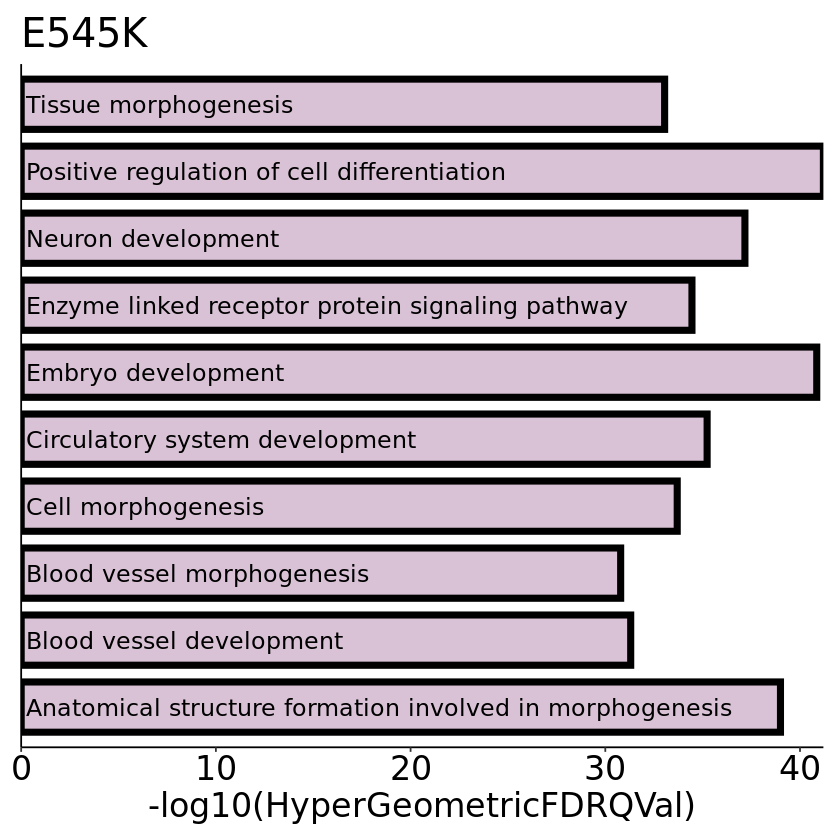

In [86]:
E545Kplot <- E545K_browserGREAT_top10Hyper %>% 
    ggplot(aes(x = Desc, y = -log(HyperFdrQ))) +
    geom_col(color = "black", fill = "#C29ABB", linewidth = 2, width = 0.75, alpha = 0.6) + 
    coord_flip() + scale_fill_manual(aes(alpha = 0.7)) +
    geom_text(aes(y = 0.25, label = str_to_sentence(Desc)), size = 5, hjust = 0) +
    scale_y_continuous(expand = c(0,0)) + ylab(label = "-log10(HyperGeometricFDRQVal)") +
    ggtitle("E545K") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 20),
                          axis.text = element_text(size = 20, colour = "black"),
                          axis.text.y = element_blank(),
                          axis.title.y = element_blank(),
                          axis.ticks.y=element_blank(),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 16, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none",
                          plot.margin = margin(10, 10, 10, 10))
E545Kplot

In [8]:
H1047R_browserGREAT_top10Hyper

# Ontology            ID        
1  GO Biological Process GO:0072359
2  GO Biological Process GO:0045597
3  GO Biological Process GO:0001944
4  GO Biological Process GO:0072358
5  GO Biological Process GO:0016477
6  GO Biological Process GO:0048646
7  GO Biological Process GO:0051270
8  GO Biological Process GO:2000145
9  GO Biological Process GO:0001568
10 GO Biological Process GO:0030334
   Desc                                                     BinomRank
1  circulatory system development                           85       
2  positive regulation of cell differentiation              163      
3  vasculature development                                  41       
4  cardiovascular system development                        62       
5  cell migration                                           99       
6  anatomical structure formation involved in morphogenesis 92       
7  regulation of cellular component movement                70       
8  regulation of cell motility                              65       
9  blood vessel development                                 68       
10 regulation of cell migration                             81       
   BinomP       BinomBonfP   BinomFdrQ    RegionFoldEnrich ExpRegions
1  8.148486e-19 1.052540e-14 1.238282e-16 1.287458          901.0003 
2  1.105540e-14 1.428026e-10 8.760896e-13 1.232886         1009.0150 
3  1.094250e-23 1.413443e-19 3.447421e-21 1.438155          545.8381 
4  1.397013e-21 1.804522e-17 2.910519e-19 1.409746          558.9658 
5  1.572319e-17 2.030964e-13 2.051479e-15 1.289780          828.8233 
6  3.622030e-18 4.678576e-14 5.085409e-16 1.287771          868.9431 
7  3.154148e-20 4.074213e-16 5.820304e-18 1.304590          876.1371 
8  5.162734e-21 6.668704e-17 1.025954e-18 1.326757          806.4775 
9  1.973395e-20 2.549034e-16 3.748580e-18 1.409143          530.1093 
10 4.149718e-19 5.360191e-15 6.617519e-17 1.317816          770.2138 
   ObsRegions ⋯ HyperP       HyperBonfP   HyperFdrQ    GeneFoldEnrich ExpGenes
1  1160       ⋯ 2.896655e-21 3.741609e-17 4.677012e-18 1.531389       230.5097
2  1244       ⋯ 6.079399e-21 7.852760e-17 6.543966e-18 1.500722       253.2114
3   785       ⋯ 4.819726e-20 6.225640e-16 4.150427e-17 1.671502       139.9939
4   788       ⋯ 1.644745e-19 2.124517e-15 1.327823e-16 1.654825       142.6133
5  1069       ⋯ 3.704378e-19 4.784945e-15 2.814674e-16 1.496264       234.5843
6  1119       ⋯ 4.687820e-19 6.055257e-15 3.364032e-16 1.489851       238.9500
7  1143       ⋯ 8.055858e-19 1.040575e-14 5.202876e-16 1.479500       245.3531
8  1070       ⋯ 1.268241e-18 1.638187e-14 7.800890e-16 1.499853       224.6887
9   747       ⋯ 1.815390e-18 2.344939e-14 1.065881e-15 1.657917       133.2998
10 1015       ⋯ 5.877274e-18 7.591675e-14 3.300728e-15 1.509480       208.6811
   ObsGenes TotalGenes GeneSetCov TermCov  
1  353      792        0.06459286 0.4457071
2  380      870        0.06953339 0.4367816
3  234      481        0.04281793 0.4864865
4  236      490        0.04318390 0.4816327
5  351      806        0.06422690 0.4354839
6  356      821        0.06514181 0.4336175
7  363      843        0.06642269 0.4306050
8  337      772        0.06166514 0.4365285
9  221      458        0.04043916 0.4825328
10 315      717        0.05763952 0.4393305
   Genes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

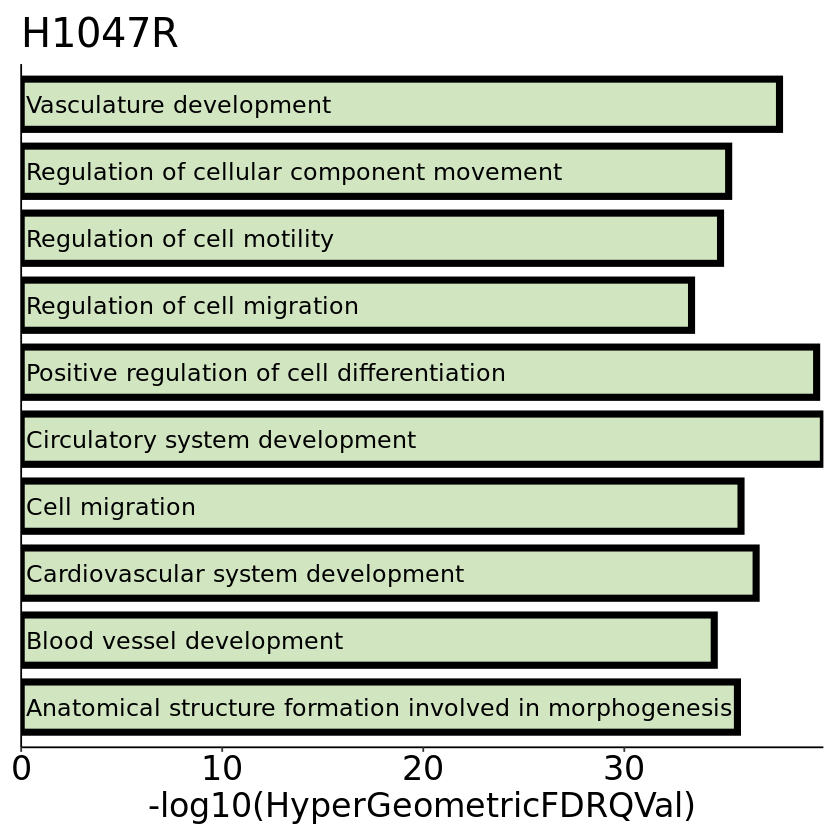

In [87]:
H1047Rplot <- H1047R_browserGREAT_top10Hyper %>% 
    ggplot(aes(x = Desc, y = -log(HyperFdrQ))) +
    geom_col(color = "black", fill = "#B2D498", linewidth = 2, width = 0.75, alpha = 0.6) + 
    coord_flip() + scale_fill_manual(aes(alpha = 0.7)) +
    geom_text(aes(y = 0.25, label = str_to_sentence(Desc)), size = 5, hjust = 0) +
    scale_y_continuous(expand = c(0,0)) + ylab(label = "-log10(HyperGeometricFDRQVal)") +
    ggtitle("H1047R") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 20),
                          axis.text = element_text(size = 20, colour = "black"),
                          axis.text.y = element_blank(),
                          axis.title.y = element_blank(),
                          axis.ticks.y=element_blank(),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 16, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none",
                          plot.margin = margin(10, 10, 10, 10))
H1047Rplot

In [88]:
ggsave(filename="/data/park_lab/adam/figures/E545KGREAT_8-3.pdf", 
       plot = E545Kplot, device = cairo_pdf, width = 8, height = 8)
ggsave(filename="/data/park_lab/adam/figures/H1047RGREAT_8-3.pdf", 
       plot = H1047Rplot, device = cairo_pdf, width = 8, height = 8)

# rGREAT with the Hallmark GSEA

In [1]:
library(tidyverse)
setwd("/data/park_lab/adam/figures/")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [3]:
library(rGREAT)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:tidyr’:

    expand


T

In [2]:
cluster2regions <- readRDS("/data/park_lab/adam/files4deepTools/cluster2regions.rds")
cluster3regions <- readRDS("/data/park_lab/adam/files4deepTools/cluster3regions.rds")
cluster2regions

chr   start     end      
1    chr12 124909030 124909291
2    chr3  111860112 111860287
3    chr1  150570782 150571714
4    chr5  138466617 138468317
5    chr14  75279781  75280321
6    chr17  64130506  64130606
7    chr1  146001706 146001953
8    chr3  189305128 189305344
9    chr17  81506466  81506566
10   chr15  51828654  51829381
11   chr16  20899825  20900097
12   chr5  138468440 138468540
13   chr18  58309331  58310347
14   chr1   58574755  58574855
15   chr4   10095688  10095915
16   chr5  143594886 143596100
17   chr1   44730050  44730308
18   chr19  16075494  16075735
19   chr2  143901671 143901836
20   chr2  150478622 150478792
21   chr17  81506089  81506437
22   chr3  123585985 123586594
23   chr8   40208088  40208245
24   chr4   28278707  28279120
25   chr21   6124560   6125369
26   chr13  33634588  33634771
27   chr10  11897805  11897984
28   chr11  68012616  68012943
29   chr2  150481203 150481673
30   chr1  182789367 182789510
⋮    ⋮     ⋮         ⋮        
1229 chr3   44685517  44685764
1230 chr5    9654977   9655252
1231 chr3  188270384 188270930
1232 chr1   39980438  39981127
1233 chr3  107855798 107855980
1234 chr15  82487070  82487635
1235 chr4  173125236 173125602
1236 chr13  19607622  19607867
1237 chr6  166352001 166352289
1238 chr3  107599198 107599382
1239 chr13  44854377  44854972
1240 chr3  158774058 158774512
1241 chr22  46139977  46140195
1242 chr22  41682331  41682602
1243 chr13  66673315  66673824
1244 chr12   7272024   7272177
1245 chr9   20355079  20355522
1246 chr19  36915943  36916627
1247 chr10  94991535  94991786
1248 chr4   30399413  30399617
1249 chr12  79409547  79410167
1250 chr1   40029608  40029914
1251 chr6    9511200   9511493
1252 chr12  19978162  19978591
1253 chr15  42100442  42100712
1254 chr12 114069602 114069807
1255 chr15  95875197  95875659
1256 chr3   30467671  30467881
1257 chr22  45112381  45112657
1258 chr2  185738639 185739441

In [7]:
library(GenomicRanges)

In [10]:
cluster2Granges <- GRanges(seqnames = cluster2regions$chr,
                             ranges = IRanges(start = cluster2regions$start,
                             end = cluster2regions$end))
cluster2Granges

GRanges object with 1258 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]    chr12 124909030-124909291      *
     [2]     chr3 111860112-111860287      *
     [3]     chr1 150570782-150571714      *
     [4]     chr5 138466617-138468317      *
     [5]    chr14   75279781-75280321      *
     ...      ...                 ...    ...
  [1254]    chr12 114069602-114069807      *
  [1255]    chr15   95875197-95875659      *
  [1256]     chr3   30467671-30467881      *
  [1257]    chr22   45112381-45112657      *
  [1258]     chr2 185738639-185739441      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [20]:
cluster3Granges <- GRanges(seqnames = cluster3regions$chr,
                             ranges = IRanges(start = cluster3regions$start,
                             end = cluster3regions$end))
cluster3Granges

GRanges object with 2599 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr5 139373474-139373574      *
     [2]    chr16   67395552-67396048      *
     [3]    chr20   51457291-51457567      *
     [4]     chr4   24209967-24210217      *
     [5]    chr20   51766433-51766773      *
     ...      ...                 ...    ...
  [2595]     chr1   56349831-56349940      *
  [2596]     chr5   54208767-54208876      *
  [2597]    chr10   80872318-80872427      *
  [2598]    chr15   61352012-61352125      *
  [2599]     chr1 107046668-107046777      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [21]:
cluster2res <- great(cluster2Granges, "MSigDB:H", "hg38")
cluster2res
cluster3res <- great(cluster3Granges, "MSigDB:H", "hg38")
cluster3res

* TSS source: TxDb.

* extended_tss is already cached, directly use it.

* check gene ID type in `gene_sets` and in `extended_tss`.

* use whole genome as background.

* remove excluded regions from background.

* overlap `gr` to background regions (based on midpoint).

* in total 1258 `gr`.

* overlap extended TSS to background regions.

* check which genes are in the gene sets.

* only take gene sets with size >= 5.

* in total 50 gene sets.

* overlap `gr` to every extended TSS.

* perform binomial test for each biological term.



1258 regions are associated to 1485 genes' extended TSSs.
  TSS source: TxDb.Hsapiens.UCSC.hg38.knownGene
  Genome: hg38
  OrgDb: org.Hs.eg.db
  Gene sets: MSigDB:H
  Background: whole genome excluding gaps
Mode: Basal plus extension
  Proximal: 5000 bp upstream, 1000 bp downstream,
  plus Distal: up to 1000000 bp

* TSS source: TxDb.

* extended_tss is already cached, directly use it.

* check gene ID type in `gene_sets` and in `extended_tss`.

* use whole genome as background.

* remove excluded regions from background.

* overlap `gr` to background regions (based on midpoint).

* in total 2599 `gr`.

* overlap extended TSS to background regions.

* check which genes are in the gene sets.

* only take gene sets with size >= 5.

* in total 50 gene sets.

* overlap `gr` to every extended TSS.

* perform binomial test for each biological term.



2599 regions are associated to 3312 genes' extended TSSs.
  TSS source: TxDb.Hsapiens.UCSC.hg38.knownGene
  Genome: hg38
  OrgDb: org.Hs.eg.db
  Gene sets: MSigDB:H
  Background: whole genome excluding gaps
Mode: Basal plus extension
  Proximal: 5000 bp upstream, 1000 bp downstream,
  plus Distal: up to 1000000 bp

In [22]:
cluster2res

1258 regions are associated to 1485 genes' extended TSSs.
  TSS source: TxDb.Hsapiens.UCSC.hg38.knownGene
  Genome: hg38
  OrgDb: org.Hs.eg.db
  Gene sets: MSigDB:H
  Background: whole genome excluding gaps
Mode: Basal plus extension
  Proximal: 5000 bp upstream, 1000 bp downstream,
  plus Distal: up to 1000000 bp

In [24]:
cluster2table = getEnrichmentTable(cluster2res)
arrange(cluster2table, p_adjust_hyper)
cluster3table = getEnrichmentTable(cluster3res)
arrange(cluster3table, p_adjust_hyper)

id                                         genome_fraction
1  HALLMARK_TNFA_SIGNALING_VIA_NFKB           0.023170676    
2  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 0.029461439    
3  HALLMARK_ESTROGEN_RESPONSE_EARLY           0.023168691    
4  HALLMARK_HYPOXIA                           0.021070481    
5  HALLMARK_APOPTOSIS                         0.014786593    
6  HALLMARK_ESTROGEN_RESPONSE_LATE            0.019084417    
7  HALLMARK_UV_RESPONSE_DN                    0.027925998    
8  HALLMARK_APICAL_JUNCTION                   0.017603834    
9  HALLMARK_INFLAMMATORY_RESPONSE             0.020718317    
10 HALLMARK_IL2_STAT5_SIGNALING               0.021662094    
11 HALLMARK_UV_RESPONSE_UP                    0.013209092    
12 HALLMARK_FATTY_ACID_METABOLISM             0.011951552    
13 HALLMARK_KRAS_SIGNALING_UP                 0.026969051    
14 HALLMARK_P53_PATHWAY                       0.015470424    
15 HALLMARK_MYOGENESIS                        0.018305200    
16 HALLMARK_ANDROGEN_RESPONSE                 0.011483442    
17 HALLMARK_INTERFERON_GAMMA_RESPONSE         0.015655913    
18 HALLMARK_PEROXISOME                        0.007794750    
19 HALLMARK_MITOTIC_SPINDLE                   0.017727582    
20 HALLMARK_COMPLEMENT                        0.017158043    
21 HALLMARK_PROTEIN_SECRETION                 0.009259607    
22 HALLMARK_CHOLESTEROL_HOMEOSTASIS           0.006431787    
23 HALLMARK_BILE_ACID_METABOLISM              0.010177035    
24 HALLMARK_INTERFERON_ALPHA_RESPONSE         0.006326091    
25 HALLMARK_TGF_BETA_SIGNALING                0.006913733    
26 HALLMARK_COAGULATION                       0.009527525    
27 HALLMARK_KRAS_SIGNALING_DN                 0.020167019    
28 HALLMARK_ADIPOGENESIS                      0.014455838    
29 HALLMARK_ALLOGRAFT_REJECTION               0.015357465    
30 HALLMARK_HEDGEHOG_SIGNALING                0.006885367    
31 HALLMARK_APICAL_SURFACE                    0.005282008    
32 HALLMARK_SPERMATOGENESIS                   0.012984116    
33 HALLMARK_IL6_JAK_STAT3_SIGNALING           0.005943797    
34 HALLMARK_GLYCOLYSIS                        0.018714270    
35 HALLMARK_UNFOLDED_PROTEIN_RESPONSE         0.007632522    
36 HALLMARK_XENOBIOTIC_METABOLISM             0.013316684    
37 HALLMARK_WNT_BETA_CATENIN_SIGNALING        0.005902348    
38 HALLMARK_G2M_CHECKPOINT                    0.018846242    
39 HALLMARK_E2F_TARGETS                       0.012861396    
40 HALLMARK_MTORC1_SIGNALING                  0.015126065    
41 HALLMARK_OXIDATIVE_PHOSPHORYLATION         0.012279343    
42 HALLMARK_MYC_TARGETS_V1                    0.011840037    
43 HALLMARK_HEME_METABOLISM                   0.014719630    
44 HALLMARK_PI3K_AKT_MTOR_SIGNALING           0.009281536    
45 HALLMARK_DNA_REPAIR                        0.007507685    
   observed_region_hits fold_enrichment p_value      p_adjust     mean_tss_dist
1  85                   2.9160810       0.000000e+00 0.000000e+00 127038       
2  81                   2.1854981       1.369945e-10 8.806791e-10 214487       
3  58                   1.9899669       1.144189e-06 5.148852e-06 264493       
4  74                   2.7917507       1.221245e-14 1.831868e-13 127000       
5  68                   3.6556125       0.000000e+00 0.000000e+00  77776       
6  57                   2.3741891       4.825567e-09 2.714381e-08 127071       
7  62                   1.7648278       1.962053e-05 7.357697e-05 153618       
8  61                   2.7544946       4.618528e-12 4.156675e-11 158320       
9  44                   1.6881754       7.330428e-04 1.791059e-03 138700       
10 41                   1.5045366       7.669581e-03 1.380525e-02 200696       
11 34                   2.0460927       1.072889e-04 3.017500e-04 192184       
12 37                   2.4609159       1.036687e-06 5.148852e-06 119981       
13 54                   1.5916495       7.562248e-04 1.791059e-03 215110       
14 61                   3.13434

id                                         genome_fraction
1  HALLMARK_UV_RESPONSE_DN                    0.027925998    
2  HALLMARK_TNFA_SIGNALING_VIA_NFKB           0.023170676    
3  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 0.029461439    
4  HALLMARK_ESTROGEN_RESPONSE_EARLY           0.023168691    
5  HALLMARK_IL2_STAT5_SIGNALING               0.021662094    
6  HALLMARK_INFLAMMATORY_RESPONSE             0.020718317    
7  HALLMARK_TGF_BETA_SIGNALING                0.006913733    
8  HALLMARK_KRAS_SIGNALING_UP                 0.026969051    
9  HALLMARK_MTORC1_SIGNALING                  0.015126065    
10 HALLMARK_HYPOXIA                           0.021070481    
11 HALLMARK_ESTROGEN_RESPONSE_LATE            0.019084417    
12 HALLMARK_APICAL_SURFACE                    0.005282008    
13 HALLMARK_ANDROGEN_RESPONSE                 0.011483442    
14 HALLMARK_APOPTOSIS                         0.014786593    
15 HALLMARK_SPERMATOGENESIS                   0.012984116    
16 HALLMARK_MITOTIC_SPINDLE                   0.017727582    
17 HALLMARK_NOTCH_SIGNALING                   0.003587134    
18 HALLMARK_HEDGEHOG_SIGNALING                0.006885367    
19 HALLMARK_APICAL_JUNCTION                   0.017603834    
20 HALLMARK_ADIPOGENESIS                      0.014455838    
21 HALLMARK_ANGIOGENESIS                      0.004245632    
22 HALLMARK_FATTY_ACID_METABOLISM             0.011951552    
23 HALLMARK_G2M_CHECKPOINT                    0.018846242    
24 HALLMARK_PANCREAS_BETA_CELLS               0.005288218    
25 HALLMARK_PI3K_AKT_MTOR_SIGNALING           0.009281536    
26 HALLMARK_WNT_BETA_CATENIN_SIGNALING        0.005902348    
27 HALLMARK_BILE_ACID_METABOLISM              0.010177035    
28 HALLMARK_UNFOLDED_PROTEIN_RESPONSE         0.007632522    
29 HALLMARK_COAGULATION                       0.009527525    
30 HALLMARK_CHOLESTEROL_HOMEOSTASIS           0.006431787    
31 HALLMARK_ALLOGRAFT_REJECTION               0.015357465    
32 HALLMARK_INTERFERON_ALPHA_RESPONSE         0.006326091    
33 HALLMARK_HEME_METABOLISM                   0.014719630    
34 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY   0.002665430    
35 HALLMARK_GLYCOLYSIS                        0.018714270    
36 HALLMARK_UV_RESPONSE_UP                    0.013209092    
37 HALLMARK_INTERFERON_GAMMA_RESPONSE         0.015655913    
38 HALLMARK_KRAS_SIGNALING_DN                 0.020167019    
39 HALLMARK_MYOGENESIS                        0.018305200    
40 HALLMARK_IL6_JAK_STAT3_SIGNALING           0.005943797    
41 HALLMARK_DNA_REPAIR                        0.007507685    
42 HALLMARK_XENOBIOTIC_METABOLISM             0.013316684    
43 HALLMARK_E2F_TARGETS                       0.012861396    
44 HALLMARK_PROTEIN_SECRETION                 0.009259607    
45 HALLMARK_OXIDATIVE_PHOSPHORYLATION         0.012279343    
46 HALLMARK_MYC_TARGETS_V1                    0.011840037    
47 HALLMARK_MYC_TARGETS_V2                    0.003021617    
48 HALLMARK_PEROXISOME                        0.007794750    
49 HALLMARK_COMPLEMENT                        0.017158043    
50 HALLMARK_P53_PATHWAY                       0.015470424    
   observed_region_hits fold_enrichment p_value      p_adjust     mean_tss_dist
1   98                  1.3502404       2.257434e-03 8.682440e-03 263292       
2  104                  1.7269842       1.332855e-07 6.664274e-06 194408       
3  121                  1.5802476       1.137830e-06 2.844575e-05 220787       
4   86                  1.4282054       8.940971e-04 5.588107e-03 175382       
5   74                  1.3143923       1.269678e-02 3.341259e-02 139574       
6   80                  1.4856936       4.464606e-04 3.189004e-03 173121       
7   30                  1.6695613       5.647660e-03 1.661076e-02 142141       
8   90                  1.2840164       1.149830e-02 3.193972e-02 211885       
9   63                  1.6025379       2.727723e-04 2.727723e-03 118451       
10  78                  1.4243407       1

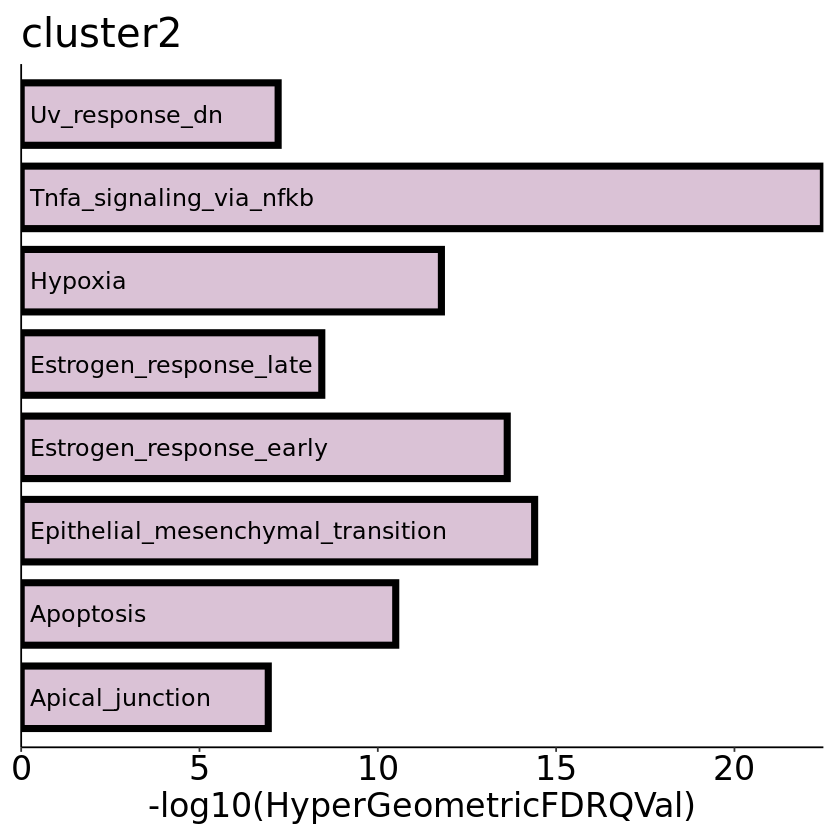

In [28]:
cluster2plot <- cluster2table %>% arrange(p_adjust_hyper) %>% head(n = 8) %>%
    ggplot(aes(x = id, y = -log(p_adjust_hyper))) +
    geom_col(color = "black", fill = "#C29ABB", linewidth = 2, width = 0.75, alpha = 0.6) + 
    coord_flip() + scale_fill_manual(aes(alpha = 0.7)) +
    geom_text(aes(y = 0.25, label = str_to_sentence(
        gsub(id, pattern = "HALLMARK_", replacement = "")
    )), size = 5, hjust = 0) +
    scale_y_continuous(expand = c(0,0)) + ylab(label = "-log10(HyperGeometricFDRQVal)") +
    ggtitle("cluster2") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 20),
                          axis.text = element_text(size = 20, colour = "black"),
                          axis.text.y = element_blank(),
                          axis.title.y = element_blank(),
                          axis.ticks.y=element_blank(),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 16, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none",
                          plot.margin = margin(10, 10, 10, 10))
cluster2plot

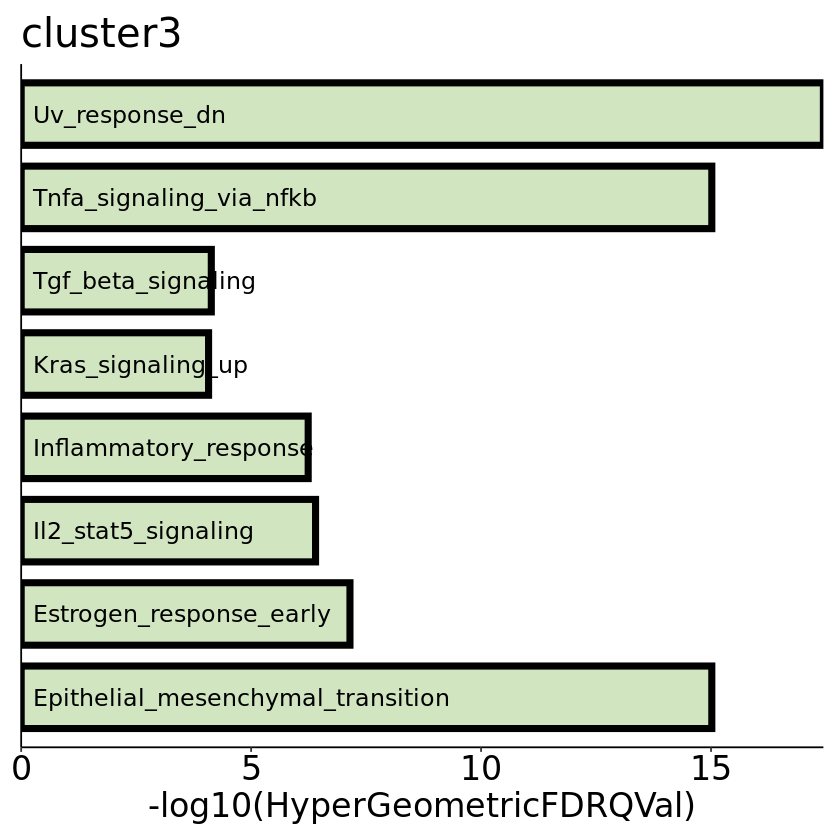

In [29]:
cluster3plot <- cluster3table %>% arrange(p_adjust_hyper) %>% head(n = 8) %>%
    ggplot(aes(x = id, y = -log(p_adjust_hyper))) +
    geom_col(color = "black", fill = "#B2D498", linewidth = 2, width = 0.75, alpha = 0.6) + 
    coord_flip() + scale_fill_manual(aes(alpha = 0.7)) +
    geom_text(aes(y = 0.25, label = str_to_sentence(
        gsub(id, pattern = "HALLMARK_", replacement = "")
    )), size = 5, hjust = 0) +
    scale_y_continuous(expand = c(0,0)) + ylab(label = "-log10(HyperGeometricFDRQVal)") +
    ggtitle("cluster3") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 20),
                          axis.text = element_text(size = 20, colour = "black"),
                          axis.text.y = element_blank(),
                          axis.title.y = element_blank(),
                          axis.ticks.y=element_blank(),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 16, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none",
                          plot.margin = margin(10, 10, 10, 10))
cluster3plot

In [30]:
ggsave(filename="/data/park_lab/adam/figures/cluster2_GREAT_GSEA8-29.pdf", 
       plot = cluster2plot, device = cairo_pdf, width = 8, height = 8)
ggsave(filename="/data/park_lab/adam/figures/cluster3_GREAT_GSEA8-29.pdf", 
       plot = cluster3plot, device = cairo_pdf, width = 8, height = 8)


## With Background now

In [31]:
clusteredRegions <- read_tsv("/data/park_lab/adam/files4deepTools/MCF10A_sigdiffsorted.bed") %>% 
                    as.data.frame()
head(clusteredRegions)

Rows: 8672 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): #chrom, name, score, strand, deepTools_group
dbl (8): start, end, thickStart, thickEnd, itemRGB, blockCount, blockSizes, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#chrom start     end       name                     score strand thickStart
1 chr8   102757760 102758138 chr8:102757760-102758138 .     .      102757760 
2 chr15   91953657  91953757 chr15:91953657-91953757  .     .       91953657 
3 chr7   111906753 111906863 chr7:111906753-111906863 .     .      111906753 
4 chr14   75280455  75282028 chr14:75280455-75282028  .     .       75280455 
5 chr19   13154889  13156621 chr19:13154889-13156621  .     .       13154889 
6 chr9   130967850 130967959 chr9:130967850-130967959 .     .      130967850 
  thickEnd  itemRGB blockCount blockSizes blockStart deepTools_group
1 102758138 0       1           378       102757759  cluster_1      
2  91953757 0       1           100        91953648  cluster_1      
3 111906863 0       1           110       111906752  cluster_1      
4  75282028 0       1          1573        75280448  cluster_1      
5  13156621 0       1          1732        13154888  cluster_1      
6 130967959 0       1           109       130967849  cluster_1

In [33]:
clusteredRegions_select <- clusteredRegions %>% dplyr::select(c(1:3))
names(clusteredRegions_select)  <- c("chrom", "start", "end")
clusteredRegions_select

chrom start     end      
1    chr8  102757760 102758138
2    chr15  91953657  91953757
3    chr7  111906753 111906863
4    chr14  75280455  75282028
5    chr19  13154889  13156621
6    chr9  130967850 130967959
7    chr2   41906985  41907253
8    chr3  157129061 157129335
9    chr20  31676979  31677090
10   chr4  123051156 123051266
11   chr4  186473551 186473661
12   chr6   21367307  21367417
13   chr1  162858509 162858620
14   chr10 132417985 132419521
15   chr1  162372263 162372598
16   chr5   44665481  44665630
17   chr7  105439133 105439479
18   chr3   45125588  45126118
19   chr2  175930493 175931079
20   chr16  30775336  30775805
21   chr1   24151206  24151575
22   chr2  175929824 175930354
23   chr6  159716259 159716486
24   chr4   24210399  24210499
25   chr5  104594644 104594755
26   chr11 110184519 110184762
27   chr5   66891283  66891458
28   chr19  11137488  11137650
29   chr17  40101213  40101379
30   chr8   22178708  22179328
⋮    ⋮     ⋮         ⋮        
8643 chr5  103428421 103428614
8644 chr18   1521423   1522517
8645 chr15  49615178  49615362
8646 chr15  53832098  53832198
8647 chr7   91854592  91854748
8648 chr15  53265054  53265154
8649 chr14  47266087  47266187
8650 chr10   8868153   8869443
8651 chr3   64693422  64693522
8652 chr10  81002055  81002928
8653 chr16  63375946  63376184
8654 chr3  148694177 148694460
8655 chr1   81008443  81008586
8656 chr1  218611067 218611448
8657 chr9  102098509 102098817
8658 chr13  46909111  46909310
8659 chr10   8066584   8067011
8660 chr8   64017869  64017978
8661 chr14  62800215  62800518
8662 chr3  161073322 161073576
8663 chr15  39321838  39322502
8664 chr14  40954184  40955141
8665 chr6  120824126 120824579
8666 chr12  72624040  72624252
8667 chr1  107399535 107399822
8668 chr3    3547277   3547387
8669 chr14  25724395  25724652
8670 chr11  93396371  93396701
8671 chr14  43779051  43779449
8672 chr7   84647716  84648308

In [34]:
backgroundGranges <- GRanges(seqnames = clusteredRegions_select$chrom,
                             ranges = IRanges(start = clusteredRegions_select$start,
                             end = clusteredRegions_select$end))
backgroundGranges

GRanges object with 8672 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr8 102757760-102758138      *
     [2]    chr15   91953657-91953757      *
     [3]     chr7 111906753-111906863      *
     [4]    chr14   75280455-75282028      *
     [5]    chr19   13154889-13156621      *
     ...      ...                 ...    ...
  [8668]     chr3     3547277-3547387      *
  [8669]    chr14   25724395-25724652      *
  [8670]    chr11   93396371-93396701      *
  [8671]    chr14   43779051-43779449      *
  [8672]     chr7   84647716-84648308      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [35]:
cluster2resBack <- great(cluster2Granges, "MSigDB:H", "hg38", 
                     background = backgroundGranges)
cluster2resBack
cluster3resBack <- great(cluster3Granges, "MSigDB:H", "hg38",
                     background = backgroundGranges)
cluster3resBack

* TSS source: TxDb.

* extended_tss is already cached, directly use it.

* check gene ID type in `gene_sets` and in `extended_tss`.

* use self-defined background regions.

* remove excluded regions from background.

* overlap `gr` to background regions (based on midpoint).

* in total 1258 `gr`.

* overlap extended TSS to background regions.

* check which genes are in the gene sets.

* only take gene sets with size >= 5.

* in total 50 gene sets.

* overlap `gr` to every extended TSS.

* perform binomial test for each biological term.



1258 regions are associated to 1485 genes' extended TSSs.
  TSS source: TxDb.Hsapiens.UCSC.hg38.knownGene
  Genome: hg38
  OrgDb: org.Hs.eg.db
  Gene sets: MSigDB:H
  Background: self-provided
Mode: Basal plus extension
  Proximal: 5000 bp upstream, 1000 bp downstream,
  plus Distal: up to 1000000 bp

* TSS source: TxDb.

* extended_tss is already cached, directly use it.

* check gene ID type in `gene_sets` and in `extended_tss`.

* use self-defined background regions.

* remove excluded regions from background.

* overlap `gr` to background regions (based on midpoint).

* in total 2599 `gr`.

* overlap extended TSS to background regions.

* check which genes are in the gene sets.

* only take gene sets with size >= 5.

* in total 50 gene sets.

* overlap `gr` to every extended TSS.

* perform binomial test for each biological term.



2599 regions are associated to 3312 genes' extended TSSs.
  TSS source: TxDb.Hsapiens.UCSC.hg38.knownGene
  Genome: hg38
  OrgDb: org.Hs.eg.db
  Gene sets: MSigDB:H
  Background: self-provided
Mode: Basal plus extension
  Proximal: 5000 bp upstream, 1000 bp downstream,
  plus Distal: up to 1000000 bp

In [37]:
cluster2Backtable = getEnrichmentTable(cluster2resBack)
arrange(cluster2Backtable, p_adjust_hyper)
cluster3Backtable = getEnrichmentTable(cluster3resBack)
arrange(cluster3Backtable, p_adjust_hyper)

id                                         genome_fraction
1  HALLMARK_TNFA_SIGNALING_VIA_NFKB           0.064022437    
2  HALLMARK_APOPTOSIS                         0.040220764    
3  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 0.063834155    
4  HALLMARK_ESTROGEN_RESPONSE_EARLY           0.051538584    
5  HALLMARK_HYPOXIA                           0.050925934    
6  HALLMARK_ESTROGEN_RESPONSE_LATE            0.045818441    
7  HALLMARK_APICAL_JUNCTION                   0.048318159    
8  HALLMARK_P53_PATHWAY                       0.033325748    
9  HALLMARK_PEROXISOME                        0.015375195    
10 HALLMARK_UV_RESPONSE_UP                    0.027639005    
11 HALLMARK_FATTY_ACID_METABOLISM             0.016471482    
12 HALLMARK_COMPLEMENT                        0.026490326    
13 HALLMARK_MYOGENESIS                        0.031566056    
14 HALLMARK_INFLAMMATORY_RESPONSE             0.032549702    
15 HALLMARK_INTERFERON_GAMMA_RESPONSE         0.019811752    
16 HALLMARK_ANDROGEN_RESPONSE                 0.019138197    
17 HALLMARK_CHOLESTEROL_HOMEOSTASIS           0.014515324    
18 HALLMARK_PROTEIN_SECRETION                 0.012743517    
19 HALLMARK_MITOTIC_SPINDLE                   0.030665254    
20 HALLMARK_ALLOGRAFT_REJECTION               0.018078256    
21 HALLMARK_BILE_ACID_METABOLISM              0.009825979    
22 HALLMARK_IL2_STAT5_SIGNALING               0.033376174    
23 HALLMARK_INTERFERON_ALPHA_RESPONSE         0.009584325    
24 HALLMARK_COAGULATION                       0.019279326    
25 HALLMARK_KRAS_SIGNALING_DN                 0.025590507    
26 HALLMARK_IL6_JAK_STAT3_SIGNALING           0.010035217    
27 HALLMARK_KRAS_SIGNALING_UP                 0.033468514    
28 HALLMARK_UV_RESPONSE_DN                    0.040181143    
29 HALLMARK_E2F_TARGETS                       0.011319457    
30 HALLMARK_HEDGEHOG_SIGNALING                0.009602661    
31 HALLMARK_GLYCOLYSIS                        0.025830524    
32 HALLMARK_ADIPOGENESIS                      0.020922446    
33 HALLMARK_SPERMATOGENESIS                   0.011840095    
34 HALLMARK_UNFOLDED_PROTEIN_RESPONSE         0.017183348    
35 HALLMARK_TGF_BETA_SIGNALING                0.011291297    
36 HALLMARK_APICAL_SURFACE                    0.012105326    
37 HALLMARK_G2M_CHECKPOINT                    0.016220659    
38 HALLMARK_XENOBIOTIC_METABOLISM             0.018568114    
39 HALLMARK_WNT_BETA_CATENIN_SIGNALING        0.006113732    
40 HALLMARK_OXIDATIVE_PHOSPHORYLATION         0.013170178    
41 HALLMARK_MYC_TARGETS_V1                    0.009816811    
42 HALLMARK_MTORC1_SIGNALING                  0.018311397    
43 HALLMARK_HEME_METABOLISM                   0.013199648    
44 HALLMARK_PI3K_AKT_MTOR_SIGNALING           0.009635079    
45 HALLMARK_DNA_REPAIR                        0.011774934    
   observed_region_hits fold_enrichment p_value      p_adjust   mean_tss_dist
1  85                   1.0553733       0.3194394888 0.68524282 127038       
2  68                   1.3439341       0.0098410819 0.08856974  77776       
3  81                   1.0086750       0.4842633821 0.82016118 214487       
4  58                   0.8945711       0.8247046212 0.95134335 264493       
5  74                   1.1550800       0.1146318477 0.36244363 127000       
6  57                   0.9889035       0.5531476279 0.82016118 127071       
7  61                   1.0035495       0.5069998327 0.82016118 158320       
8  61                   1.4550211       0.0028541978 0.04281297 151198       
9  25                   1.2925244       0.1208145428 0.36244363 293688       
10 34                   0.9778582       0.5762666755 0.82016118 192184       
11 37                   1.7856174       0.0007104781 0.02520932 119981       
12 30                   0.9002296       0.7441649090 0.91296745 236466       
13 46                   1.1583955       0.1742309184 0.46119949 189102       
14 44                   1.0745460       0.3350075988 0.6852

id                                         genome_fraction
1  HALLMARK_MTORC1_SIGNALING                  0.018311397    
2  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 0.063834155    
3  HALLMARK_TNFA_SIGNALING_VIA_NFKB           0.064022437    
4  HALLMARK_MYC_TARGETS_V1                    0.009816811    
5  HALLMARK_UV_RESPONSE_DN                    0.040181143    
6  HALLMARK_PI3K_AKT_MTOR_SIGNALING           0.009635079    
7  HALLMARK_ANGIOGENESIS                      0.004291171    
8  HALLMARK_G2M_CHECKPOINT                    0.016220659    
9  HALLMARK_SPERMATOGENESIS                   0.011840095    
10 HALLMARK_E2F_TARGETS                       0.011319457    
11 HALLMARK_NOTCH_SIGNALING                   0.004882865    
12 HALLMARK_TGF_BETA_SIGNALING                0.011291297    
13 HALLMARK_INFLAMMATORY_RESPONSE             0.032549702    
14 HALLMARK_ANDROGEN_RESPONSE                 0.019138197    
15 HALLMARK_APICAL_SURFACE                    0.012105326    
16 HALLMARK_IL2_STAT5_SIGNALING               0.033376174    
17 HALLMARK_MITOTIC_SPINDLE                   0.030665254    
18 HALLMARK_ESTROGEN_RESPONSE_EARLY           0.051538584    
19 HALLMARK_UNFOLDED_PROTEIN_RESPONSE         0.017183348    
20 HALLMARK_HEME_METABOLISM                   0.013199648    
21 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY   0.002908697    
22 HALLMARK_DNA_REPAIR                        0.011774934    
23 HALLMARK_FATTY_ACID_METABOLISM             0.016471482    
24 HALLMARK_ESTROGEN_RESPONSE_LATE            0.045818441    
25 HALLMARK_HEDGEHOG_SIGNALING                0.009602661    
26 HALLMARK_ALLOGRAFT_REJECTION               0.018078256    
27 HALLMARK_MYC_TARGETS_V2                    0.002732859    
28 HALLMARK_BILE_ACID_METABOLISM              0.009825979    
29 HALLMARK_ADIPOGENESIS                      0.020922446    
30 HALLMARK_OXIDATIVE_PHOSPHORYLATION         0.013170178    
31 HALLMARK_KRAS_SIGNALING_UP                 0.033468514    
32 HALLMARK_WNT_BETA_CATENIN_SIGNALING        0.006113732    
33 HALLMARK_GLYCOLYSIS                        0.025830524    
34 HALLMARK_IL6_JAK_STAT3_SIGNALING           0.010035217    
35 HALLMARK_COAGULATION                       0.019279326    
36 HALLMARK_CHOLESTEROL_HOMEOSTASIS           0.014515324    
37 HALLMARK_APICAL_JUNCTION                   0.048318159    
38 HALLMARK_HYPOXIA                           0.050925934    
39 HALLMARK_APOPTOSIS                         0.040220764    
40 HALLMARK_PANCREAS_BETA_CELLS               0.004182132    
41 HALLMARK_INTERFERON_ALPHA_RESPONSE         0.009584325    
42 HALLMARK_UV_RESPONSE_UP                    0.027639005    
43 HALLMARK_INTERFERON_GAMMA_RESPONSE         0.019811752    
44 HALLMARK_XENOBIOTIC_METABOLISM             0.018568114    
45 HALLMARK_PROTEIN_SECRETION                 0.012743517    
46 HALLMARK_KRAS_SIGNALING_DN                 0.025590507    
47 HALLMARK_MYOGENESIS                        0.031566056    
48 HALLMARK_PEROXISOME                        0.015375195    
49 HALLMARK_COMPLEMENT                        0.026490326    
50 HALLMARK_P53_PATHWAY                       0.033325748    
   observed_region_hits fold_enrichment p_value     p_adjust   mean_tss_dist
1   63                  1.3237708       0.017674411 0.22093014 118451       
2  121                  0.7293332       0.999929703 1.00000000 220787       
3  104                  0.6250214       0.999999963 1.00000000 194408       
4   41                  1.6069677       0.002747068 0.06867671 106945       
5   98                  0.9384206       0.753106529 1.00000000 263292       
6   41                  1.6372776       0.001992264 0.06867671 136871       
7   21                  1.8829431       0.005323272 0.08872119 225514       
8   56                  1.3283523       0.022730517 0.22730517 153555       
9   41                  1.3323624       0.043562506 0.27902478 169188       
10  39                  1.3256617       0.050871452 0.28261918 141432  

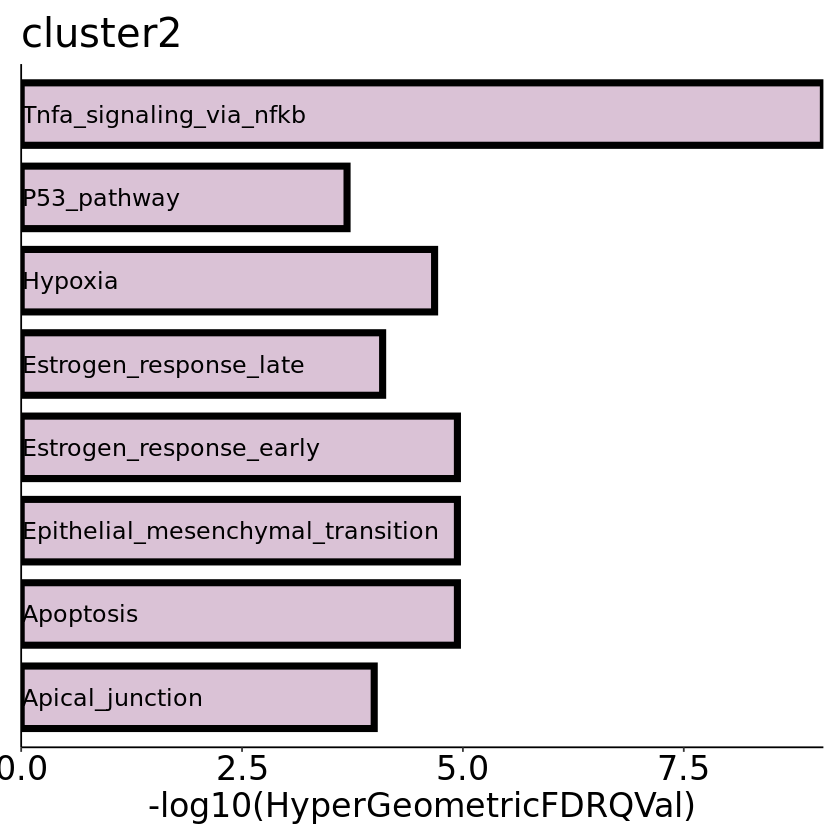

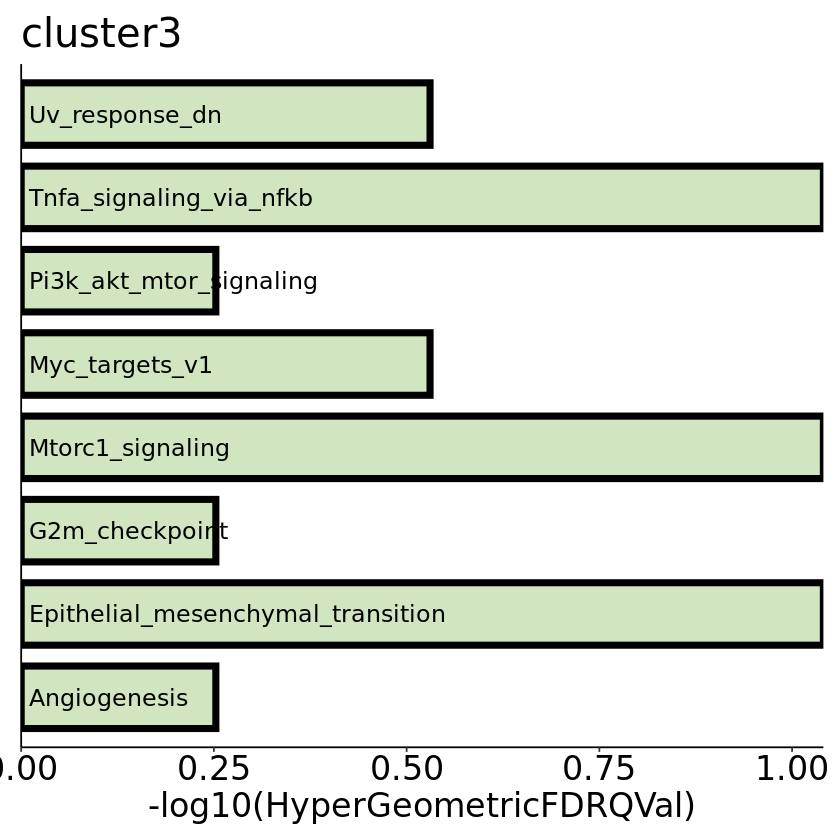

In [40]:
cluster2Backplot <- cluster2Backtable %>% arrange(p_adjust_hyper) %>% head(n = 8) %>%
    ggplot(aes(x = id, y = -log(p_adjust_hyper))) +
    geom_col(color = "black", fill = "#C29ABB", linewidth = 2, width = 0.75, alpha = 0.6) + 
    coord_flip() + scale_fill_manual(aes(alpha = 0.7)) +
    geom_text(aes(y = 0.01, label = str_to_sentence(
        gsub(id, pattern = "HALLMARK_", replacement = "")
    )), size = 5, hjust = 0) +
    scale_y_continuous(expand = c(0,0)) + ylab(label = "-log10(HyperGeometricFDRQVal)") +
    ggtitle("cluster2") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 20),
                          axis.text = element_text(size = 20, colour = "black"),
                          axis.text.y = element_blank(),
                          axis.title.y = element_blank(),
                          axis.ticks.y=element_blank(),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 16, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none",
                          plot.margin = margin(10, 10, 10, 10))
cluster2Backplot
cluster3Backplot <- cluster3Backtable %>% arrange(p_adjust_hyper) %>% head(n = 8) %>%
    ggplot(aes(x = id, y = -log(p_adjust_hyper))) +
    geom_col(color = "black", fill = "#B2D498", linewidth = 2, width = 0.75, alpha = 0.6) + 
    coord_flip() + scale_fill_manual(aes(alpha = 0.7)) +
    geom_text(aes(y = 0.01, label = str_to_sentence(
        gsub(id, pattern = "HALLMARK_", replacement = "")
    )), size = 5, hjust = 0) +
    scale_y_continuous(expand = c(0,0)) + ylab(label = "-log10(HyperGeometricFDRQVal)") +
    ggtitle("cluster3") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 20),
                          axis.text = element_text(size = 20, colour = "black"),
                          axis.text.y = element_blank(),
                          axis.title.y = element_blank(),
                          axis.ticks.y=element_blank(),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 16, colour = "black"),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 14),
                          legend.title = element_text(size = 16),
                          legend.position = "none",
                          plot.margin = margin(10, 10, 10, 10))
cluster3Backplot